In [1]:
import warnings

warnings.filterwarnings("ignore")
!pip install stable_baselines3

warnings.filterwarnings("ignore", category=DeprecationWarning)
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import StandardScaler
import gymnasium as gym
from gym import spaces
from stable_baselines3 import PPO
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 28.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

file_path = '/content/drive/MyDrive/ModifiedCallCenter.xlsx'
df = pd.read_excel(file_path)
df.head(5)


Call Id    Agent        Date      Time              Topic Answered (Y/N)  \
0  ID0001    Diane  2021-01-01  09:12:58   Contract related              Y   
1  ID0002    Becky  2021-01-01  09:12:58  Technical Support              Y   
2  ID0003  Stewart  2021-01-01  09:47:31   Contract related              Y   
3  ID0004     Greg  2021-01-01  09:47:31   Contract related              Y   
4  ID0005     Greg  2021-01-01  10:00:29    Payment related              Y   

  Resolved  Speed of answer in seconds AvgTalkDuration  Satisfaction rating  
0        Y                       109.0        00:02:23                  3.0  
1        N                        70.0        00:04:02                  3.0  
2        Y                        10.0        00:02:11                  3.0  
3        Y                        53.0        00:00:37                  2.0  
4        Y                        95.0        00:01:00                  3.0

In [4]:
df.shape

(5000, 10)

In [5]:
df.head()

Call Id    Agent        Date      Time              Topic Answered (Y/N)  \
0  ID0001    Diane  2021-01-01  09:12:58   Contract related              Y   
1  ID0002    Becky  2021-01-01  09:12:58  Technical Support              Y   
2  ID0003  Stewart  2021-01-01  09:47:31   Contract related              Y   
3  ID0004     Greg  2021-01-01  09:47:31   Contract related              Y   
4  ID0005     Greg  2021-01-01  10:00:29    Payment related              Y   

  Resolved  Speed of answer in seconds AvgTalkDuration  Satisfaction rating  
0        Y                       109.0        00:02:23                  3.0  
1        N                        70.0        00:04:02                  3.0  
2        Y                        10.0        00:02:11                  3.0  
3        Y                        53.0        00:00:37                  2.0  
4        Y                        95.0        00:01:00                  3.0

In [6]:
df.tail()

Call Id  Agent        Date      Time             Topic Answered (Y/N)  \
4995  ID4996    Jim  2021-03-31  16:37:55   Payment related              Y   
4996  ID4997  Diane  2021-03-31  16:45:07   Payment related              Y   
4997  ID4998  Diane  2021-03-31  16:53:46   Payment related              Y   
4998  ID4999    Jim  2021-03-31  17:02:24         Streaming              Y   
4999  ID5000  Diane  2021-03-31  17:39:50  Contract related              N   

     Resolved  Speed of answer in seconds AvgTalkDuration  Satisfaction rating  
4995        Y                        22.0        00:05:40                  1.0  
4996        Y                       100.0        00:03:16                  3.0  
4997        Y                        84.0        00:01:49                  4.0  
4998        Y                        98.0        00:00:58                  5.0  
4999        N                         NaN             NaN                  NaN

In [7]:
df.describe()

Speed of answer in seconds  Satisfaction rating
count                 4054.000000          4054.000000
mean                    67.520720             3.403552
std                     33.592872             1.212220
min                     10.000000             1.000000
25%                     39.000000             3.000000
50%                     68.000000             3.000000
75%                     97.000000             4.000000
max                    125.000000             5.000000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Call Id                     5000 non-null   object 
 1   Agent                       5000 non-null   object 
 2   Date                        5000 non-null   object 
 3   Time                        5000 non-null   object 
 4   Topic                       5000 non-null   object 
 5   Answered (Y/N)              5000 non-null   object 
 6   Resolved                    5000 non-null   object 
 7   Speed of answer in seconds  4054 non-null   float64
 8   AvgTalkDuration             4054 non-null   object 
 9   Satisfaction rating         4054 non-null   float64
dtypes: float64(2), object(8)
memory usage: 390.8+ KB


In [9]:
df.describe().T

count       mean        std   min   25%   50%  \
Speed of answer in seconds  4054.0  67.520720  33.592872  10.0  39.0  68.0   
Satisfaction rating         4054.0   3.403552   1.212220   1.0   3.0   3.0   

                             75%    max  
Speed of answer in seconds  97.0  125.0  
Satisfaction rating          4.0    5.0

In [10]:
df.head(10)

Call Id    Agent        Date      Time              Topic Answered (Y/N)  \
0  ID0001    Diane  2021-01-01  09:12:58   Contract related              Y   
1  ID0002    Becky  2021-01-01  09:12:58  Technical Support              Y   
2  ID0003  Stewart  2021-01-01  09:47:31   Contract related              Y   
3  ID0004     Greg  2021-01-01  09:47:31   Contract related              Y   
4  ID0005     Greg  2021-01-01  10:00:29    Payment related              Y   
5  ID0006      Jim  2021-01-01  10:00:29  Technical Support              N   
6  ID0007    Diane  2021-01-01  10:22:05    Payment related              Y   
7  ID0008    Diane  2021-01-01  10:22:05    Payment related              Y   
8  ID0009     Greg  2021-01-01  11:13:55      Admin Support              Y   
9  ID0010      Jim  2021-01-01  11:13:55          Streaming              Y   

  Resolved  Speed of answer in seconds AvgTalkDuration  Satisfaction rating  
0        Y                       109.0        00:02:23                  3.0  
1        N                        70.0        00:04:02                  3.0  
2        Y                        10.0        00:02:11                  3.0  
3        Y                        53.0        00:00:37                  2.0  
4        Y                        95.0        00:01:00                  3.0  
5        N                         NaN             NaN                  NaN  
6        Y                        24.0        00:03:40                  2.0  
7        Y                        22.0        00:00:38                  4.0  
8        Y                        15.0        00:06:38                  4.0  
9        Y                        78.0        00:01:04                  3.0

In [11]:
df.tail(10)

Call Id    Agent        Date      Time             Topic Answered (Y/N)  \
4990  ID4991  Stewart  2021-03-31  13:46:34         Streaming              Y   
4991  ID4992      Joe  2021-03-31  14:13:55         Streaming              N   
4992  ID4993      Joe  2021-03-31  14:18:14     Admin Support              N   
4993  ID4994     Greg  2021-03-31  14:58:34  Contract related              N   
4994  ID4995     Greg  2021-03-31  15:33:07   Payment related              N   
4995  ID4996      Jim  2021-03-31  16:37:55   Payment related              Y   
4996  ID4997    Diane  2021-03-31  16:45:07   Payment related              Y   
4997  ID4998    Diane  2021-03-31  16:53:46   Payment related              Y   
4998  ID4999      Jim  2021-03-31  17:02:24         Streaming              Y   
4999  ID5000    Diane  2021-03-31  17:39:50  Contract related              N   

     Resolved  Speed of answer in seconds AvgTalkDuration  Satisfaction rating  
4990        Y                        73.0        00:06:26                  1.0  
4991        N                         NaN             NaN                  NaN  
4992        N                         NaN             NaN                  NaN  
4993        N                         NaN             NaN                  NaN  
4994        N                         NaN             NaN                  NaN  
4995        Y                        22.0        00:05:40                  1.0  
4996        Y                       100.0        00:03:16                  3.0  
4997        Y                        84.0        00:01:49                  4.0  
4998        Y                        98.0        00:00:58                  5.0  
4999        N                         NaN             NaN                  NaN

In [12]:
import pandas as pd
import numpy as np

print("Available columns in the dataframe:")
print(df.columns.tolist())

print("\nSample data (first 3 rows):")
print(df.head(3))

Available columns in the dataframe:
['Call Id', 'Agent', 'Date', 'Time', 'Topic', 'Answered (Y/N)', 'Resolved', 'Speed of answer in seconds', 'AvgTalkDuration', 'Satisfaction rating']

Sample data (first 3 rows):
  Call Id    Agent        Date      Time              Topic Answered (Y/N)  \
0  ID0001    Diane  2021-01-01  09:12:58   Contract related              Y   
1  ID0002    Becky  2021-01-01  09:12:58  Technical Support              Y   
2  ID0003  Stewart  2021-01-01  09:47:31   Contract related              Y   

  Resolved  Speed of answer in seconds AvgTalkDuration  Satisfaction rating  
0        Y                       109.0        00:02:23                  3.0  
1        N                        70.0        00:04:02                  3.0  
2        Y                        10.0        00:02:11                  3.0  


Derived columns created:
- DateTime: datetime64[ns]
- Hour: int32
- DayOfWeek: int32
- DayName: object
- Answered_Binary: int64
- Resolved_Binary: int64
- TalkDurationSeconds: float64

Columns available for correlation analysis: ['Speed of answer in seconds', 'Satisfaction rating', 'TalkDurationSeconds', 'Answered_Binary', 'Resolved_Binary', 'Hour', 'DayOfWeek']


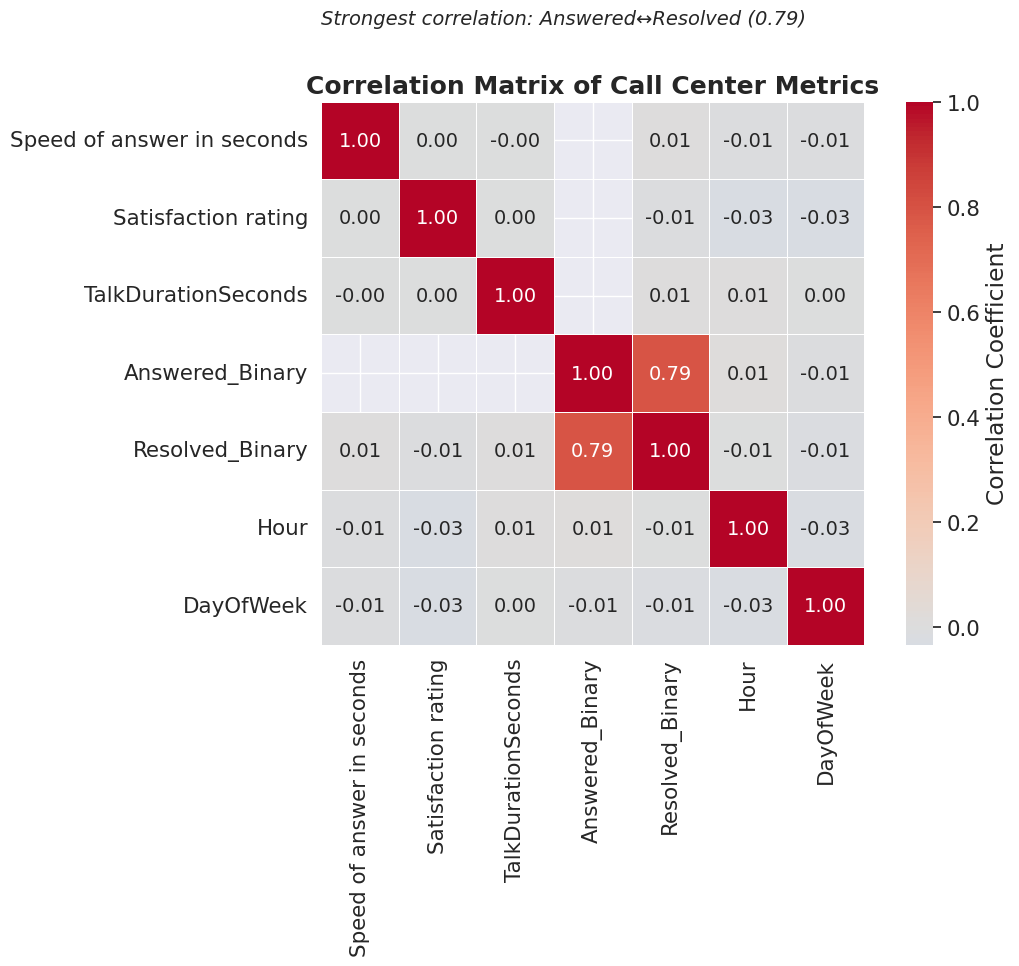

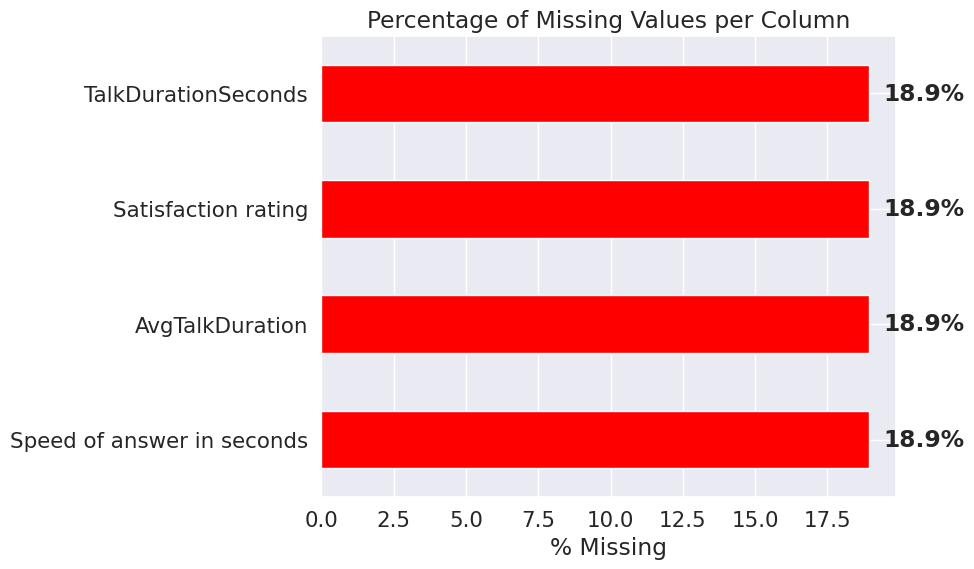

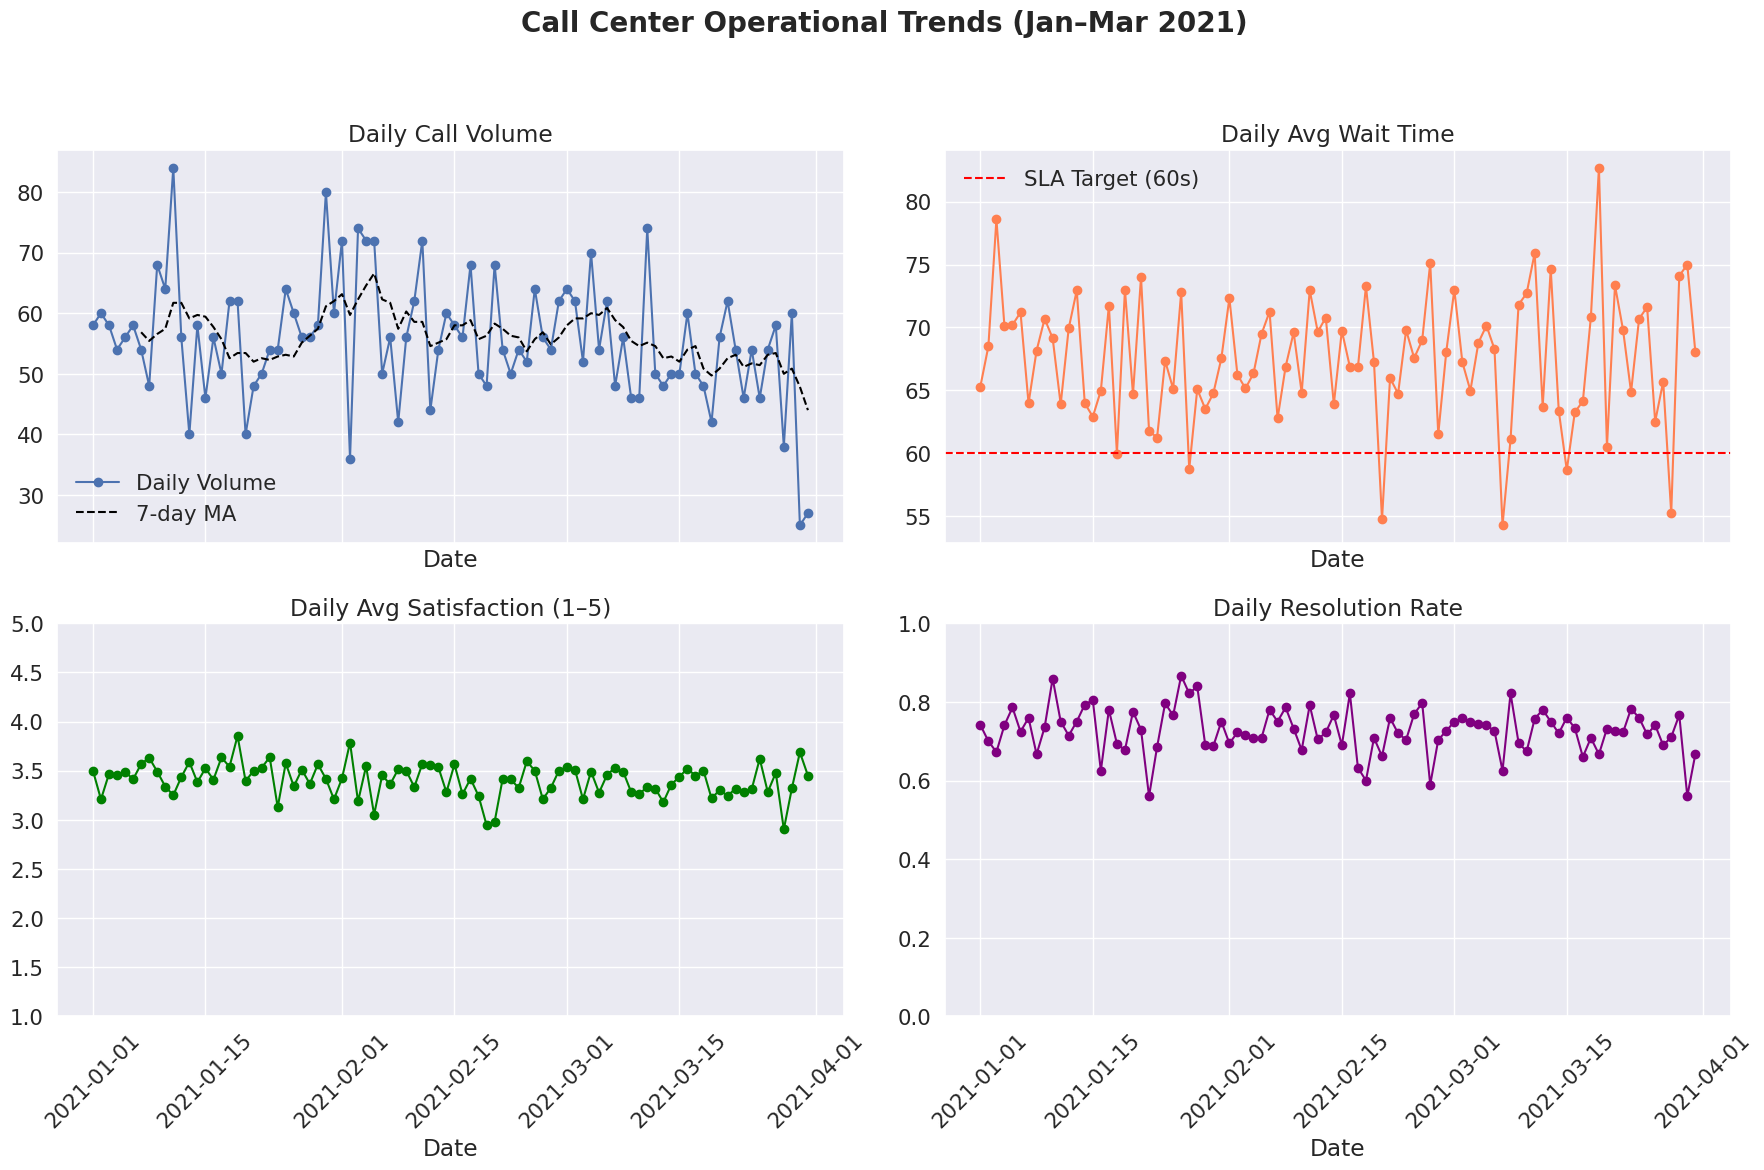

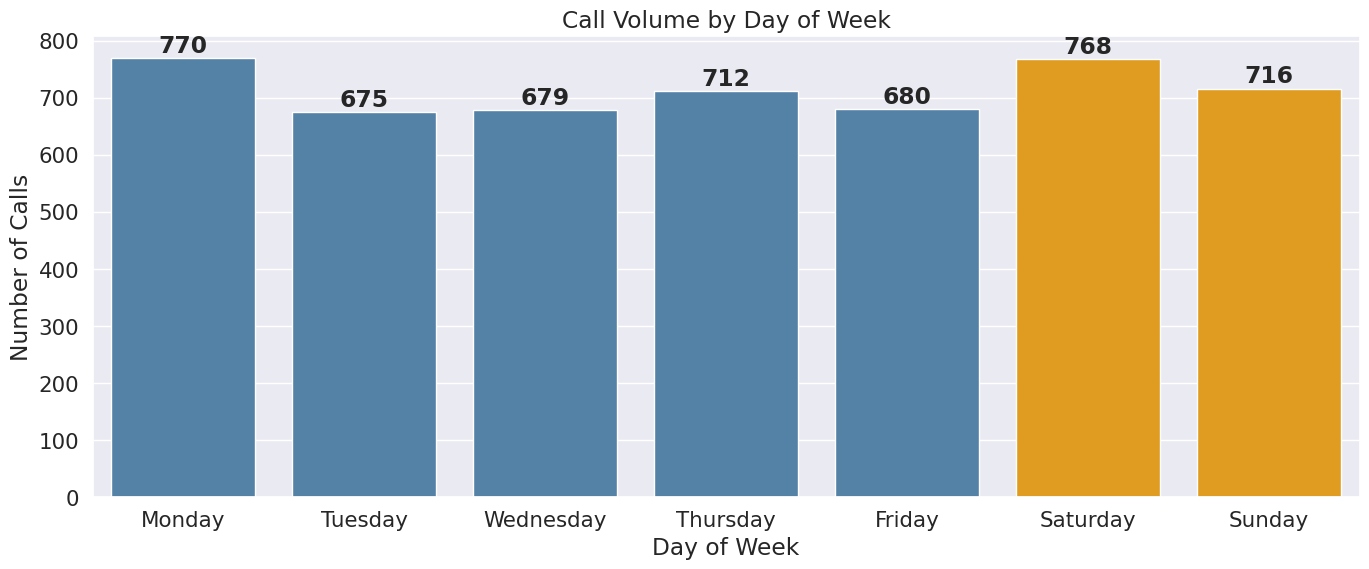

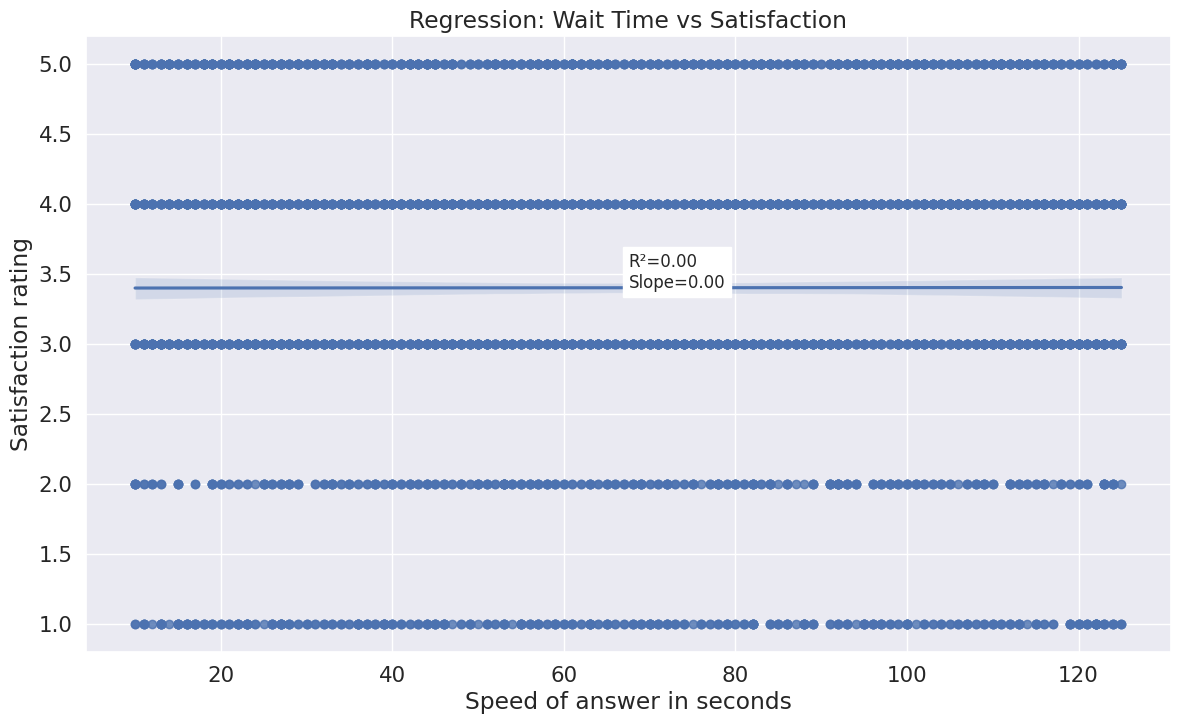

                             OLS Regression Results                            
Dep. Variable:     Satisfaction rating   R-squared:                       0.000
Model:                             OLS   Adj. R-squared:                 -0.000
Method:                  Least Squares   F-statistic:                  0.003671
Date:                 Fri, 02 May 2025   Prob (F-statistic):              0.952
Time:                         03:01:10   Log-Likelihood:                -6532.1
No. Observations:                 4054   AIC:                         1.307e+04
Df Residuals:                     4052   BIC:                         1.308e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const     

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import statsmodels.api as sm

plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.4)
plt.rcParams['figure.figsize'] = (14, 8)


df_processed = df.copy()


df_processed['Date'] = pd.to_datetime(df_processed['Date'])
df_processed['Time'] = pd.to_datetime(df_processed['Time'], format='%H:%M:%S').dt.time
df_processed['DateTime'] = pd.to_datetime(df_processed['Date'].astype(str) + ' ' + df_processed['Time'].astype(str))


df_processed['Hour'] = df_processed['DateTime'].dt.hour
df_processed['DayOfWeek'] = df_processed['DateTime'].dt.dayofweek
df_processed['DayName'] = df_processed['DateTime'].dt.day_name()

df_processed['Answered_Binary'] = df_processed['Answered (Y/N)'].apply(lambda x: 1 if x == 'Y' else 0)
df_processed['Resolved_Binary'] = df_processed['Resolved'].apply(lambda x: 1 if x == 'Y' else 0)


def time_to_seconds(time_str):
    if pd.isna(time_str):
        return np.nan
    try:
        parts = str(time_str).split(':')
        return int(parts[0])*3600 + int(parts[1])*60 + int(parts[2])
    except:
        return np.nan

df_processed['TalkDurationSeconds'] = df_processed['AvgTalkDuration'].apply(time_to_seconds)

# ✅ Print derived columns
print("Derived columns created:")
for col in ['DateTime', 'Hour', 'DayOfWeek', 'DayName', 'Answered_Binary', 'Resolved_Binary', 'TalkDurationSeconds']:
    if col in df_processed.columns:
        print(f"- {col}: {df_processed[col].dtype}")

# =======================
# 🔥 1. Correlation Matrix
# =======================
numeric_columns = [
    'Speed of answer in seconds', 'Satisfaction rating',
    'TalkDurationSeconds', 'Answered_Binary', 'Resolved_Binary',
    'Hour', 'DayOfWeek'
]

available_columns = [col for col in numeric_columns if col in df_processed.columns]
print("\nColumns available for correlation analysis:", available_columns)

corr_matrix = df_processed[available_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix, cmap='coolwarm', center=0, annot=True, fmt=".2f",
    linewidths=.5, square=True, annot_kws={"size":14},
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title('Correlation Matrix of Call Center Metrics', fontsize=18, fontweight='bold')
plt.text(0, -1, f"Strongest correlation: Answered↔Resolved ({corr_matrix.loc['Answered_Binary','Resolved_Binary']:.2f})",
         fontsize=14, fontstyle='italic')
plt.tight_layout()
plt.show()

# =======================
# 🔥 2. Missing Values Plot
# =======================
missing = df_processed.isnull().mean() * 100
missing = missing[missing > 0].sort_values()
plt.figure(figsize=(10, 6))
missing.plot(kind='barh', color='red')
plt.title('Percentage of Missing Values per Column')
plt.xlabel('% Missing')
for i, v in enumerate(missing.values):
    plt.text(v + 0.5, i, f"{v:.1f}%", va='center', fontweight='bold')
plt.tight_layout()
plt.show()

# =======================
# 🔥 3. Time Series Analysis
# =======================
df_processed['Date_Only'] = df_processed['DateTime'].dt.date
daily_metrics = df_processed.groupby('Date_Only').agg({
    'Call Id': 'count',
    'Speed of answer in seconds': 'mean',
    'Satisfaction rating': 'mean',
    'Resolved_Binary': 'mean'
}).reset_index()

daily_metrics['CallVolume_MA'] = daily_metrics['Call Id'].rolling(7).mean()

fig, axes = plt.subplots(2, 2, figsize=(18, 12), sharex=True)

# Call volume
axes[0,0].plot(daily_metrics['Date_Only'], daily_metrics['Call Id'], '-o', label='Daily Volume')
axes[0,0].plot(daily_metrics['Date_Only'], daily_metrics['CallVolume_MA'], '--', color='black', label='7-day MA')
axes[0,0].set_title('Daily Call Volume')
axes[0,0].legend()

# Avg wait time
sla_target = 60
axes[0,1].plot(daily_metrics['Date_Only'], daily_metrics['Speed of answer in seconds'], '-o', color='coral')
axes[0,1].axhline(y=sla_target, color='red', linestyle='--', label='SLA Target (60s)')
axes[0,1].set_title('Daily Avg Wait Time')
axes[0,1].legend()

# Satisfaction
axes[1,0].plot(daily_metrics['Date_Only'], daily_metrics['Satisfaction rating'], '-o', color='green')
axes[1,0].set_title('Daily Avg Satisfaction (1–5)')
axes[1,0].set_ylim(1,5)

# Resolution rate
axes[1,1].plot(daily_metrics['Date_Only'], daily_metrics['Resolved_Binary'], '-o', color='purple')
axes[1,1].set_title('Daily Resolution Rate')
axes[1,1].set_ylim(0,1)

for ax in axes.flat:
    ax.grid(True)
    ax.set_xlabel('Date')
    plt.setp(ax.get_xticklabels(), rotation=45)

fig.suptitle('Call Center Operational Trends (Jan–Mar 2021)', fontsize=20, fontweight='bold')
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()

# =======================
# 🔥 4. Day of Week Analysis
# =======================
plt.figure(figsize=(14,6))
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
day_volume = df_processed.groupby('DayName').size().reindex(day_order)
colors = ['steelblue']*5 + ['orange']*2
sns.barplot(x=day_volume.index, y=day_volume.values, palette=colors)

for i, v in enumerate(day_volume.values):
    plt.text(i, v + 10, str(v), ha='center', fontweight='bold')

plt.title('Call Volume by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Calls')
plt.tight_layout()
plt.show()

# =======================
# 🔥 5. Regression: Wait Time vs Satisfaction
# =======================
x = df_processed['Speed of answer in seconds'].dropna()
y = df_processed['Satisfaction rating'].dropna()
x_const = sm.add_constant(x)
model = sm.OLS(y, x_const).fit()

sns.regplot(x='Speed of answer in seconds', y='Satisfaction rating', data=df_processed)
plt.annotate(f"R²={model.rsquared:.2f}\nSlope={model.params[1]:.2f}",
             xy=(x.mean(), y.mean()), fontsize=12, backgroundcolor='white')
plt.title('Regression: Wait Time vs Satisfaction')
plt.show()

print(model.summary())

sla_breach_rate = (df_processed['Speed of answer in seconds'] > sla_target).mean() * 100
print(f"\n➡️ {sla_breach_rate:.1f}% of calls breached SLA target of {sla_target} seconds.")


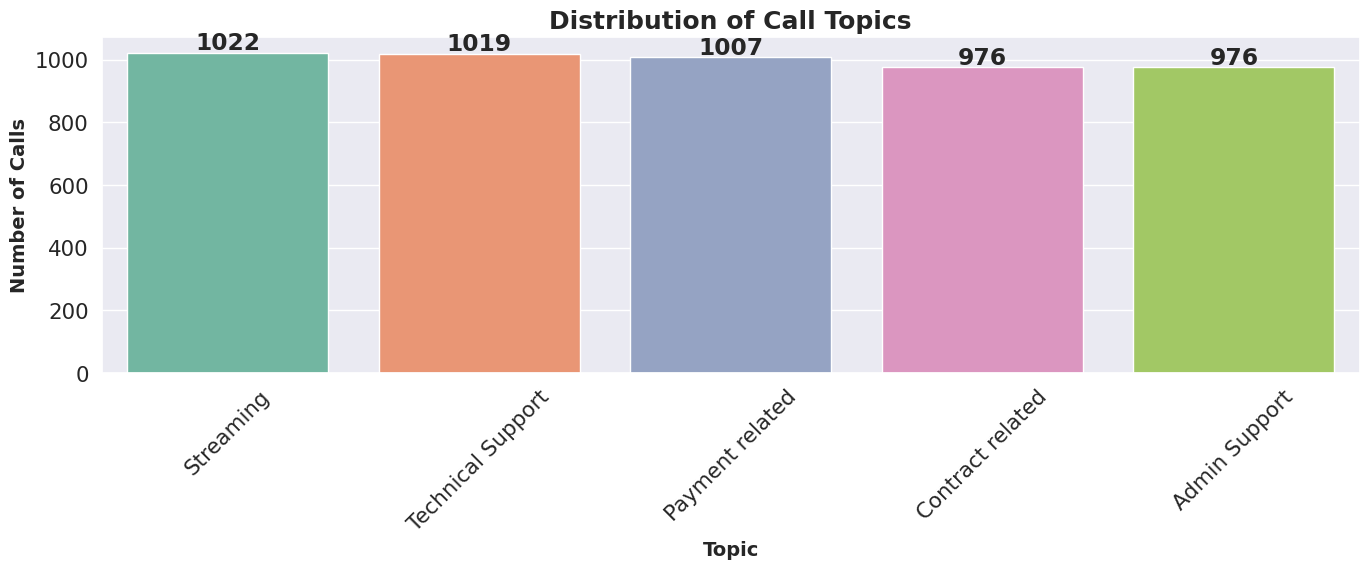

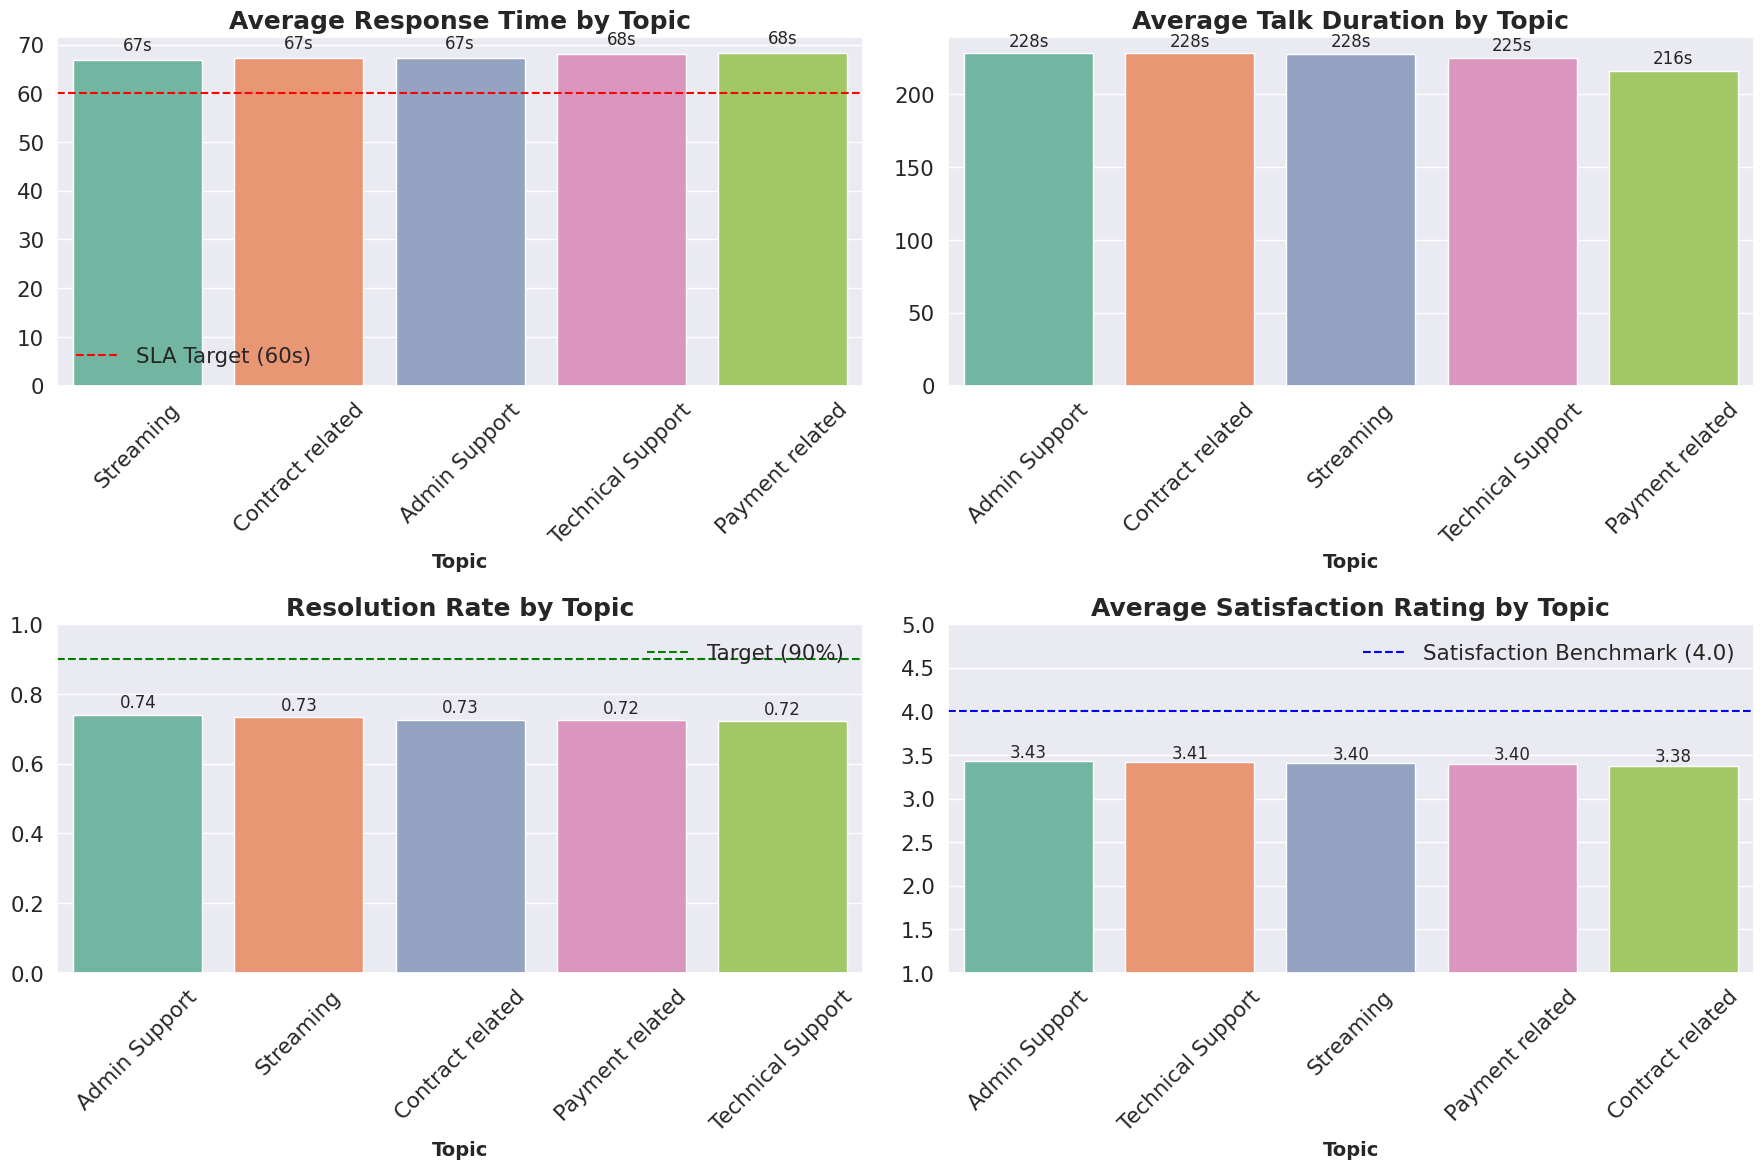

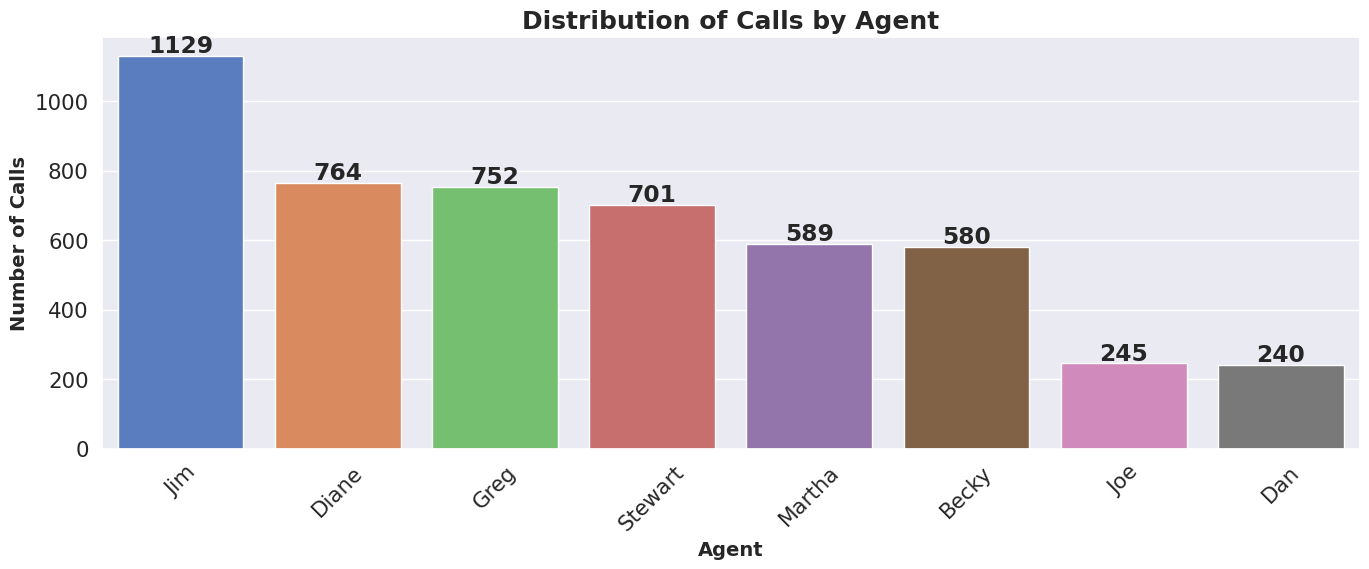

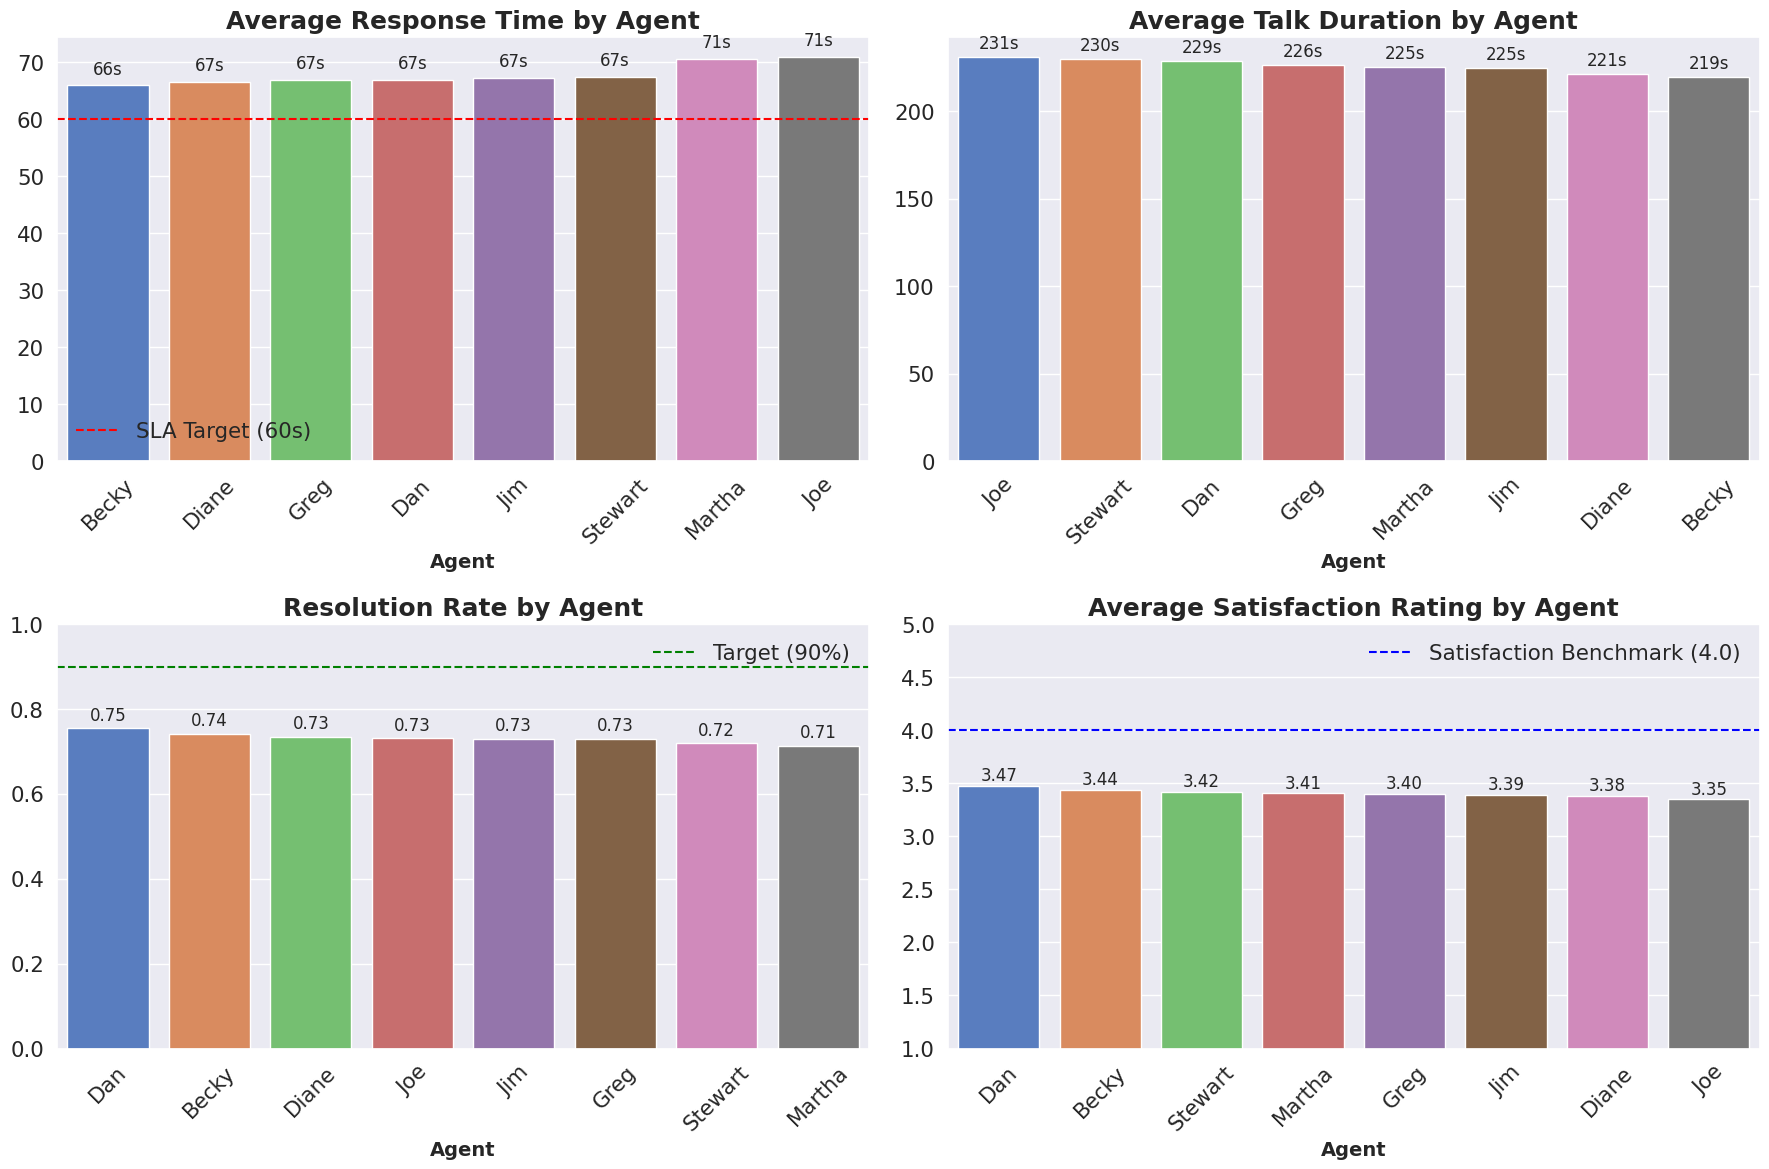

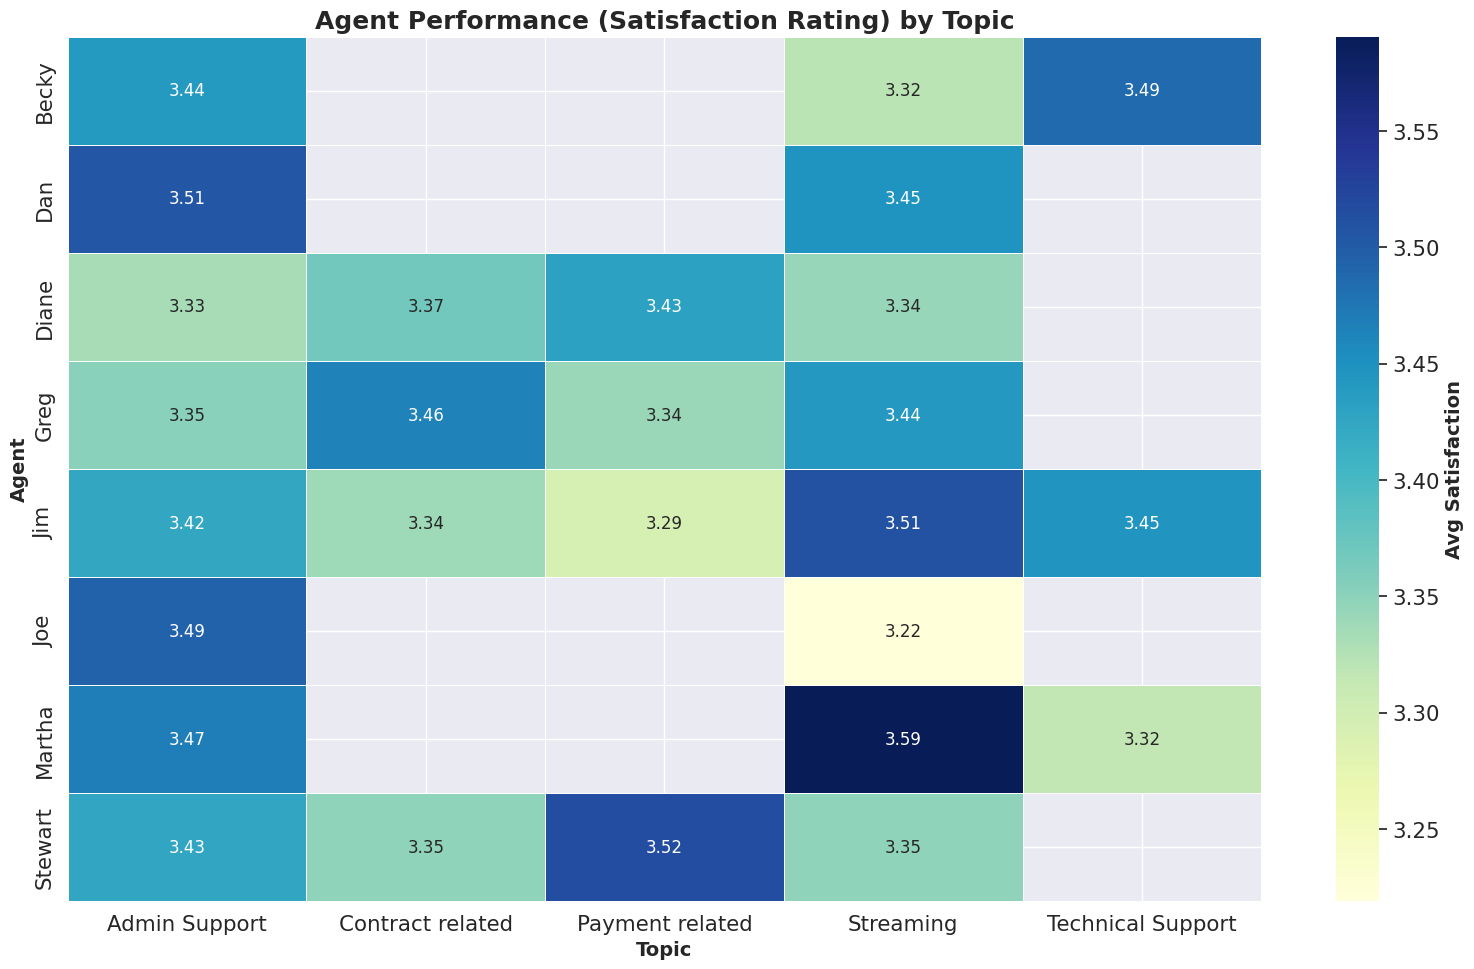

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.4)
plt.rcParams.update({
    'axes.titlesize': 18,
    'axes.titleweight': 'bold',
    'axes.labelsize': 14,
    'axes.labelweight': 'bold'
})

# ================================
# 🔥 1. Topic Distribution
# ================================
plt.figure(figsize=(14,6))
topic_counts = df_processed['Topic'].value_counts()
bars = sns.barplot(x=topic_counts.index, y=topic_counts.values, palette='Set2')
plt.title('Distribution of Call Topics')

for i, v in enumerate(topic_counts.values):
    plt.text(i, v + 10, str(v), ha='center', fontweight='bold')

plt.xlabel('Topic')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ================================
# 🔥 2. Topic Performance Metrics
# ================================
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# --- Avg Speed of Answer ---
topic_speed = df_processed.groupby('Topic')['Speed of answer in seconds'].mean().sort_values()
bars = sns.barplot(x=topic_speed.index, y=topic_speed.values, ax=axes[0,0], palette='Set2')
axes[0,0].set_title('Average Response Time by Topic')

for p in bars.patches:
    axes[0,0].annotate(f"{p.get_height():.0f}s", (p.get_x()+p.get_width()/2, p.get_height()+2), ha='center', fontsize=12)

axes[0,0].axhline(60, color='red', linestyle='--', label='SLA Target (60s)')
axes[0,0].legend()
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45)

# --- Avg Talk Duration ---
topic_duration = df_processed.groupby('Topic')['TalkDurationSeconds'].mean().sort_values(ascending=False)
bars = sns.barplot(x=topic_duration.index, y=topic_duration.values, ax=axes[0,1], palette='Set2')
axes[0,1].set_title('Average Talk Duration by Topic')

for p in bars.patches:
    axes[0,1].annotate(f"{p.get_height():.0f}s", (p.get_x()+p.get_width()/2, p.get_height()+5), ha='center', fontsize=12)

axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=45)

# --- Resolution Rate ---
topic_resolution = df_processed.groupby('Topic')['Resolved_Binary'].mean().sort_values(ascending=False)
bars = sns.barplot(x=topic_resolution.index, y=topic_resolution.values, ax=axes[1,0], palette='Set2')
axes[1,0].set_title('Resolution Rate by Topic')

for p in bars.patches:
    axes[1,0].annotate(f"{p.get_height():.2f}", (p.get_x()+p.get_width()/2, p.get_height()+0.02), ha='center', fontsize=12)

axes[1,0].axhline(0.9, color='green', linestyle='--', label='Target (90%)')
axes[1,0].legend()
axes[1,0].set_ylim(0,1)
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=45)

# --- Satisfaction ---
topic_satisfaction = df_processed.groupby('Topic')['Satisfaction rating'].mean().sort_values(ascending=False)
bars = sns.barplot(x=topic_satisfaction.index, y=topic_satisfaction.values, ax=axes[1,1], palette='Set2')
axes[1,1].set_title('Average Satisfaction Rating by Topic')

for p in bars.patches:
    axes[1,1].annotate(f"{p.get_height():.2f}", (p.get_x()+p.get_width()/2, p.get_height()+0.05), ha='center', fontsize=12)

axes[1,1].axhline(4, color='blue', linestyle='--', label='Satisfaction Benchmark (4.0)')
axes[1,1].legend()
axes[1,1].set_ylim(1,5)
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

# ================================
# 🔥 3. Agent Distribution
# ================================
plt.figure(figsize=(14,6))
agent_counts = df_processed['Agent'].value_counts()
bars = sns.barplot(x=agent_counts.index, y=agent_counts.values, palette='muted')
plt.title('Distribution of Calls by Agent')

for i, v in enumerate(agent_counts.values):
    plt.text(i, v + 10, str(v), ha='center', fontweight='bold')

plt.xlabel('Agent')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ================================
# 🔥 4. Agent Performance Metrics
# ================================
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# --- Avg Speed of Answer ---
agent_speed = df_processed.groupby('Agent')['Speed of answer in seconds'].mean().sort_values()
bars = sns.barplot(x=agent_speed.index, y=agent_speed.values, ax=axes[0,0], palette='muted')
axes[0,0].set_title('Average Response Time by Agent')

for p in bars.patches:
    axes[0,0].annotate(f"{p.get_height():.0f}s", (p.get_x()+p.get_width()/2, p.get_height()+2), ha='center', fontsize=12)

axes[0,0].axhline(60, color='red', linestyle='--', label='SLA Target (60s)')
axes[0,0].legend()
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45)

# --- Avg Talk Duration ---
agent_duration = df_processed.groupby('Agent')['TalkDurationSeconds'].mean().sort_values(ascending=False)
bars = sns.barplot(x=agent_duration.index, y=agent_duration.values, ax=axes[0,1], palette='muted')
axes[0,1].set_title('Average Talk Duration by Agent')

for p in bars.patches:
    axes[0,1].annotate(f"{p.get_height():.0f}s", (p.get_x()+p.get_width()/2, p.get_height()+5), ha='center', fontsize=12)

axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=45)

# --- Resolution Rate ---
agent_resolution = df_processed.groupby('Agent')['Resolved_Binary'].mean().sort_values(ascending=False)
bars = sns.barplot(x=agent_resolution.index, y=agent_resolution.values, ax=axes[1,0], palette='muted')
axes[1,0].set_title('Resolution Rate by Agent')

for p in bars.patches:
    axes[1,0].annotate(f"{p.get_height():.2f}", (p.get_x()+p.get_width()/2, p.get_height()+0.02), ha='center', fontsize=12)

axes[1,0].axhline(0.9, color='green', linestyle='--', label='Target (90%)')
axes[1,0].legend()
axes[1,0].set_ylim(0,1)
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=45)

# --- Satisfaction ---
agent_satisfaction = df_processed.groupby('Agent')['Satisfaction rating'].mean().sort_values(ascending=False)
bars = sns.barplot(x=agent_satisfaction.index, y=agent_satisfaction.values, ax=axes[1,1], palette='muted')
axes[1,1].set_title('Average Satisfaction Rating by Agent')

for p in bars.patches:
    axes[1,1].annotate(f"{p.get_height():.2f}", (p.get_x()+p.get_width()/2, p.get_height()+0.05), ha='center', fontsize=12)

axes[1,1].axhline(4, color='blue', linestyle='--', label='Satisfaction Benchmark (4.0)')
axes[1,1].legend()
axes[1,1].set_ylim(1,5)
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

# ================================
# 🔥 5. Agent-Topic Heatmap
# ================================
plt.figure(figsize=(16,10))
topic_agent_perf = df_processed.pivot_table(
    values='Satisfaction rating',
    index='Agent',
    columns='Topic',
    aggfunc='mean'
)

sns.heatmap(topic_agent_perf, annot=True, fmt='.2f', cmap='YlGnBu', linewidths=0.5,
            annot_kws={'size':12}, cbar_kws={'label': 'Avg Satisfaction'})
plt.title('Agent Performance (Satisfaction Rating) by Topic')
plt.tight_layout()
plt.show()


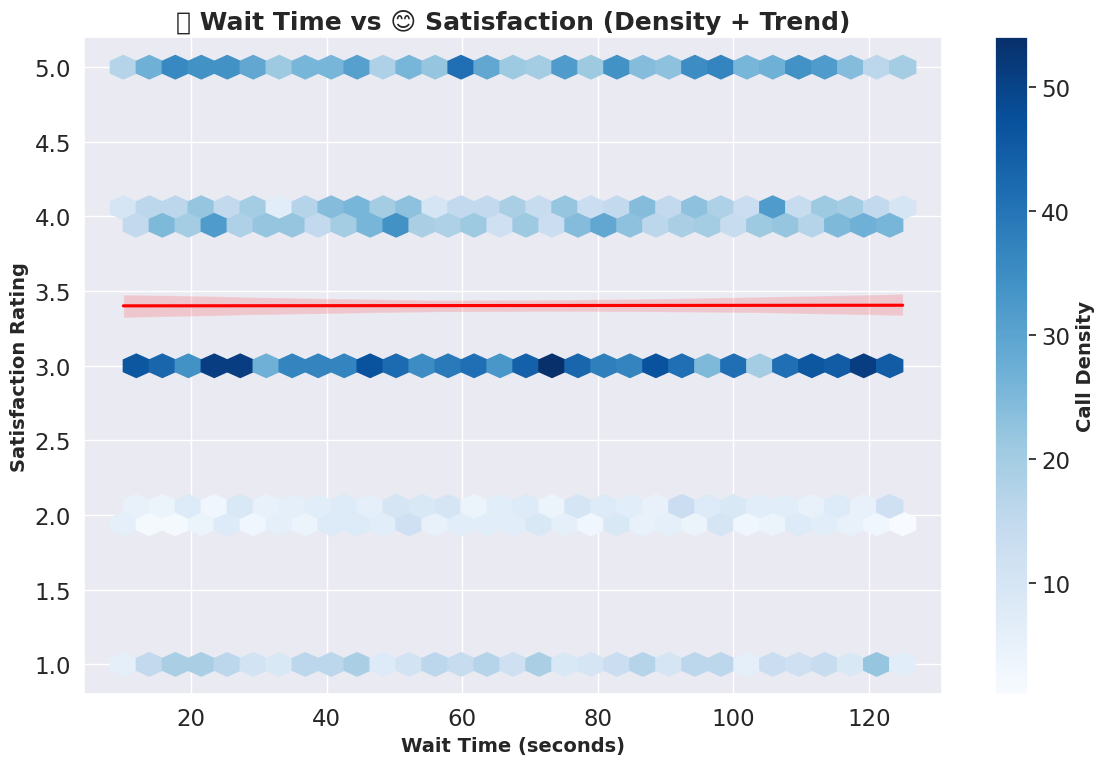

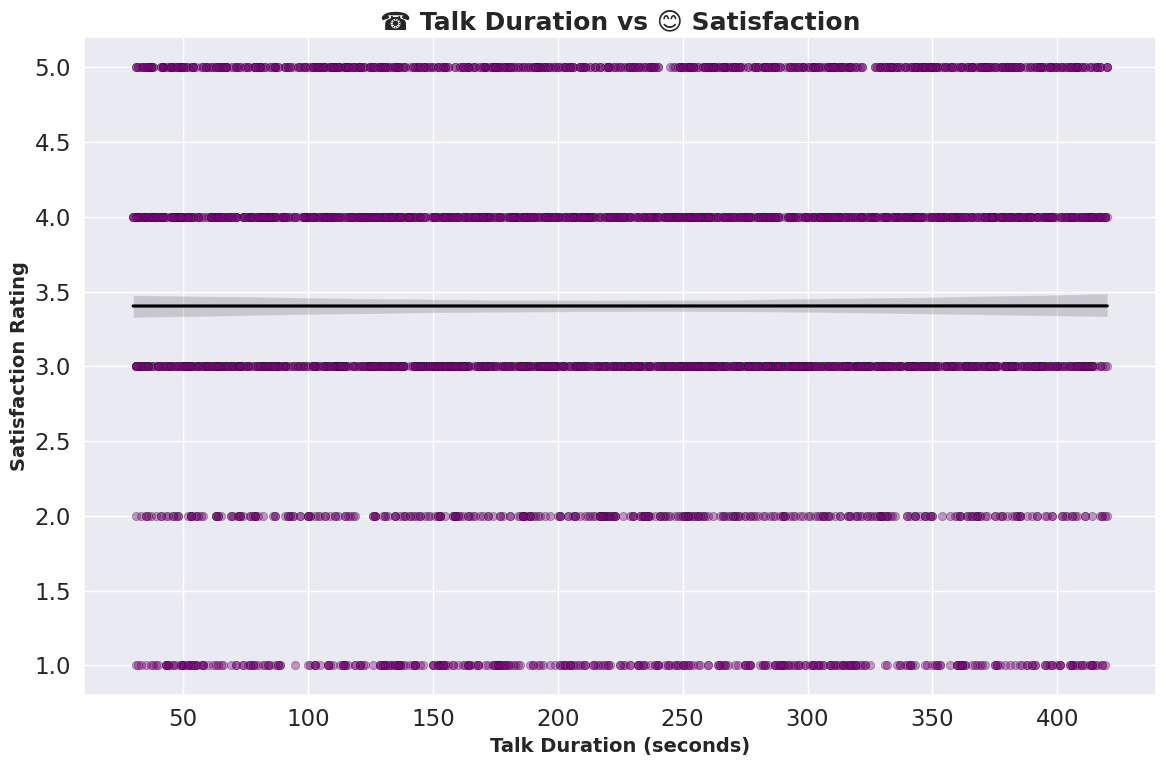

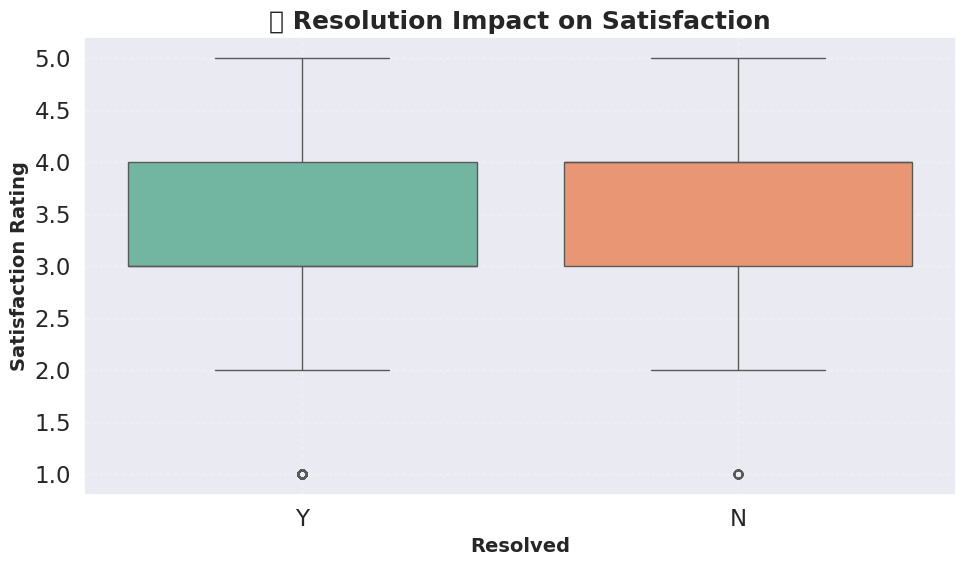

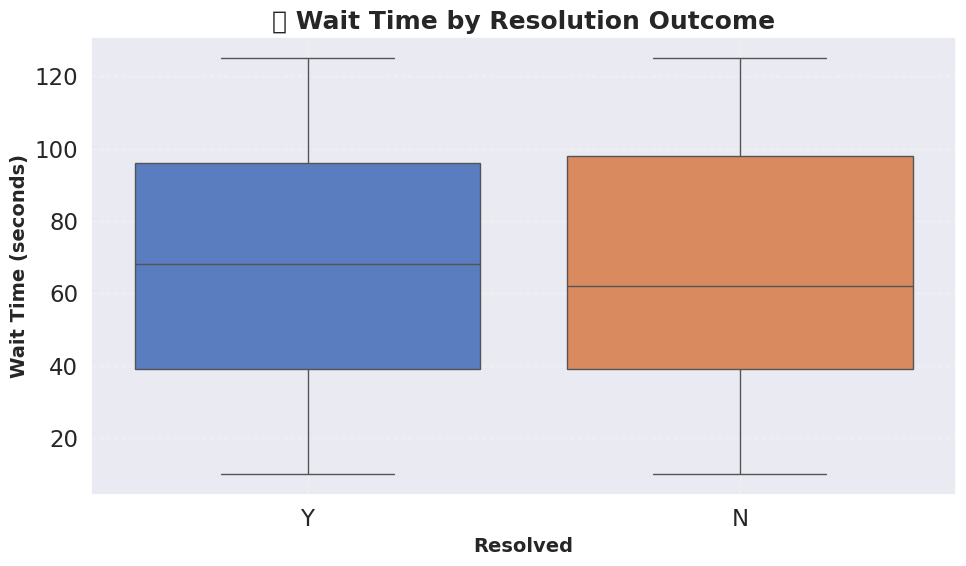

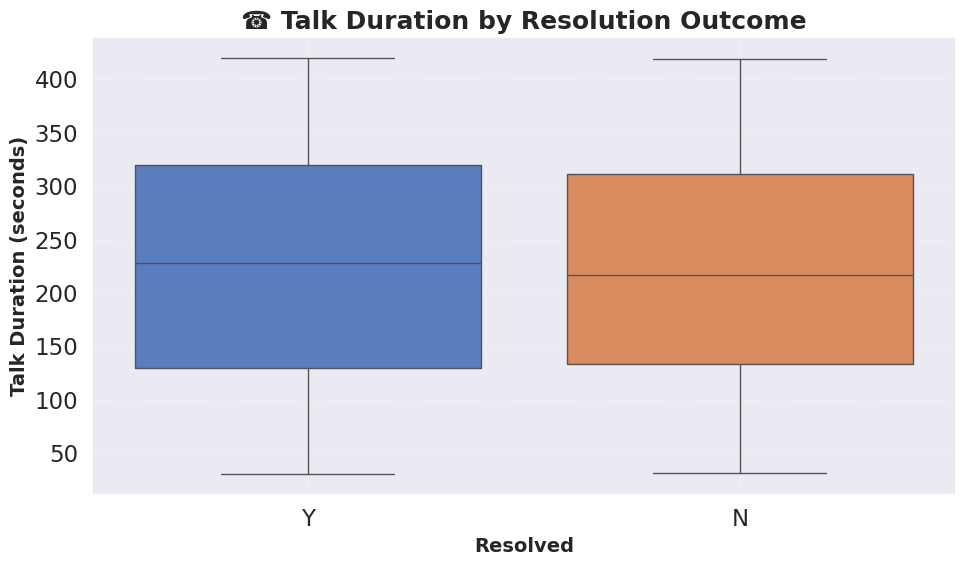

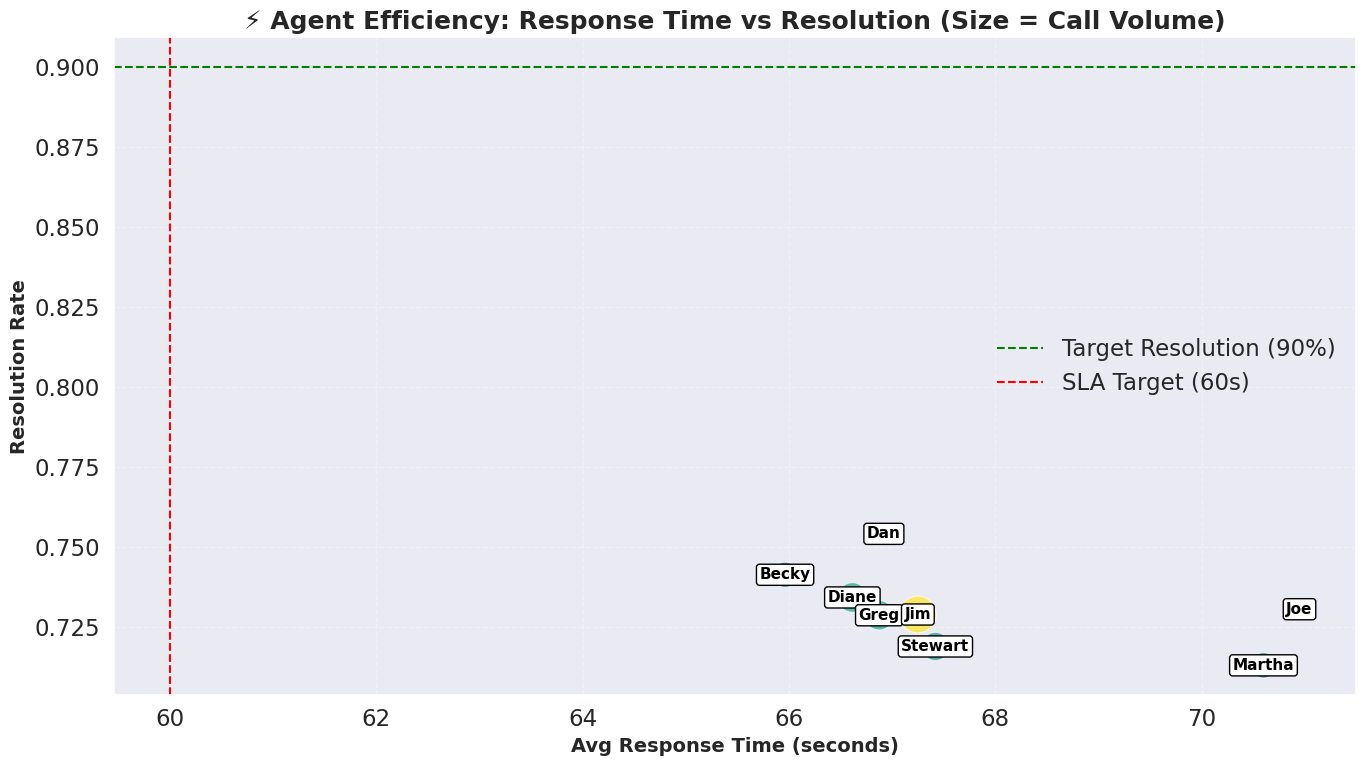

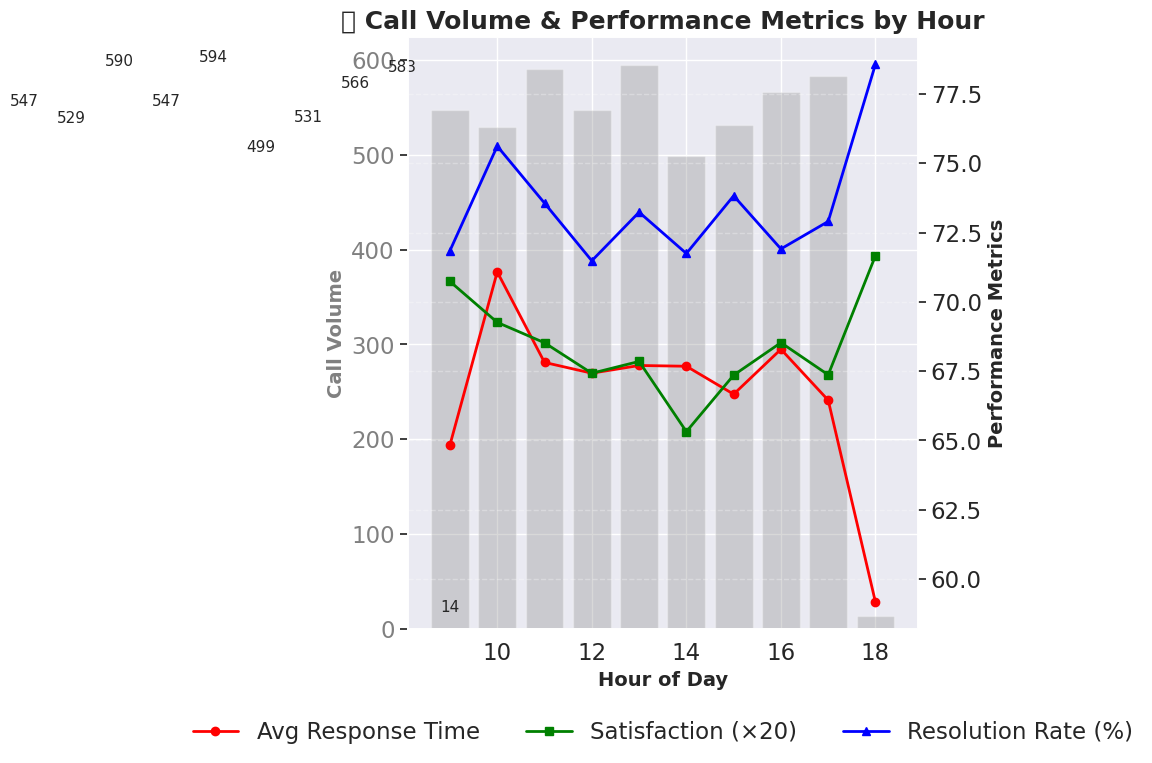

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.5)
plt.rcParams.update({
    'axes.titlesize': 18,
    'axes.titleweight': 'bold',
    'axes.labelsize': 14,
    'axes.labelweight': 'bold'
})

# ===================================
# 🔥 1. Wait Time vs Satisfaction
# ===================================
plt.figure(figsize=(12,8))
plt.hexbin(df_processed['Speed of answer in seconds'], df_processed['Satisfaction rating'],
           gridsize=30, cmap='Blues', mincnt=1)
sns.regplot(x='Speed of answer in seconds', y='Satisfaction rating',
            data=df_processed, scatter=False, color='red', line_kws={'label':'Trend Line'})

cbar = plt.colorbar(label='Call Density')
plt.title('⏳ Wait Time vs 😊 Satisfaction (Density + Trend)')
plt.xlabel('Wait Time (seconds)')
plt.ylabel('Satisfaction Rating')
plt.legend()
plt.tight_layout()
plt.show()

# ===================================
# 🔥 2. Talk Duration vs Satisfaction
# ===================================
plt.figure(figsize=(12,8))
sns.scatterplot(x='TalkDurationSeconds', y='Satisfaction rating', data=df_processed,
                alpha=0.4, color='purple', edgecolor='k')
sns.regplot(x='TalkDurationSeconds', y='Satisfaction rating', data=df_processed,
            scatter=False, color='black', line_kws={'label':'Trend Line'})
plt.title('☎️ Talk Duration vs 😊 Satisfaction')
plt.xlabel('Talk Duration (seconds)')
plt.ylabel('Satisfaction Rating')
plt.legend()
plt.tight_layout()
plt.show()

# ===================================
# 🔥 3. Resolution Impact on Satisfaction
# ===================================
plt.figure(figsize=(10,6))
sns.boxplot(x='Resolved', y='Satisfaction rating', data=df_processed, palette='Set2')
plt.title('✅ Resolution Impact on Satisfaction')
plt.xlabel('Resolved')
plt.ylabel('Satisfaction Rating')
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# ===================================
# 🔥 4. Wait Time vs Resolution
# ===================================
plt.figure(figsize=(10,6))
sns.boxplot(x='Resolved', y='Speed of answer in seconds', data=df_processed, palette='muted')
plt.title('⏳ Wait Time by Resolution Outcome')
plt.xlabel('Resolved')
plt.ylabel('Wait Time (seconds)')
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# ===================================
# 🔥 5. Talk Duration vs Resolution
# ===================================
plt.figure(figsize=(10,6))
sns.boxplot(x='Resolved', y='TalkDurationSeconds', data=df_processed, palette='muted')
plt.title('☎️ Talk Duration by Resolution Outcome')
plt.xlabel('Resolved')
plt.ylabel('Talk Duration (seconds)')
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# ===================================
# 🔥 6. Agent Efficiency
# ===================================
agent_metrics = df_processed.groupby('Agent').agg({
    'Speed of answer in seconds': 'mean',
    'Resolved_Binary': 'mean',
    'Call Id': 'count'
}).reset_index()
agent_metrics.columns = ['Agent', 'Avg_Response_Time', 'Resolution_Rate', 'Call_Volume']

plt.figure(figsize=(14,8))
scatter = sns.scatterplot(x='Avg_Response_Time', y='Resolution_Rate',
                          size='Call_Volume', data=agent_metrics, sizes=(100,700),
                          hue='Call_Volume', palette='viridis', alpha=0.7, legend=False)

for _, row in agent_metrics.iterrows():
    plt.text(row['Avg_Response_Time'], row['Resolution_Rate'], row['Agent'],
             ha='center', va='center', fontsize=11, weight='bold', color='black',
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2'))

plt.axhline(0.9, color='green', linestyle='--', label='Target Resolution (90%)')
plt.axvline(60, color='red', linestyle='--', label='SLA Target (60s)')
plt.title('⚡️ Agent Efficiency: Response Time vs Resolution (Size = Call Volume)')
plt.xlabel('Avg Response Time (seconds)')
plt.ylabel('Resolution Rate')
plt.legend()
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# ===================================
# 🔥 7. Hourly Performance Trends
# ===================================
hourly_metrics = df_processed.groupby('Hour').agg({
    'Speed of answer in seconds': 'mean',
    'Satisfaction rating': 'mean',
    'Resolved_Binary': 'mean',
    'Call Id': 'count'
}).reset_index()

fig, ax1 = plt.subplots(figsize=(16,8))
bars = ax1.bar(hourly_metrics['Hour'], hourly_metrics['Call Id'],
               alpha=0.3, color='gray', label='Call Volume')
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Call Volume', color='gray')
ax1.tick_params(axis='y', labelcolor='gray')

# Add volume labels
for i, v in enumerate(hourly_metrics['Call Id']):
    ax1.text(i, v+4, str(v), ha='center', fontsize=11)

ax2 = ax1.twinx()
ax2.plot(hourly_metrics['Hour'], hourly_metrics['Speed of answer in seconds'],
         color='red', marker='o', linewidth=2, label='Avg Response Time')
ax2.plot(hourly_metrics['Hour'], hourly_metrics['Satisfaction rating']*20,
         color='green', marker='s', linewidth=2, label='Satisfaction (×20)')
ax2.plot(hourly_metrics['Hour'], hourly_metrics['Resolved_Binary']*100,
         color='blue', marker='^', linewidth=2, label='Resolution Rate (%)')
ax2.set_ylabel('Performance Metrics')
ax2.legend(loc='upper center', bbox_to_anchor=(0.5,-0.12), ncol=4)
plt.title('⏰ Call Volume & Performance Metrics by Hour')
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()



Data Preprocessing



In [16]:
def preprocess_call_center_data(df):
    """
    Preprocessing pipeline: adds datetime, categorical, and engineered features.
    """
    df = df.copy()

    # Convert to datetime
    df['Date'] = pd.to_datetime(df['Date'])
    df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))

    # Extract time features
    df['Hour'] = df['DateTime'].dt.hour
    df['DayOfWeek'] = df['DateTime'].dt.dayofweek
    df['IsWeekend'] = (df['DayOfWeek'] >= 5).astype(int)
    df['Month'] = df['DateTime'].dt.month
    df['DayOfMonth'] = df['DateTime'].dt.day


    df['TimeOfDay'] = pd.cut(
        df['Hour'],
        bins=[0, 9, 12, 17, 24],
        labels=['Early', 'Morning', 'Afternoon', 'Evening'],
        right=False
    )

    print("✅ Added features: Hour, DayOfWeek, IsWeekend, Month, DayOfMonth, TimeOfDay")

    return df



In [17]:
def time_to_seconds(time_str):
    """
    Convert HH:MM:SS → seconds. Returns NaN for invalid/missing.
    """
    if pd.isna(time_str):
        return np.nan
    try:
        h, m, s = map(int, str(time_str).split(':'))
        return h * 3600 + m * 60 + s
    except (ValueError, AttributeError, TypeError):
        return np.nan

df['TalkDurationSeconds'] = df['AvgTalkDuration'].apply(time_to_seconds)
print(f"✅ Converted talk duration → seconds. Missing: {df['TalkDurationSeconds'].isna().sum()}")


✅ Converted talk duration → seconds. Missing: 946


In [18]:
print("Handling missing values...")

# Initial NaN count
nan_summary = df.isna().sum()
print("Initial NaN counts:\n", nan_summary[nan_summary > 0])

min_rating = df['Satisfaction rating'].min()
df.loc[df['Answered (Y/N)'] == 'N', [
    'Speed of answer in seconds', 'TalkDurationSeconds']] = 0
df.loc[df['Answered (Y/N)'] == 'N', 'AvgTalkDuration'] = '00:00:00'
df.loc[df['Answered (Y/N)'] == 'N', 'Satisfaction rating'] = min_rating

answered = df['Answered (Y/N)'] == 'Y'
for topic, median_val in df[answered].groupby('Topic')['Satisfaction rating'].median().items():
    df.loc[answered & df['Topic'].eq(topic) & df['Satisfaction rating'].isna(),
           'Satisfaction rating'] = median_val

# Final NaN check
remaining_nans = df.isna().sum()
print("\nRemaining NaN values after handling:\n", remaining_nans[remaining_nans > 0])


Handling missing values...
Initial NaN counts:
 Speed of answer in seconds    946
AvgTalkDuration               946
Satisfaction rating           946
TalkDurationSeconds           946
dtype: int64

Remaining NaN values after handling:
 Series([], dtype: int64)


In [19]:
df['Answered_Binary'] = (df['Answered (Y/N)'] == 'Y').astype(int)
df['Resolved_Binary'] = (df['Resolved'] == 'Y').astype(int)

In [20]:
df['Topic'] = df['Topic'].fillna('Unknown')
topic_dummies = pd.get_dummies(df['Topic'], prefix='Topic')
df = pd.concat([df, topic_dummies], axis=1)

In [21]:
print(f"Number of unique topics: {df['Topic'].nunique()}")
print(f"Topics created: {list(topic_dummies.columns)}")

Number of unique topics: 5
Topics created: ['Topic_Admin Support', 'Topic_Contract related', 'Topic_Payment related', 'Topic_Streaming', 'Topic_Technical Support']


In [22]:
df = df.join(pd.get_dummies(df['Agent'], prefix='Agent'))

In [23]:
agent_dummies = pd.get_dummies(df['Agent'], prefix='Agent')
print(f"Number of unique agents: {df['Agent'].nunique()}")
print(f"Agent features created: {list(agent_dummies.columns)}")

df = pd.concat([df, agent_dummies], axis=1)

Number of unique agents: 8
Agent features created: ['Agent_Becky', 'Agent_Dan', 'Agent_Diane', 'Agent_Greg', 'Agent_Jim', 'Agent_Joe', 'Agent_Martha', 'Agent_Stewart']


In [24]:
agent_metrics = (
    df.groupby('Agent')
      .agg(Resolved_Binary=('Resolved_Binary', 'mean'),
           Satisfaction=('Satisfaction rating', 'mean'),
           TalkTime=('TalkDurationSeconds', 'mean'))
      .rename(columns={
          'Resolved_Binary': 'Agent_Resolution_Rate',
          'Satisfaction': 'Agent_Avg_Satisfaction',
          'TalkTime': 'Agent_Avg_Talk_Time'
      })
)

df = df.merge(agent_metrics, left_on='Agent', right_index=True)


In [25]:
debug = False
if debug:
    print("Verifying no missing values remain...")
    numeric_cols = ['Speed of answer in seconds', 'TalkDurationSeconds', 'Satisfaction rating']
    missing_counts = df[numeric_cols].isna().sum()
    if missing_counts.sum() > 0:
        print("Warning: Some columns still have missing values:")
        print(missing_counts[missing_counts > 0])
    else:
        print("✅ All numeric columns processed with no missing values.")


In [26]:
print("Creating agent and topic performance metrics...")

agent_stats = df.groupby('Agent').agg({
    'Satisfaction rating': ['mean', 'std', 'median'],
    'Speed of answer in seconds': ['mean', 'std', 'median'],
    'TalkDurationSeconds': ['mean', 'std'],
    'Resolved_Binary': 'mean'
}).round(2)

agent_stats.columns = [
    'Avg_Satisfaction', 'Std_Satisfaction', 'Median_Satisfaction',
    'Avg_Speed', 'Std_Speed', 'Median_Speed',
    'Avg_Talk_Duration', 'Std_Talk_Duration',
    'Resolution_Rate'
]
agent_stats = agent_stats.reset_index()


topic_agent_stats = df.groupby(['Agent', 'Topic']).agg({
    'Resolved_Binary': 'mean',
    'Satisfaction rating': 'mean'
}).round(2).reset_index()
topic_agent_stats.columns = ['Agent', 'Topic', 'Topic_Resolution_Rate', 'Topic_Satisfaction']

df = df.merge(agent_stats, on='Agent', how='left')
df = df.merge(topic_agent_stats, on=['Agent', 'Topic'], how='left')


overall_resolution = df['Resolved_Binary'].mean()
df['Agent_Resolution_vs_Avg'] = df['Resolution_Rate'] - overall_resolution


missing_cols = df.columns[df.isna().any()]
for col in missing_cols:
    print(f"Filling missing values in {col}")
    df[col] = df[col].fillna(df[col].median())



Creating agent and topic performance metrics...


In [27]:
print("Creating efficiency metrics...")

df['Response_Efficiency'] = 1 - (df['Speed of answer in seconds'] / df['Speed of answer in seconds'].max())
df['Resolution_Efficiency'] = df['Resolved_Binary'] / (df['TalkDurationSeconds'] + 1)  # avoid div by zero
df['Satisfaction_Efficiency'] = df['Satisfaction rating'] / 5.0


df['Overall_Efficiency'] = (
    0.3 * df['Response_Efficiency'] +
    0.4 * df['Resolution_Efficiency'] +
    0.3 * df['Satisfaction_Efficiency']
)

# ================================
# 10️⃣ Scaling numeric features
# ================================
print("Scaling numeric features...")

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scale_cols = [
    'Speed of answer in seconds', 'TalkDurationSeconds',
    'Avg_Speed', 'Std_Speed',
    'Avg_Satisfaction', 'Std_Satisfaction',
    'Resolution_Rate', 'Hour', 'DayOfWeek'
]

# keep existing col
scale_cols = [col for col in scale_cols if col in df.columns]
print(f"Scaling {len(scale_cols)} numeric features: {scale_cols}")

df[scale_cols] = scaler.fit_transform(df[scale_cols])

print("Scaled features summary:\n", df[scale_cols].describe().round(2))


Creating efficiency metrics...
Scaling numeric features...
Scaling 7 numeric features: ['Speed of answer in seconds', 'TalkDurationSeconds', 'Avg_Speed', 'Std_Speed', 'Avg_Satisfaction', 'Std_Satisfaction', 'Resolution_Rate']
Scaled features summary:
        Speed of answer in seconds  TalkDurationSeconds  Avg_Speed  Std_Speed  \
count                     5000.00              5000.00    5000.00    5000.00   
mean                        -0.00                -0.00      -0.00      -0.00   
std                          1.00                 1.00       1.00       1.00   
min                         -1.36                -1.37      -0.82      -1.98   
25%                         -0.89                -0.92      -0.81      -0.78   
50%                         -0.04                -0.02      -0.79       0.35   
75%                          0.88                 0.87       0.44       0.78   
max                          1.75                 1.78       2.45       1.43   

       Avg_Satisfaction  St

In [28]:
def preprocess_call_center_data(df, verbose=True):
    """
    Comprehensive preprocessing pipeline for call center data.
    Includes datetime features, binary encoding, one-hot encoding,
    agent/topic-level aggregation, efficiency metrics, and scaling.
    """

    df['Date'] = pd.to_datetime(df['Date'])
    df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))
    df['Hour'] = df['DateTime'].dt.hour
    df['DayOfWeek'] = df['DateTime'].dt.dayofweek

    if verbose:
        print("\n✅ Preprocessing Summary:")
        print(f"Total records: {len(df)}")
        print(f"Number of features: {df.shape[1]}")
        print("\nSample of time features:")
        print(df[['Date', 'Time', 'DateTime']].head())
        print("\nSample of talk duration features:")
        if 'TalkDurationSeconds' in df.columns:
            print(df[['AvgTalkDuration', 'TalkDurationSeconds']].head())
        else:
            print("TalkDurationSeconds column not available.")

    return df
processed_df = preprocess_call_center_data(df, verbose=True)

print("\n✅ Preprocessing completed successfully!")

print("\nFirst few rows of processed data:")
print(processed_df.head())

print("\nProcessed columns:")
print(processed_df.columns.tolist())

print("\nMissing values summary:")
missing_summary = processed_df.isnull().sum()[processed_df.isnull().sum() > 0]
if not missing_summary.empty:
    print(missing_summary)
else:
    print("✅ No missing values remaining!")



✅ Preprocessing Summary:
Total records: 5000
Number of features: 56

Sample of time features:
        Date      Time            DateTime
0 2021-01-01  09:12:58 2021-01-01 09:12:58
1 2021-01-01  09:12:58 2021-01-01 09:12:58
2 2021-01-01  09:47:31 2021-01-01 09:47:31
3 2021-01-01  09:47:31 2021-01-01 09:47:31
4 2021-01-01  10:00:29 2021-01-01 10:00:29

Sample of talk duration features:
  AvgTalkDuration  TalkDurationSeconds
0        00:02:23            -0.294931
1        00:04:02             0.446753
2        00:02:11            -0.384832
3        00:00:37            -1.089058
4        00:01:00            -0.916747

✅ Preprocessing completed successfully!

First few rows of processed data:
  Call Id    Agent       Date      Time              Topic Answered (Y/N)  \
0  ID0001    Diane 2021-01-01  09:12:58   Contract related              Y   
1  ID0002    Becky 2021-01-01  09:12:58  Technical Support              Y   
2  ID0003  Stewart 2021-01-01  09:47:31   Contract related             

Setting up Gym Environment for RL

In [29]:
import gym
from gym import spaces
import numpy as np

class CallCenterEnv(gym.Env):
    def __init__(self, df):
        super().__init__()
        self.df = df.reset_index(drop=True)
        self.df_original = None
        self.scaler = None
        self.current_step = 0

        self.agents = list(df['Agent'].unique())
        self.topics = list(df['Topic'].unique())

        self.agent_skill_matrix = np.ones((len(self.agents), len(self.topics)))

        self.action_space = spaces.Discrete(len(self.agents))

        n_topics = len(self.topics)
        obs_low = np.array([0]*n_topics + [0] + [0]*len(self.agents) + [0, 0, 0])
        obs_high = np.array([1]*n_topics + [100] + [1]*len(self.agents) + [1, 1, 1])

        self.observation_space = spaces.Box(low=obs_low, high=obs_high, dtype=np.float32)

    def reset(self):
        self.current_step = np.random.randint(0, len(self.df)//2)
        return self._get_observation()

    def step(self, action):
        current_call = self.df.iloc[self.current_step]

        raw_call = self.df_original.iloc[self.current_step] if self.df_original is not None else current_call

        selected_agent = self.agents[action]

        satisfaction_raw = raw_call['Satisfaction rating']
        resolved_raw = raw_call['Resolved_Binary']

        satisfaction = satisfaction_raw / 5.0
        resolved = resolved_raw

        speed_raw = raw_call['Speed of answer in seconds']
        response_efficiency = current_call['Response_Efficiency']
        resolution_efficiency = current_call['Resolution_Efficiency']

        agent_idx = self.agents.index(selected_agent)
        topic_idx = self.topics.index(current_call['Topic'])
        agent_topic_match = self.agent_skill_matrix[agent_idx, topic_idx]

        normalized_wait = 1 - (speed_raw / 300)
        normalized_wait = max(0, normalized_wait)

        reward = (
        satisfaction * 5.0 +
        normalized_wait * 3.0 +
        response_efficiency * 1.0 +
        resolved * 4.0 +
        resolution_efficiency * 1.0 +
        agent_topic_match * 0.5
)


        info = {
            'satisfaction': satisfaction,
            'resolved': resolved,
            'response_efficiency': response_efficiency,
            'resolution_efficiency': resolution_efficiency,
            'agent_topic_match': agent_topic_match,
            'raw_wait_time': speed_raw
        }

        self.current_step += 1
        done = self.current_step >= len(self.df)

        return self._get_observation(), reward, done, info

    def _get_observation(self):
        if self.current_step >= len(self.df):
            return np.zeros(self.observation_space.shape[0])

        current_call = self.df.iloc[self.current_step]
        topic_onehot = np.zeros(len(self.topics))
        topic_onehot[self.topics.index(current_call['Topic'])] = 1

        waiting_calls = self.df.iloc[:self.current_step]['Answered_Binary'].value_counts().get(0, 0)
        agent_availability = np.random.randint(0, 2, size=len(self.agents))

        avg_satisfaction = current_call['Avg_Satisfaction'] / 5.0
        avg_speed = current_call['Avg_Speed']
        resolution_rate = current_call['Resolution_Rate']

        obs = np.concatenate([
            topic_onehot,
            [waiting_calls],
            agent_availability,
            [avg_satisfaction],
            [avg_speed],
            [resolution_rate]
        ])
        return obs.astype(np.float32)

env = CallCenterEnv(processed_df)
env.df_original = df
env.scaler = scaler

print(f"[Scaler] mean: {scaler.mean_}, var: {scaler.var_}")


[Scaler] mean: [ 54.7458   182.3674    54.747272  40.190256   2.949264   1.441964
   0.728362], var: [1.61411998e+03 1.78168988e+04 1.12406900e+00 2.91379894e-01
 1.93825830e-03 3.45062704e-04 8.92569560e-05]


In [30]:
# ==========================================
# PPO Model Implementation (Call Center RL)
# ==========================================

import os
import numpy as np
import torch as T
import torch.nn as nn
import torch.optim as optim
from torch.distributions.categorical import Categorical

# 1️⃣ Memory Buffer
class PPOMemory:
    def __init__(self, batch_size):
        self.states, self.probs, self.vals = [], [], []
        self.actions, self.rewards, self.dones = [], [], []
        self.batch_size = batch_size

    def generate_batches(self):
        n_states = len(self.states)
        batch_start = np.arange(0, n_states, self.batch_size)
        indices = np.arange(n_states, dtype=np.int64)
        np.random.shuffle(indices)
        batches = [indices[i:i+self.batch_size] for i in batch_start]
        return np.array(self.states), np.array(self.actions), np.array(self.probs), \
               np.array(self.vals), np.array(self.rewards), np.array(self.dones), batches

    def store_memory(self, state, action, probs, vals, reward, done):
        self.states.append(state)
        self.actions.append(action)
        self.probs.append(probs)
        self.vals.append(vals)
        self.rewards.append(reward)
        self.dones.append(done)

    def clear_memory(self):
        self.states.clear(); self.probs.clear(); self.actions.clear()
        self.rewards.clear(); self.dones.clear(); self.vals.clear()

# 2️⃣ Actor Network
class ActorNetwork(nn.Module):
    def __init__(self, n_actions, input_dims, alpha, fc1_dims=256, fc2_dims=256, chkpt_dir='models/ppo'):
        super().__init__()
        os.makedirs(chkpt_dir, exist_ok=True)
        self.checkpoint_file = os.path.join(chkpt_dir, 'actor_torch_ppo')
        self.actor = nn.Sequential(
            nn.Linear(*input_dims, fc1_dims), nn.ReLU(),
            nn.Linear(fc1_dims, fc2_dims), nn.ReLU(),
            nn.Linear(fc2_dims, n_actions), nn.Softmax(dim=-1)
        )
        self.optimizer = optim.Adam(self.parameters(), lr=alpha)
        self.device = T.device('cuda:0' if T.cuda.is_available() else 'cpu')
        self.to(self.device)

    def forward(self, state):
        dist = self.actor(state)
        return Categorical(dist)
    def save_checkpoint(self):
      T.save(self.state_dict(), self.checkpoint_file)

    def load_checkpoint(self):
      self.load_state_dict(T.load(self.checkpoint_file))


# 3️⃣ Critic Network
class CriticNetwork(nn.Module):
    def __init__(self, input_dims, alpha, fc1_dims=256, fc2_dims=256, chkpt_dir='models/ppo'):
        super().__init__()
        os.makedirs(chkpt_dir, exist_ok=True)
        self.checkpoint_file = os.path.join(chkpt_dir, 'critic_torch_ppo')
        self.critic = nn.Sequential(
            nn.Linear(*input_dims, fc1_dims), nn.ReLU(),
            nn.Linear(fc1_dims, fc2_dims), nn.ReLU(),
            nn.Linear(fc2_dims, 1)
        )
        self.optimizer = optim.Adam(self.parameters(), lr=alpha)
        self.device = T.device('cuda:0' if T.cuda.is_available() else 'cpu')
        self.to(self.device)

    def forward(self, state):
        return self.critic(state)
    def save_checkpoint(self):
      T.save(self.state_dict(), self.checkpoint_file)

    def load_checkpoint(self):
      self.load_state_dict(T.load(self.checkpoint_file))


class Agent:
    def __init__(self, n_actions, input_dims, gamma=0.99, alpha=0.0003, gae_lambda=0.95,
                 policy_clip=0.2, batch_size=64, n_epochs=10):
        self.gamma = gamma; self.policy_clip = policy_clip; self.n_epochs = n_epochs
        self.gae_lambda = gae_lambda; self.batch_size = batch_size
        self.actor = ActorNetwork(n_actions, input_dims, alpha)
        self.critic = CriticNetwork(input_dims, alpha)
        self.memory = PPOMemory(batch_size)

        self.actor_losses = []
        self.critic_losses = []


    def remember(self, state, action, probs, vals, reward, done):
        self.memory.store_memory(state, action, probs, vals, reward, done)

    def choose_action(self, observation):
        state = T.tensor([observation], dtype=T.float).to(self.actor.device)
        dist = self.actor(state)
        value = self.critic(state)
        action = dist.sample()
        probs = T.squeeze(dist.log_prob(action)).item()
        return T.squeeze(action).item(), probs, T.squeeze(value).item()

    def learn(self):
        actor_losses = []
        critic_losses = []

        for epoch in range(self.n_epochs):
            state_arr, action_arr, old_prob_arr, vals_arr, reward_arr, dones_arr, batches = self.memory.generate_batches()
            values = vals_arr
            advantage = np.zeros(len(reward_arr), dtype=np.float32)

            for t in range(len(reward_arr)):
                discount = 1; a_t = 0
                for k in range(t, len(reward_arr)):
                    delta = reward_arr[k] + self.gamma * values[min(k+1, len(values)-1)] * (1 - int(dones_arr[k])) - values[k]
                    a_t += discount * delta
                    discount *= self.gamma * self.gae_lambda
                advantage[t] = a_t

            advantage = T.tensor(advantage).to(self.actor.device)
            values = T.tensor(values).to(self.actor.device)

            for batch in batches:
                states = T.tensor(state_arr[batch], dtype=T.float).to(self.actor.device)
                old_probs = T.tensor(old_prob_arr[batch]).to(self.actor.device)
                actions = T.tensor(action_arr[batch]).to(self.actor.device)

                dist = self.actor(states)
                critic_value = T.squeeze(self.critic(states))
                new_probs = dist.log_prob(actions)
                prob_ratio = new_probs.exp() / old_probs.exp()

                weighted_probs = advantage[batch] * prob_ratio
                weighted_clipped_probs = T.clamp(prob_ratio, 1-self.policy_clip, 1+self.policy_clip) * advantage[batch]
                actor_loss = -T.min(weighted_probs, weighted_clipped_probs).mean()

                actor_losses.append(actor_loss.item())

                returns = advantage[batch] + values[batch]
                critic_loss = (returns.detach() - critic_value).pow(2).mean()


                critic_losses.append(critic_loss.item())

                entropy = dist.entropy().mean()

                total_loss = actor_loss + 0.5 * critic_loss - 0.01 * entropy

                self.actor.optimizer.zero_grad()
                self.critic.optimizer.zero_grad()
                total_loss.backward()
                self.actor.optimizer.step()
                self.critic.optimizer.step()

            print(f"Epoch {epoch+1}/{self.n_epochs} | Actor Loss: {actor_loss.item():.4f} | Critic Loss: {critic_loss.item():.4f}")

        self.memory.clear_memory()
        return np.mean(actor_losses), np.mean(critic_losses)


[Scaler] mean: [ 54.7458   182.3674    54.747272  40.190256   2.949264   1.441964
   0.728362], var: [1.61411998e+03 1.78168988e+04 1.12406900e+00 2.91379894e-01
 1.93825830e-03 3.45062704e-04 8.92569560e-05]
🚀 Starting PPO training to minimize customer waiting time...


Training Progress:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/3 | Actor Loss: -98.2107 | Critic Loss: 11605.8773
Epoch 2/3 | Actor Loss: -98.4360 | Critic Loss: 9575.5660
Epoch 3/3 | Actor Loss: -98.4360 | Critic Loss: 7866.9932
Epoch 1/3 | Actor Loss: -94.9371 | Critic Loss: 10607.8958
Epoch 2/3 | Actor Loss: -94.9371 | Critic Loss: 8877.6235
Epoch 3/3 | Actor Loss: -94.9371 | Critic Loss: 7348.2309
Epoch 1/3 | Actor Loss: -89.1242 | Critic Loss: 9031.0516
Epoch 2/3 | Actor Loss: -89.1242 | Critic Loss: 7517.0568
Epoch 3/3 | Actor Loss: -89.1242 | Critic Loss: 6182.8443
Epoch 1/3 | Actor Loss: -89.4716 | Critic Loss: 9390.3834
Epoch 2/3 | Actor Loss: -89.4716 | Critic Loss: 7891.7587
Epoch 3/3 | Actor Loss: -89.4716 | Critic Loss: 6562.3669
Epoch 1/3 | Actor Loss: -82.7016 | Critic Loss: 7927.4802
Epoch 2/3 | Actor Loss: -82.7016 | Critic Loss: 6535.9220
Epoch 3/3 | Actor Loss: -82.7016 | Critic Loss: 5295.1505
Epoch 1/3 | Actor Loss: -85.4705 | Critic Loss: 8539.8903
Epoch 2/3 | Actor Loss: -85.4705 | Critic Loss: 7065.2543
Epoch 3/3 | 

Training Progress:   1%|          | 1/100 [00:08<13:44,  8.33s/it, Score=9831.3, AvgScore=9831.3, AvgWait=-0.0s, Satisfaction=2.91, Resolution=0.71]

Epoch 1/3 | Actor Loss: 7.1857 | Critic Loss: 73.0922
Epoch 2/3 | Actor Loss: 7.1857 | Critic Loss: 51.1473
Epoch 3/3 | Actor Loss: 7.1857 | Critic Loss: 31.6350
Epoch 1/3 | Actor Loss: 1.2115 | Critic Loss: 4.9011
Epoch 2/3 | Actor Loss: 1.2115 | Critic Loss: 4.8059
Epoch 3/3 | Actor Loss: 1.2115 | Critic Loss: 13.4860

✅ Best model saved at Episode 0 | Avg Score: 9831.29
Epoch 1/3 | Actor Loss: -60.3742 | Critic Loss: 4256.7010
Epoch 2/3 | Actor Loss: -60.3742 | Critic Loss: 4148.3737
Epoch 3/3 | Actor Loss: -60.3742 | Critic Loss: 3889.1955
Epoch 1/3 | Actor Loss: -56.7757 | Critic Loss: 3751.8837
Epoch 2/3 | Actor Loss: -56.7757 | Critic Loss: 3271.3655
Epoch 3/3 | Actor Loss: -56.7757 | Critic Loss: 2749.8531
Epoch 1/3 | Actor Loss: -55.3611 | Critic Loss: 3474.1534
Epoch 2/3 | Actor Loss: -55.3611 | Critic Loss: 2761.1890
Epoch 3/3 | Actor Loss: -55.3611 | Critic Loss: 2091.8852
Epoch 1/3 | Actor Loss: -50.1075 | Critic Loss: 2839.5976
Epoch 2/3 | Actor Loss: -50.1075 | Critic Lo

Training Progress:   2%|▏         | 2/100 [00:11<08:48,  5.40s/it, Score=9937.7, AvgScore=9884.5, AvgWait=-0.0s, Satisfaction=2.94, Resolution=0.73]

Epoch 1/3 | Actor Loss: 7.8704 | Critic Loss: 88.0299
Epoch 2/3 | Actor Loss: 7.8704 | Critic Loss: 41.1246
Epoch 3/3 | Actor Loss: 7.8704 | Critic Loss: 26.4653
Epoch 1/3 | Actor Loss: 11.0741 | Critic Loss: 176.9242
Epoch 2/3 | Actor Loss: 11.0741 | Critic Loss: 94.1931
Epoch 3/3 | Actor Loss: 11.0741 | Critic Loss: 56.5618
Epoch 1/3 | Actor Loss: 5.8884 | Critic Loss: 39.7665
Epoch 2/3 | Actor Loss: 5.8884 | Critic Loss: 5.7241
Epoch 3/3 | Actor Loss: 5.8884 | Critic Loss: 20.3428

✅ Best model saved at Episode 1 | Avg Score: 9884.51
Epoch 1/3 | Actor Loss: -74.5673 | Critic Loss: 6771.6301
Epoch 2/3 | Actor Loss: -74.5673 | Critic Loss: 6809.3322
Epoch 3/3 | Actor Loss: -74.5673 | Critic Loss: 6771.9807
Epoch 1/3 | Actor Loss: -75.4873 | Critic Loss: 6754.6129
Epoch 2/3 | Actor Loss: -75.4873 | Critic Loss: 6578.3206
Epoch 3/3 | Actor Loss: -75.4873 | Critic Loss: 6346.2078
Epoch 1/3 | Actor Loss: -65.5322 | Critic Loss: 5163.5534
Epoch 2/3 | Actor Loss: -65.5322 | Critic Loss: 486

Training Progress:   3%|▎         | 3/100 [00:14<07:00,  4.33s/it, Score=10081.9, AvgScore=9950.3, AvgWait=0.0s, Satisfaction=3.03, Resolution=0.75]

Epoch 1/3 | Actor Loss: 15.9553 | Critic Loss: 270.4881
Epoch 2/3 | Actor Loss: 15.9553 | Critic Loss: 86.6802
Epoch 3/3 | Actor Loss: 15.9553 | Critic Loss: 16.8042
Epoch 1/3 | Actor Loss: 16.7637 | Critic Loss: 316.5179
Epoch 2/3 | Actor Loss: 16.7637 | Critic Loss: 111.0893
Epoch 3/3 | Actor Loss: 16.7637 | Critic Loss: 35.9283
Epoch 1/3 | Actor Loss: 6.4502 | Critic Loss: 48.3211
Epoch 2/3 | Actor Loss: 6.4502 | Critic Loss: 7.4222
Epoch 3/3 | Actor Loss: 6.4502 | Critic Loss: 60.4326

✅ Best model saved at Episode 2 | Avg Score: 9950.31
Epoch 1/3 | Actor Loss: -51.9345 | Critic Loss: 3142.9335
Epoch 2/3 | Actor Loss: -51.9345 | Critic Loss: 3242.0452
Epoch 3/3 | Actor Loss: -51.9345 | Critic Loss: 3193.4230
Epoch 1/3 | Actor Loss: -42.6381 | Critic Loss: 2191.5252
Epoch 2/3 | Actor Loss: -42.6381 | Critic Loss: 1968.9337
Epoch 3/3 | Actor Loss: -42.6381 | Critic Loss: 1703.4666
Epoch 1/3 | Actor Loss: -39.7273 | Critic Loss: 1914.8330
Epoch 2/3 | Actor Loss: -39.7273 | Critic Loss

Training Progress:   4%|▍         | 4/100 [00:17<06:07,  3.83s/it, Score=10065.6, AvgScore=9979.1, AvgWait=-0.0s, Satisfaction=3.04, Resolution=0.74]

Epoch 1/3 | Actor Loss: 22.5184 | Critic Loss: 544.7214
Epoch 2/3 | Actor Loss: 22.5184 | Critic Loss: 153.6157
Epoch 3/3 | Actor Loss: 22.5184 | Critic Loss: 40.7639
Epoch 1/3 | Actor Loss: 18.2385 | Critic Loss: 397.9874
Epoch 2/3 | Actor Loss: 18.2385 | Critic Loss: 109.1509
Epoch 3/3 | Actor Loss: 18.2385 | Critic Loss: 89.4972
Epoch 1/3 | Actor Loss: 4.1897 | Critic Loss: 30.2493
Epoch 2/3 | Actor Loss: 4.1897 | Critic Loss: 37.2371
Epoch 3/3 | Actor Loss: 4.1897 | Critic Loss: 171.0137

✅ Best model saved at Episode 3 | Avg Score: 9979.14
Epoch 1/3 | Actor Loss: -96.1703 | Critic Loss: 11043.8347
Epoch 2/3 | Actor Loss: -101.5042 | Critic Loss: 11072.9893
Epoch 3/3 | Actor Loss: -105.4828 | Critic Loss: 11085.2275
Epoch 1/3 | Actor Loss: -86.9643 | Critic Loss: 9218.1702
Epoch 2/3 | Actor Loss: -89.9071 | Critic Loss: 9201.2039
Epoch 3/3 | Actor Loss: -91.3900 | Critic Loss: 9169.7087
Epoch 1/3 | Actor Loss: -92.3259 | Critic Loss: 9960.8789
Epoch 2/3 | Actor Loss: -92.3432 | Cri

Training Progress:   5%|▌         | 5/100 [00:21<06:08,  3.88s/it, Score=10013.6, AvgScore=9986.0, AvgWait=0.0s, Satisfaction=3.02, Resolution=0.73]

Epoch 1/3 | Actor Loss: 29.9458 | Critic Loss: 1043.9786
Epoch 2/3 | Actor Loss: 29.9458 | Critic Loss: 382.0414
Epoch 3/3 | Actor Loss: 29.9458 | Critic Loss: 146.2002
Epoch 1/3 | Actor Loss: 21.0444 | Critic Loss: 479.1811
Epoch 2/3 | Actor Loss: 21.0444 | Critic Loss: 73.7430
Epoch 3/3 | Actor Loss: 21.0444 | Critic Loss: 100.6507

✅ Best model saved at Episode 4 | Avg Score: 9986.04
Epoch 1/3 | Actor Loss: 130.7577 | Critic Loss: 19797.7400
Epoch 2/3 | Actor Loss: 130.7577 | Critic Loss: 9259.8459
Epoch 3/3 | Actor Loss: 130.7577 | Critic Loss: 3131.6311
Epoch 1/3 | Actor Loss: 130.4595 | Critic Loss: 19580.3175
Epoch 2/3 | Actor Loss: 130.4595 | Critic Loss: 5614.3233
Epoch 3/3 | Actor Loss: 130.4595 | Critic Loss: 3131.9638
Epoch 1/3 | Actor Loss: 103.1361 | Critic Loss: 12501.2509
Epoch 2/3 | Actor Loss: 103.1361 | Critic Loss: 2830.7613
Epoch 3/3 | Actor Loss: 103.1361 | Critic Loss: 3426.6822
Epoch 1/3 | Actor Loss: 92.1020 | Critic Loss: 9766.9798
Epoch 2/3 | Actor Loss: 92.1

Training Progress:   6%|▌         | 6/100 [00:25<05:51,  3.74s/it, Score=9863.8, AvgScore=9965.7, AvgWait=0.0s, Satisfaction=2.91, Resolution=0.72]

Epoch 1/3 | Actor Loss: 16.6275 | Critic Loss: 371.3958
Epoch 2/3 | Actor Loss: 16.6275 | Critic Loss: 170.5514
Epoch 3/3 | Actor Loss: 16.6275 | Critic Loss: 96.9675
Epoch 1/3 | Actor Loss: 11.6882 | Critic Loss: 188.0716
Epoch 2/3 | Actor Loss: 11.6882 | Critic Loss: 63.4002
Epoch 3/3 | Actor Loss: 11.6882 | Critic Loss: 72.1435
Epoch 1/3 | Actor Loss: 7.6009 | Critic Loss: 70.2601
Epoch 2/3 | Actor Loss: 7.6009 | Critic Loss: 13.0403
Epoch 3/3 | Actor Loss: 7.6009 | Critic Loss: 43.4147
Epoch 1/3 | Actor Loss: -101.9133 | Critic Loss: 11958.5966
Epoch 2/3 | Actor Loss: -104.6878 | Critic Loss: 11954.6782
Epoch 3/3 | Actor Loss: -107.7436 | Critic Loss: 11942.1662
Epoch 1/3 | Actor Loss: -99.3293 | Critic Loss: 11564.8607
Epoch 2/3 | Actor Loss: -99.3109 | Critic Loss: 11536.7050
Epoch 3/3 | Actor Loss: -99.2975 | Critic Loss: 11491.6732
Epoch 1/3 | Actor Loss: -94.8077 | Critic Loss: 10566.9985
Epoch 2/3 | Actor Loss: -94.8077 | Critic Loss: 10466.7594
Epoch 3/3 | Actor Loss: -94.80

Training Progress:   7%|▋         | 7/100 [00:28<05:36,  3.62s/it, Score=10013.9, AvgScore=9972.6, AvgWait=0.0s, Satisfaction=3.01, Resolution=0.74]

Epoch 3/3 | Actor Loss: 16.7916 | Critic Loss: 171.2356
Epoch 1/3 | Actor Loss: 34.7845 | Critic Loss: 1372.1773
Epoch 2/3 | Actor Loss: 34.7845 | Critic Loss: 628.4476
Epoch 3/3 | Actor Loss: 34.7845 | Critic Loss: 206.5936
Epoch 1/3 | Actor Loss: 10.0023 | Critic Loss: 166.1024
Epoch 2/3 | Actor Loss: 10.0023 | Critic Loss: 88.5781
Epoch 3/3 | Actor Loss: 10.0023 | Critic Loss: 363.3742
Epoch 1/3 | Actor Loss: -23.8140 | Critic Loss: 921.2205
Epoch 2/3 | Actor Loss: -23.8140 | Critic Loss: 1083.2706
Epoch 3/3 | Actor Loss: -23.8140 | Critic Loss: 1159.9743
Epoch 1/3 | Actor Loss: -19.6869 | Critic Loss: 630.0811
Epoch 2/3 | Actor Loss: -19.6869 | Critic Loss: 576.6239
Epoch 3/3 | Actor Loss: -19.6869 | Critic Loss: 497.5383
Epoch 1/3 | Actor Loss: -18.7087 | Critic Loss: 494.8480
Epoch 2/3 | Actor Loss: -18.7087 | Critic Loss: 355.5006
Epoch 3/3 | Actor Loss: -18.7087 | Critic Loss: 240.3847
Epoch 1/3 | Actor Loss: -2.6965 | Critic Loss: 153.3888
Epoch 2/3 | Actor Loss: -2.6965 | Cri

Training Progress:   8%|▊         | 8/100 [00:31<05:18,  3.46s/it, Score=10079.8, AvgScore=9986.0, AvgWait=-0.0s, Satisfaction=3.03, Resolution=0.74]

Epoch 1/3 | Actor Loss: 9.4957 | Critic Loss: 200.2243
Epoch 2/3 | Actor Loss: 9.4957 | Critic Loss: 110.3217
Epoch 3/3 | Actor Loss: 9.4957 | Critic Loss: 169.0807
Epoch 1/3 | Actor Loss: 13.3379 | Critic Loss: 248.3256
Epoch 2/3 | Actor Loss: 13.3379 | Critic Loss: 103.8548
Epoch 3/3 | Actor Loss: 13.3379 | Critic Loss: 74.6676
Epoch 1/3 | Actor Loss: 1.2432 | Critic Loss: 28.2536
Epoch 2/3 | Actor Loss: 1.2432 | Critic Loss: 50.6394
Epoch 3/3 | Actor Loss: 1.2432 | Critic Loss: 120.3246
Epoch 1/3 | Actor Loss: 76.9977 | Critic Loss: 6923.5602
Epoch 2/3 | Actor Loss: 76.9977 | Critic Loss: 3416.3489
Epoch 3/3 | Actor Loss: 76.9977 | Critic Loss: 1137.0364
Epoch 1/3 | Actor Loss: 73.6352 | Critic Loss: 6106.8739
Epoch 2/3 | Actor Loss: 73.6352 | Critic Loss: 1203.4106
Epoch 3/3 | Actor Loss: 73.6352 | Critic Loss: 1497.6466
Epoch 1/3 | Actor Loss: 59.4920 | Critic Loss: 4089.5013
Epoch 2/3 | Actor Loss: 59.4920 | Critic Loss: 705.8961
Epoch 3/3 | Actor Loss: 59.4920 | Critic Loss: 162

Training Progress:   9%|▉         | 9/100 [00:35<05:25,  3.58s/it, Score=9824.4, AvgScore=9968.0, AvgWait=-0.0s, Satisfaction=2.90, Resolution=0.71]

Epoch 1/3 | Actor Loss: 6.2344 | Critic Loss: 53.2055
Epoch 2/3 | Actor Loss: 6.2344 | Critic Loss: 16.8060
Epoch 3/3 | Actor Loss: 6.2344 | Critic Loss: 23.4696
Epoch 1/3 | Actor Loss: 6.3189 | Critic Loss: 68.4174
Epoch 2/3 | Actor Loss: 6.3189 | Critic Loss: 31.4920
Epoch 3/3 | Actor Loss: 6.3189 | Critic Loss: 36.3368
Epoch 1/3 | Actor Loss: -37.2613 | Critic Loss: 1751.4574
Epoch 2/3 | Actor Loss: -37.2613 | Critic Loss: 1638.5174
Epoch 3/3 | Actor Loss: -37.2613 | Critic Loss: 1323.6062
Epoch 1/3 | Actor Loss: -29.4960 | Critic Loss: 1051.6023
Epoch 2/3 | Actor Loss: -29.4960 | Critic Loss: 588.2977
Epoch 3/3 | Actor Loss: -29.4960 | Critic Loss: 279.3583
Epoch 1/3 | Actor Loss: -38.6114 | Critic Loss: 1662.0005
Epoch 2/3 | Actor Loss: -38.6114 | Critic Loss: 804.7639
Epoch 3/3 | Actor Loss: -38.6114 | Critic Loss: 280.5528
Epoch 1/3 | Actor Loss: -21.8170 | Critic Loss: 557.7792
Epoch 2/3 | Actor Loss: -21.8170 | Critic Loss: 122.3011
Epoch 3/3 | Actor Loss: -21.8170 | Critic Lo

Training Progress:  10%|█         | 10/100 [00:39<05:21,  3.57s/it, Score=9882.3, AvgScore=9959.4, AvgWait=-0.0s, Satisfaction=2.92, Resolution=0.72]

Epoch 1/3 | Actor Loss: 0.4978 | Critic Loss: 27.9546
Epoch 2/3 | Actor Loss: 0.4978 | Critic Loss: 34.1676
Epoch 3/3 | Actor Loss: 0.4978 | Critic Loss: 49.9894
Epoch 1/3 | Actor Loss: 6.4372 | Critic Loss: 52.6375
Epoch 2/3 | Actor Loss: 6.4372 | Critic Loss: 28.5179
Epoch 3/3 | Actor Loss: 6.4372 | Critic Loss: 12.6109
Epoch 1/3 | Actor Loss: -3.7874 | Critic Loss: 21.0029
Epoch 2/3 | Actor Loss: -3.7874 | Critic Loss: 38.0441
Epoch 3/3 | Actor Loss: -3.7874 | Critic Loss: 42.5105
Epoch 1/3 | Actor Loss: -94.9849 | Critic Loss: 10601.9578
Epoch 2/3 | Actor Loss: -94.9849 | Critic Loss: 10555.0907
Epoch 3/3 | Actor Loss: -94.9849 | Critic Loss: 10480.8866
Epoch 1/3 | Actor Loss: -87.5785 | Critic Loss: 9033.5277
Epoch 2/3 | Actor Loss: -87.5785 | Critic Loss: 8913.8691
Epoch 3/3 | Actor Loss: -87.5785 | Critic Loss: 8775.3088
Epoch 1/3 | Actor Loss: -85.9942 | Critic Loss: 8398.9150
Epoch 2/3 | Actor Loss: -85.9942 | Critic Loss: 8202.3371
Epoch 3/3 | Actor Loss: -85.9942 | Critic Lo

Training Progress:  11%|█         | 11/100 [00:42<05:09,  3.48s/it, Score=10021.6, AvgScore=9965.1, AvgWait=0.0s, Satisfaction=3.03, Resolution=0.73]

Epoch 3/3 | Actor Loss: 18.9610 | Critic Loss: 163.2318
Epoch 1/3 | Actor Loss: 2.8471 | Critic Loss: 87.9419
Epoch 2/3 | Actor Loss: 2.8471 | Critic Loss: 91.9641
Epoch 3/3 | Actor Loss: 2.8471 | Critic Loss: 158.3298
Epoch 1/3 | Actor Loss: 85.3230 | Critic Loss: 8586.3634
Epoch 2/3 | Actor Loss: 85.3230 | Critic Loss: 5148.1722
Epoch 3/3 | Actor Loss: 85.3230 | Critic Loss: 2143.3776
Epoch 1/3 | Actor Loss: 67.2109 | Critic Loss: 5503.7326
Epoch 2/3 | Actor Loss: 67.2109 | Critic Loss: 1510.0753
Epoch 3/3 | Actor Loss: 67.2109 | Critic Loss: 1463.3977
Epoch 1/3 | Actor Loss: 65.4868 | Critic Loss: 4767.3728
Epoch 2/3 | Actor Loss: 65.4868 | Critic Loss: 977.5007
Epoch 3/3 | Actor Loss: 65.4868 | Critic Loss: 912.0908
Epoch 1/3 | Actor Loss: 57.6144 | Critic Loss: 3944.7231
Epoch 2/3 | Actor Loss: 57.6144 | Critic Loss: 917.6630
Epoch 3/3 | Actor Loss: 57.6144 | Critic Loss: 1134.1214
Epoch 1/3 | Actor Loss: 49.0290 | Critic Loss: 2997.6762
Epoch 2/3 | Actor Loss: 49.0290 | Critic Lo

Training Progress:  12%|█▏        | 12/100 [00:45<04:54,  3.35s/it, Score=9865.5, AvgScore=9956.8, AvgWait=-0.0s, Satisfaction=2.90, Resolution=0.72]

Epoch 1/3 | Actor Loss: 10.7282 | Critic Loss: 140.4500
Epoch 2/3 | Actor Loss: 10.7282 | Critic Loss: 31.6134
Epoch 3/3 | Actor Loss: 10.7282 | Critic Loss: 53.9560
Epoch 1/3 | Actor Loss: 3.4905 | Critic Loss: 20.7196
Epoch 2/3 | Actor Loss: 3.4905 | Critic Loss: 15.5835
Epoch 3/3 | Actor Loss: 3.4905 | Critic Loss: 68.1987
Epoch 1/3 | Actor Loss: -79.2565 | Critic Loss: 7553.2645
Epoch 2/3 | Actor Loss: -79.2565 | Critic Loss: 7557.1468
Epoch 3/3 | Actor Loss: -79.2565 | Critic Loss: 7476.6374
Epoch 1/3 | Actor Loss: -78.7993 | Critic Loss: 7380.4443
Epoch 2/3 | Actor Loss: -78.7993 | Critic Loss: 7147.1931
Epoch 3/3 | Actor Loss: -78.7993 | Critic Loss: 6855.1641
Epoch 1/3 | Actor Loss: -68.0167 | Critic Loss: 5544.8302
Epoch 2/3 | Actor Loss: -68.0167 | Critic Loss: 5182.6275
Epoch 3/3 | Actor Loss: -68.0167 | Critic Loss: 4800.9686
Epoch 1/3 | Actor Loss: -82.4649 | Critic Loss: 7897.9212
Epoch 2/3 | Actor Loss: -82.4649 | Critic Loss: 7269.7392
Epoch 3/3 | Actor Loss: -82.4649 |

Training Progress:  12%|█▏        | 12/100 [00:49<04:54,  3.35s/it, Score=10081.9, AvgScore=9966.4, AvgWait=0.0s, Satisfaction=3.03, Resolution=0.75]

Epoch 1/3 | Actor Loss: 17.0905 | Critic Loss: 344.8195
Epoch 2/3 | Actor Loss: 17.0905 | Critic Loss: 174.7193
Epoch 3/3 | Actor Loss: 17.0905 | Critic Loss: 72.8240
Epoch 1/3 | Actor Loss: 14.0477 | Critic Loss: 247.2558
Epoch 2/3 | Actor Loss: 14.0477 | Critic Loss: 97.4931
Epoch 3/3 | Actor Loss: 14.0477 | Critic Loss: 49.5502
Epoch 1/3 | Actor Loss: 2.2366 | Critic Loss: 41.9559
Epoch 2/3 | Actor Loss: 2.2366 | Critic Loss: 50.3537
Epoch 3/3 | Actor Loss: 2.2366 | Critic Loss: 111.6306


Training Progress:  13%|█▎        | 13/100 [00:49<05:07,  3.54s/it, Score=10081.9, AvgScore=9966.4, AvgWait=0.0s, Satisfaction=3.03, Resolution=0.75]

Epoch 1/3 | Actor Loss: 57.8678 | Critic Loss: 4003.9185
Epoch 2/3 | Actor Loss: 57.8678 | Critic Loss: 2407.5960
Epoch 3/3 | Actor Loss: 57.8678 | Critic Loss: 1037.3904
Epoch 1/3 | Actor Loss: 57.6564 | Critic Loss: 4026.5900
Epoch 2/3 | Actor Loss: 57.6564 | Critic Loss: 1364.2383
Epoch 3/3 | Actor Loss: 57.6564 | Critic Loss: 777.4294
Epoch 1/3 | Actor Loss: 52.4349 | Critic Loss: 3242.8056
Epoch 2/3 | Actor Loss: 52.4349 | Critic Loss: 802.1242
Epoch 3/3 | Actor Loss: 52.4349 | Critic Loss: 781.8316
Epoch 1/3 | Actor Loss: 46.2791 | Critic Loss: 2467.2578
Epoch 2/3 | Actor Loss: 46.2791 | Critic Loss: 514.5744
Epoch 3/3 | Actor Loss: 46.2791 | Critic Loss: 648.0538
Epoch 1/3 | Actor Loss: 44.0407 | Critic Loss: 2186.7857
Epoch 2/3 | Actor Loss: 44.0407 | Critic Loss: 447.5553
Epoch 3/3 | Actor Loss: 44.0407 | Critic Loss: 471.1028
Epoch 1/3 | Actor Loss: 36.4365 | Critic Loss: 1638.2962
Epoch 2/3 | Actor Loss: 36.4365 | Critic Loss: 403.1688
Epoch 3/3 | Actor Loss: 36.4365 | Criti

Training Progress:  14%|█▍        | 14/100 [00:53<05:09,  3.60s/it, Score=9877.1, AvgScore=9960.0, AvgWait=-0.0s, Satisfaction=2.92, Resolution=0.72]

Epoch 2/3 | Actor Loss: 6.5060 | Critic Loss: 41.8478
Epoch 3/3 | Actor Loss: 6.5060 | Critic Loss: 35.4996
Epoch 1/3 | Actor Loss: -0.0592 | Critic Loss: 16.6613
Epoch 2/3 | Actor Loss: -0.0592 | Critic Loss: 25.8110
Epoch 3/3 | Actor Loss: -0.0592 | Critic Loss: 42.8635
Epoch 1/3 | Actor Loss: 3.1605 | Critic Loss: 13.6205
Epoch 2/3 | Actor Loss: 3.1605 | Critic Loss: 6.5674
Epoch 3/3 | Actor Loss: 3.1605 | Critic Loss: 3.5960
Epoch 1/3 | Actor Loss: -44.2212 | Critic Loss: 2245.9913
Epoch 2/3 | Actor Loss: -44.2212 | Critic Loss: 2115.2579
Epoch 3/3 | Actor Loss: -44.2212 | Critic Loss: 1831.3325
Epoch 1/3 | Actor Loss: -41.3611 | Critic Loss: 1907.1914
Epoch 2/3 | Actor Loss: -41.3611 | Critic Loss: 1389.0221
Epoch 3/3 | Actor Loss: -41.3611 | Critic Loss: 902.0380
Epoch 1/3 | Actor Loss: -41.0971 | Critic Loss: 1939.2686
Epoch 2/3 | Actor Loss: -41.0971 | Critic Loss: 1196.7908
Epoch 3/3 | Actor Loss: -41.0971 | Critic Loss: 637.8568
Epoch 1/3 | Actor Loss: -32.9073 | Critic Loss:

Training Progress:  15%|█▌        | 15/100 [00:56<05:01,  3.54s/it, Score=9894.9, AvgScore=9955.7, AvgWait=-0.0s, Satisfaction=2.92, Resolution=0.72]

Epoch 1/3 | Actor Loss: 9.4715 | Critic Loss: 108.9185
Epoch 2/3 | Actor Loss: 9.4715 | Critic Loss: 31.5569
Epoch 3/3 | Actor Loss: 9.4715 | Critic Loss: 25.1623
Epoch 1/3 | Actor Loss: 2.5197 | Critic Loss: 17.4371
Epoch 2/3 | Actor Loss: 2.5197 | Critic Loss: 16.7385
Epoch 3/3 | Actor Loss: 2.5197 | Critic Loss: 51.8764
Epoch 1/3 | Actor Loss: -5.4641 | Critic Loss: 52.2489
Epoch 2/3 | Actor Loss: -5.4641 | Critic Loss: 68.6149
Epoch 3/3 | Actor Loss: -5.4641 | Critic Loss: 73.2127
Epoch 1/3 | Actor Loss: -2.9148 | Critic Loss: 24.5295
Epoch 2/3 | Actor Loss: -2.9148 | Critic Loss: 19.9057
Epoch 3/3 | Actor Loss: -2.9148 | Critic Loss: 16.7970
Epoch 1/3 | Actor Loss: -4.8170 | Critic Loss: 71.6618
Epoch 2/3 | Actor Loss: -4.8170 | Critic Loss: 58.3510
Epoch 3/3 | Actor Loss: -4.8170 | Critic Loss: 49.9947
Epoch 1/3 | Actor Loss: -2.5956 | Critic Loss: 32.7504
Epoch 2/3 | Actor Loss: -2.5956 | Critic Loss: 26.3250
Epoch 3/3 | Actor Loss: -2.5956 | Critic Loss: 28.3930
Epoch 1/3 | Act

Training Progress:  16%|█▌        | 16/100 [00:59<04:53,  3.50s/it, Score=9827.5, AvgScore=9947.7, AvgWait=-0.0s, Satisfaction=2.90, Resolution=0.71]

Epoch 2/3 | Actor Loss: 4.5712 | Critic Loss: 53.2523
Epoch 3/3 | Actor Loss: 4.5712 | Critic Loss: 77.7529
Epoch 1/3 | Actor Loss: 8.3430 | Critic Loss: 89.3521
Epoch 2/3 | Actor Loss: 8.3430 | Critic Loss: 34.5023
Epoch 3/3 | Actor Loss: 8.3430 | Critic Loss: 21.0075
Epoch 1/3 | Actor Loss: -1.1979 | Critic Loss: 6.2106
Epoch 2/3 | Actor Loss: -1.1979 | Critic Loss: 26.9354
Epoch 3/3 | Actor Loss: -1.1979 | Critic Loss: 50.9090
Epoch 1/3 | Actor Loss: -85.4591 | Critic Loss: 8465.2750
Epoch 2/3 | Actor Loss: -85.4591 | Critic Loss: 8349.3932
Epoch 3/3 | Actor Loss: -85.4591 | Critic Loss: 8122.6853
Epoch 1/3 | Actor Loss: -78.4123 | Critic Loss: 6900.4890
Epoch 2/3 | Actor Loss: -78.4123 | Critic Loss: 6504.6207
Epoch 3/3 | Actor Loss: -78.4123 | Critic Loss: 6052.3851
Epoch 1/3 | Actor Loss: -73.4802 | Critic Loss: 6303.5755
Epoch 2/3 | Actor Loss: -73.4802 | Critic Loss: 5728.3815
Epoch 3/3 | Actor Loss: -73.4802 | Critic Loss: 5138.9377
Epoch 1/3 | Actor Loss: -81.0817 | Critic Lo

Training Progress:  17%|█▋        | 17/100 [01:04<05:12,  3.77s/it, Score=10097.5, AvgScore=9956.5, AvgWait=-0.0s, Satisfaction=3.05, Resolution=0.74]

Epoch 1/3 | Actor Loss: 13.0334 | Critic Loss: 282.0117
Epoch 2/3 | Actor Loss: 13.0334 | Critic Loss: 161.2047
Epoch 3/3 | Actor Loss: 13.0334 | Critic Loss: 112.9677
Epoch 1/3 | Actor Loss: 0.2198 | Critic Loss: 14.8148
Epoch 2/3 | Actor Loss: 0.2198 | Critic Loss: 38.9998
Epoch 3/3 | Actor Loss: 0.2198 | Critic Loss: 95.8225
Epoch 1/3 | Actor Loss: -4.3288 | Critic Loss: 53.3175
Epoch 2/3 | Actor Loss: -4.3288 | Critic Loss: 71.5347
Epoch 3/3 | Actor Loss: -4.3288 | Critic Loss: 85.1575
Epoch 1/3 | Actor Loss: -3.3083 | Critic Loss: 45.5788
Epoch 2/3 | Actor Loss: -3.3083 | Critic Loss: 45.3478
Epoch 3/3 | Actor Loss: -3.3083 | Critic Loss: 43.2913
Epoch 1/3 | Actor Loss: 2.2944 | Critic Loss: 53.1860
Epoch 2/3 | Actor Loss: 2.2944 | Critic Loss: 54.6499
Epoch 3/3 | Actor Loss: 2.2944 | Critic Loss: 54.7095
Epoch 1/3 | Actor Loss: 6.5879 | Critic Loss: 71.4527
Epoch 2/3 | Actor Loss: 6.5879 | Critic Loss: 60.6390
Epoch 3/3 | Actor Loss: 6.5879 | Critic Loss: 46.9189
Epoch 1/3 | Acto

Training Progress:  18%|█▊        | 18/100 [01:07<04:57,  3.63s/it, Score=9991.0, AvgScore=9958.4, AvgWait=-0.0s, Satisfaction=2.96, Resolution=0.74]

Epoch 2/3 | Actor Loss: 10.8306 | Critic Loss: 90.9357
Epoch 3/3 | Actor Loss: 10.8306 | Critic Loss: 93.4717
Epoch 1/3 | Actor Loss: 7.5557 | Critic Loss: 79.9952
Epoch 2/3 | Actor Loss: 7.5557 | Critic Loss: 23.9879
Epoch 3/3 | Actor Loss: 7.5557 | Critic Loss: 49.0357
Epoch 1/3 | Actor Loss: 7.0115 | Critic Loss: 52.9472
Epoch 2/3 | Actor Loss: 7.0115 | Critic Loss: 6.4704
Epoch 3/3 | Actor Loss: 7.0115 | Critic Loss: 15.5206
Epoch 1/3 | Actor Loss: -82.7238 | Critic Loss: 7923.9040
Epoch 2/3 | Actor Loss: -82.7238 | Critic Loss: 7952.0491
Epoch 3/3 | Actor Loss: -82.7238 | Critic Loss: 7884.0938
Epoch 1/3 | Actor Loss: -72.9069 | Critic Loss: 6188.8100
Epoch 2/3 | Actor Loss: -72.9069 | Critic Loss: 5978.7292
Epoch 3/3 | Actor Loss: -72.9069 | Critic Loss: 5715.2325
Epoch 1/3 | Actor Loss: -80.6771 | Critic Loss: 7532.1830
Epoch 2/3 | Actor Loss: -80.6771 | Critic Loss: 7076.6885
Epoch 3/3 | Actor Loss: -80.6771 | Critic Loss: 6573.3360
Epoch 1/3 | Actor Loss: -74.4380 | Critic Los

Training Progress:  19%|█▉        | 19/100 [01:11<04:51,  3.60s/it, Score=10052.8, AvgScore=9963.4, AvgWait=0.0s, Satisfaction=3.02, Resolution=0.74]

Epoch 1/3 | Actor Loss: 15.3575 | Critic Loss: 352.0982
Epoch 2/3 | Actor Loss: 15.3575 | Critic Loss: 155.6316
Epoch 3/3 | Actor Loss: 15.3575 | Critic Loss: 123.9626
Epoch 1/3 | Actor Loss: 17.3901 | Critic Loss: 392.4191
Epoch 2/3 | Actor Loss: 17.3901 | Critic Loss: 159.4457
Epoch 3/3 | Actor Loss: 17.3901 | Critic Loss: 90.2039
Epoch 1/3 | Actor Loss: 20.6385 | Critic Loss: 501.3625
Epoch 2/3 | Actor Loss: 20.6385 | Critic Loss: 193.4369
Epoch 3/3 | Actor Loss: 20.6385 | Critic Loss: 74.6114
Epoch 1/3 | Actor Loss: -26.9389 | Critic Loss: 883.9821
Epoch 2/3 | Actor Loss: -26.9389 | Critic Loss: 1094.5421
Epoch 3/3 | Actor Loss: -26.9389 | Critic Loss: 1229.7583
Epoch 1/3 | Actor Loss: -35.9421 | Critic Loss: 1387.8592
Epoch 2/3 | Actor Loss: -35.9421 | Critic Loss: 1328.4230
Epoch 3/3 | Actor Loss: -35.9421 | Critic Loss: 1178.2147
Epoch 1/3 | Actor Loss: -26.3373 | Critic Loss: 1003.0476
Epoch 2/3 | Actor Loss: -26.3373 | Critic Loss: 795.9849
Epoch 3/3 | Actor Loss: -26.3373 | C

Training Progress:  20%|██        | 20/100 [01:14<04:40,  3.51s/it, Score=10008.5, AvgScore=9965.6, AvgWait=-0.0s, Satisfaction=3.01, Resolution=0.73]

Epoch 2/3 | Actor Loss: 21.0567 | Critic Loss: 191.3731
Epoch 3/3 | Actor Loss: 21.0567 | Critic Loss: 56.9844
Epoch 1/3 | Actor Loss: 9.4025 | Critic Loss: 138.4654
Epoch 2/3 | Actor Loss: 9.4025 | Critic Loss: 50.3791
Epoch 3/3 | Actor Loss: 9.4025 | Critic Loss: 126.2635
Epoch 1/3 | Actor Loss: 9.4744 | Critic Loss: 123.8609
Epoch 2/3 | Actor Loss: 9.4744 | Critic Loss: 38.8908
Epoch 3/3 | Actor Loss: 9.4744 | Critic Loss: 53.9149
Epoch 1/3 | Actor Loss: -22.2683 | Critic Loss: 631.5486
Epoch 2/3 | Actor Loss: -22.2683 | Critic Loss: 725.2526
Epoch 3/3 | Actor Loss: -22.2683 | Critic Loss: 738.0701
Epoch 1/3 | Actor Loss: -17.1515 | Critic Loss: 486.4223
Epoch 2/3 | Actor Loss: -17.1515 | Critic Loss: 411.5202
Epoch 3/3 | Actor Loss: -17.1515 | Critic Loss: 329.9409
Epoch 1/3 | Actor Loss: -18.6872 | Critic Loss: 419.6268
Epoch 2/3 | Actor Loss: -18.6872 | Critic Loss: 266.6788
Epoch 3/3 | Actor Loss: -18.6872 | Critic Loss: 147.8733
Epoch 1/3 | Actor Loss: -16.1719 | Critic Loss: 3

Training Progress:  21%|██        | 21/100 [01:18<04:59,  3.80s/it, Score=9997.4, AvgScore=9967.2, AvgWait=-0.0s, Satisfaction=2.96, Resolution=0.74]

Epoch 1/3 | Actor Loss: 10.7444 | Critic Loss: 163.6530
Epoch 2/3 | Actor Loss: 10.7444 | Critic Loss: 67.0678
Epoch 3/3 | Actor Loss: 10.7444 | Critic Loss: 53.1821
Epoch 1/3 | Actor Loss: 12.0803 | Critic Loss: 184.2790
Epoch 2/3 | Actor Loss: 12.0803 | Critic Loss: 64.5239
Epoch 3/3 | Actor Loss: 12.0803 | Critic Loss: 41.8244

Episode 20: Avg Score: 9967.15, Avg Wait: -0.01s
Epoch 1/3 | Actor Loss: -87.8928 | Critic Loss: 8725.7706
Epoch 2/3 | Actor Loss: -87.8928 | Critic Loss: 8806.5457
Epoch 3/3 | Actor Loss: -87.8928 | Critic Loss: 8830.9027
Epoch 1/3 | Actor Loss: -76.9686 | Critic Loss: 6920.7325
Epoch 2/3 | Actor Loss: -76.9686 | Critic Loss: 6852.0376
Epoch 3/3 | Actor Loss: -76.9686 | Critic Loss: 6744.3746
Epoch 1/3 | Actor Loss: -93.7209 | Critic Loss: 10218.0006
Epoch 2/3 | Actor Loss: -93.7209 | Critic Loss: 9968.0415
Epoch 3/3 | Actor Loss: -93.7209 | Critic Loss: 9666.1509
Epoch 1/3 | Actor Loss: -79.8874 | Critic Loss: 7466.0161
Epoch 2/3 | Actor Loss: -79.8874 | Cr

Training Progress:  22%|██▏       | 22/100 [01:22<04:48,  3.70s/it, Score=10011.1, AvgScore=9969.2, AvgWait=-0.0s, Satisfaction=3.02, Resolution=0.73]

Epoch 1/3 | Actor Loss: 27.2462 | Critic Loss: 1050.0742
Epoch 2/3 | Actor Loss: 27.2462 | Critic Loss: 499.0790
Epoch 3/3 | Actor Loss: 27.2462 | Critic Loss: 306.4119
Epoch 1/3 | Actor Loss: 12.3461 | Critic Loss: 244.9681
Epoch 2/3 | Actor Loss: 12.3461 | Critic Loss: 91.1418
Epoch 3/3 | Actor Loss: 12.3461 | Critic Loss: 222.7440
Epoch 1/3 | Actor Loss: 84.1340 | Critic Loss: 8382.9039
Epoch 2/3 | Actor Loss: 84.1340 | Critic Loss: 4051.8441
Epoch 3/3 | Actor Loss: 84.1340 | Critic Loss: 1471.4667
Epoch 1/3 | Actor Loss: 78.8103 | Critic Loss: 7099.3650
Epoch 2/3 | Actor Loss: 78.8103 | Critic Loss: 1606.1071
Epoch 3/3 | Actor Loss: 78.8103 | Critic Loss: 1519.5411
Epoch 1/3 | Actor Loss: 58.6581 | Critic Loss: 4015.3117
Epoch 2/3 | Actor Loss: 58.6581 | Critic Loss: 687.6121
Epoch 3/3 | Actor Loss: 58.6581 | Critic Loss: 1813.2730
Epoch 1/3 | Actor Loss: 61.6353 | Critic Loss: 4286.0130
Epoch 2/3 | Actor Loss: 61.6353 | Critic Loss: 889.4930
Epoch 3/3 | Actor Loss: 61.6353 | Criti

Training Progress:  23%|██▎       | 23/100 [01:25<04:36,  3.59s/it, Score=9859.3, AvgScore=9964.4, AvgWait=-0.0s, Satisfaction=2.90, Resolution=0.72]

Epoch 2/3 | Actor Loss: 11.9516 | Critic Loss: 48.3233
Epoch 3/3 | Actor Loss: 11.9516 | Critic Loss: 66.2196
Epoch 1/3 | Actor Loss: 6.9442 | Critic Loss: 85.7716
Epoch 2/3 | Actor Loss: 6.9442 | Critic Loss: 37.7411
Epoch 3/3 | Actor Loss: 6.9442 | Critic Loss: 84.4415
Epoch 1/3 | Actor Loss: -4.2062 | Critic Loss: 38.2114
Epoch 2/3 | Actor Loss: -4.2062 | Critic Loss: 77.5656
Epoch 3/3 | Actor Loss: -4.2062 | Critic Loss: 104.3286
Epoch 1/3 | Actor Loss: -59.7474 | Critic Loss: 4141.8302
Epoch 2/3 | Actor Loss: -59.7474 | Critic Loss: 3963.1564
Epoch 3/3 | Actor Loss: -59.7474 | Critic Loss: 3648.3622
Epoch 1/3 | Actor Loss: -61.4102 | Critic Loss: 4567.2134
Epoch 2/3 | Actor Loss: -61.4102 | Critic Loss: 3957.1806
Epoch 3/3 | Actor Loss: -61.4102 | Critic Loss: 3302.0953
Epoch 1/3 | Actor Loss: -57.6151 | Critic Loss: 3996.5218
Epoch 2/3 | Actor Loss: -57.6151 | Critic Loss: 3127.1440
Epoch 3/3 | Actor Loss: -57.6151 | Critic Loss: 2333.8454
Epoch 1/3 | Actor Loss: -50.5477 | Criti

Training Progress:  24%|██▍       | 24/100 [01:29<04:32,  3.59s/it, Score=9975.0, AvgScore=9964.8, AvgWait=-0.0s, Satisfaction=2.98, Resolution=0.73]

Epoch 1/3 | Actor Loss: 18.8744 | Critic Loss: 408.6941
Epoch 2/3 | Actor Loss: 18.8744 | Critic Loss: 138.5460
Epoch 3/3 | Actor Loss: 18.8744 | Critic Loss: 53.1094
Epoch 1/3 | Actor Loss: 6.7801 | Critic Loss: 68.6847
Epoch 2/3 | Actor Loss: 6.7801 | Critic Loss: 27.4742
Epoch 3/3 | Actor Loss: 6.7801 | Critic Loss: 121.4705
Epoch 1/3 | Actor Loss: 17.9618 | Critic Loss: 441.0491
Epoch 2/3 | Actor Loss: 17.9618 | Critic Loss: 211.0249
Epoch 3/3 | Actor Loss: 17.9618 | Critic Loss: 119.7805
Epoch 1/3 | Actor Loss: 16.2260 | Critic Loss: 371.7507
Epoch 2/3 | Actor Loss: 16.2260 | Critic Loss: 145.8382
Epoch 3/3 | Actor Loss: 16.2260 | Critic Loss: 125.9065
Epoch 1/3 | Actor Loss: 20.4692 | Critic Loss: 523.4625
Epoch 2/3 | Actor Loss: 20.4692 | Critic Loss: 193.0303
Epoch 3/3 | Actor Loss: 20.4692 | Critic Loss: 109.2253
Epoch 1/3 | Actor Loss: 25.6207 | Critic Loss: 741.5698
Epoch 2/3 | Actor Loss: 25.6207 | Critic Loss: 237.5720
Epoch 3/3 | Actor Loss: 25.6207 | Critic Loss: 89.1302

Training Progress:  25%|██▌       | 25/100 [01:33<04:42,  3.77s/it, Score=9894.2, AvgScore=9962.0, AvgWait=-0.0s, Satisfaction=2.93, Resolution=0.72]

Epoch 1/3 | Actor Loss: 2.3819 | Critic Loss: 24.3838
Epoch 2/3 | Actor Loss: 2.3819 | Critic Loss: 18.7471
Epoch 3/3 | Actor Loss: 2.3819 | Critic Loss: 21.7755
Epoch 1/3 | Actor Loss: -5.6959 | Critic Loss: 57.0669
Epoch 2/3 | Actor Loss: -5.6959 | Critic Loss: 57.8582
Epoch 3/3 | Actor Loss: -5.6959 | Critic Loss: 45.7834
Epoch 1/3 | Actor Loss: -85.7268 | Critic Loss: 8600.7951
Epoch 2/3 | Actor Loss: -85.7268 | Critic Loss: 8542.2767
Epoch 3/3 | Actor Loss: -85.7268 | Critic Loss: 8460.4719
Epoch 1/3 | Actor Loss: -79.9020 | Critic Loss: 7508.6875
Epoch 2/3 | Actor Loss: -79.9020 | Critic Loss: 7375.6650
Epoch 3/3 | Actor Loss: -79.9020 | Critic Loss: 7223.5991
Epoch 1/3 | Actor Loss: -92.5433 | Critic Loss: 10323.3084
Epoch 2/3 | Actor Loss: -92.5433 | Critic Loss: 10077.6759
Epoch 3/3 | Actor Loss: -92.5433 | Critic Loss: 9807.0167
Epoch 1/3 | Actor Loss: -81.0093 | Critic Loss: 7808.6572
Epoch 2/3 | Actor Loss: -81.0093 | Critic Loss: 7498.0689
Epoch 3/3 | Actor Loss: -81.0093 

Training Progress:  26%|██▌       | 26/100 [01:37<04:31,  3.68s/it, Score=10014.1, AvgScore=9964.0, AvgWait=-0.0s, Satisfaction=3.03, Resolution=0.73]

Epoch 2/3 | Actor Loss: 11.7639 | Critic Loss: 232.7537
Epoch 3/3 | Actor Loss: 11.7639 | Critic Loss: 222.7677
Epoch 1/3 | Actor Loss: 3.5663 | Critic Loss: 96.6698
Epoch 2/3 | Actor Loss: 3.5663 | Critic Loss: 89.2715
Epoch 3/3 | Actor Loss: 3.5663 | Critic Loss: 139.2937
Epoch 1/3 | Actor Loss: -1.9159 | Critic Loss: 140.0463
Epoch 2/3 | Actor Loss: -1.9159 | Critic Loss: 155.2985
Epoch 3/3 | Actor Loss: -1.9159 | Critic Loss: 176.2380
Epoch 1/3 | Actor Loss: -10.8863 | Critic Loss: 248.8295
Epoch 2/3 | Actor Loss: -10.8863 | Critic Loss: 258.7439
Epoch 3/3 | Actor Loss: -10.8863 | Critic Loss: 249.1528
Epoch 1/3 | Actor Loss: -8.6114 | Critic Loss: 134.7592
Epoch 2/3 | Actor Loss: -8.6114 | Critic Loss: 107.1290
Epoch 3/3 | Actor Loss: -8.6114 | Critic Loss: 82.4409
Epoch 1/3 | Actor Loss: 1.3410 | Critic Loss: 111.3658
Epoch 2/3 | Actor Loss: 1.3410 | Critic Loss: 121.1195
Epoch 3/3 | Actor Loss: 1.3410 | Critic Loss: 133.9288
Epoch 1/3 | Actor Loss: 6.3825 | Critic Loss: 120.3095

Training Progress:  27%|██▋       | 27/100 [01:40<04:19,  3.56s/it, Score=10006.4, AvgScore=9965.6, AvgWait=-0.0s, Satisfaction=2.99, Resolution=0.73]

Epoch 1/3 | Actor Loss: 4.8406 | Critic Loss: 102.5488
Epoch 2/3 | Actor Loss: 4.8406 | Critic Loss: 101.3930
Epoch 3/3 | Actor Loss: 4.8406 | Critic Loss: 237.4905
Epoch 1/3 | Actor Loss: 14.4236 | Critic Loss: 289.0349
Epoch 2/3 | Actor Loss: 14.4236 | Critic Loss: 136.9730
Epoch 3/3 | Actor Loss: 14.4236 | Critic Loss: 81.6861
Epoch 1/3 | Actor Loss: 3.4552 | Critic Loss: 52.2625
Epoch 2/3 | Actor Loss: 3.4552 | Critic Loss: 49.5445
Epoch 3/3 | Actor Loss: 3.4552 | Critic Loss: 112.0543
Epoch 1/3 | Actor Loss: -34.0115 | Critic Loss: 1443.3008
Epoch 2/3 | Actor Loss: -34.0115 | Critic Loss: 1456.5318
Epoch 3/3 | Actor Loss: -34.0115 | Critic Loss: 1359.1985
Epoch 1/3 | Actor Loss: -33.0373 | Critic Loss: 1392.5297
Epoch 2/3 | Actor Loss: -33.0373 | Critic Loss: 1119.5087
Epoch 3/3 | Actor Loss: -33.0373 | Critic Loss: 835.3941
Epoch 1/3 | Actor Loss: -23.9330 | Critic Loss: 653.5139
Epoch 2/3 | Actor Loss: -23.9330 | Critic Loss: 359.5081
Epoch 3/3 | Actor Loss: -23.9330 | Critic Lo

Training Progress:  28%|██▊       | 28/100 [01:44<04:22,  3.64s/it, Score=9955.3, AvgScore=9965.2, AvgWait=-0.0s, Satisfaction=2.95, Resolution=0.73]

Epoch 1/3 | Actor Loss: 9.6152 | Critic Loss: 137.3965
Epoch 2/3 | Actor Loss: 9.6152 | Critic Loss: 46.9616
Epoch 3/3 | Actor Loss: 9.6152 | Critic Loss: 80.7285
Epoch 1/3 | Actor Loss: 8.9828 | Critic Loss: 131.7645
Epoch 2/3 | Actor Loss: 8.9828 | Critic Loss: 55.8780
Epoch 3/3 | Actor Loss: 8.9828 | Critic Loss: 67.4311
Epoch 1/3 | Actor Loss: -28.5744 | Critic Loss: 1178.8572
Epoch 2/3 | Actor Loss: -28.5744 | Critic Loss: 1241.8772
Epoch 3/3 | Actor Loss: -28.5744 | Critic Loss: 1187.3000
Epoch 1/3 | Actor Loss: -29.8632 | Critic Loss: 1056.0798
Epoch 2/3 | Actor Loss: -29.8632 | Critic Loss: 805.9004
Epoch 3/3 | Actor Loss: -29.8632 | Critic Loss: 545.1063
Epoch 1/3 | Actor Loss: -29.1975 | Critic Loss: 1030.1316
Epoch 2/3 | Actor Loss: -29.1975 | Critic Loss: 617.3241
Epoch 3/3 | Actor Loss: -29.1975 | Critic Loss: 322.6111
Epoch 1/3 | Actor Loss: -26.6318 | Critic Loss: 892.4654
Epoch 2/3 | Actor Loss: -26.6318 | Critic Loss: 448.6112
Epoch 3/3 | Actor Loss: -26.6318 | Critic 

Training Progress:  29%|██▉       | 29/100 [01:48<04:26,  3.75s/it, Score=10010.0, AvgScore=9966.7, AvgWait=-0.0s, Satisfaction=2.97, Resolution=0.74]

Epoch 1/3 | Actor Loss: 16.5756 | Critic Loss: 326.6522
Epoch 2/3 | Actor Loss: 16.5756 | Critic Loss: 173.7300
Epoch 3/3 | Actor Loss: 16.5756 | Critic Loss: 69.1059
Epoch 1/3 | Actor Loss: 6.7289 | Critic Loss: 71.7110
Epoch 2/3 | Actor Loss: 6.7289 | Critic Loss: 26.9021
Epoch 3/3 | Actor Loss: 6.7289 | Critic Loss: 78.8943
Epoch 1/3 | Actor Loss: -60.7478 | Critic Loss: 4232.9902
Epoch 2/3 | Actor Loss: -60.7478 | Critic Loss: 4213.0678
Epoch 3/3 | Actor Loss: -60.7478 | Critic Loss: 3962.4765
Epoch 1/3 | Actor Loss: -50.0253 | Critic Loss: 2877.4425
Epoch 2/3 | Actor Loss: -50.0253 | Critic Loss: 2385.2770
Epoch 3/3 | Actor Loss: -50.0253 | Critic Loss: 1866.5303
Epoch 1/3 | Actor Loss: -53.6708 | Critic Loss: 3363.9809
Epoch 2/3 | Actor Loss: -53.6708 | Critic Loss: 2506.7497
Epoch 3/3 | Actor Loss: -53.6708 | Critic Loss: 1733.8509
Epoch 1/3 | Actor Loss: -45.3787 | Critic Loss: 2508.7690
Epoch 2/3 | Actor Loss: -45.3787 | Critic Loss: 1598.0785
Epoch 3/3 | Actor Loss: -45.3787 

Training Progress:  30%|███       | 30/100 [01:51<04:12,  3.60s/it, Score=10019.5, AvgScore=9968.5, AvgWait=-0.0s, Satisfaction=3.00, Resolution=0.73]

Epoch 2/3 | Actor Loss: 8.6619 | Critic Loss: 55.6332
Epoch 3/3 | Actor Loss: 8.6619 | Critic Loss: 80.9405
Epoch 1/3 | Actor Loss: 15.2232 | Critic Loss: 273.5480
Epoch 2/3 | Actor Loss: 15.2232 | Critic Loss: 107.0273
Epoch 3/3 | Actor Loss: 15.2232 | Critic Loss: 41.5666
Epoch 1/3 | Actor Loss: -51.8780 | Critic Loss: 3214.8157
Epoch 2/3 | Actor Loss: -51.8780 | Critic Loss: 3335.7871
Epoch 3/3 | Actor Loss: -51.8780 | Critic Loss: 3256.0546
Epoch 1/3 | Actor Loss: -40.7761 | Critic Loss: 2121.9398
Epoch 2/3 | Actor Loss: -40.7761 | Critic Loss: 1830.5909
Epoch 3/3 | Actor Loss: -40.7761 | Critic Loss: 1503.5152
Epoch 1/3 | Actor Loss: -49.7131 | Critic Loss: 2843.8817
Epoch 2/3 | Actor Loss: -49.7131 | Critic Loss: 2182.0781
Epoch 3/3 | Actor Loss: -49.7131 | Critic Loss: 1549.8442
Epoch 1/3 | Actor Loss: -37.6187 | Critic Loss: 1658.1938
Epoch 2/3 | Actor Loss: -37.6187 | Critic Loss: 1010.2105
Epoch 3/3 | Actor Loss: -37.6187 | Critic Loss: 550.9981
Epoch 1/3 | Actor Loss: -34.99

Training Progress:  31%|███       | 31/100 [01:54<04:01,  3.50s/it, Score=10002.5, AvgScore=9969.6, AvgWait=-0.0s, Satisfaction=3.00, Resolution=0.73]

Epoch 3/3 | Actor Loss: 13.4886 | Critic Loss: 70.2953
Epoch 1/3 | Actor Loss: 15.0435 | Critic Loss: 346.4119
Epoch 2/3 | Actor Loss: 15.0435 | Critic Loss: 160.7004
Epoch 3/3 | Actor Loss: 15.0435 | Critic Loss: 126.9063
Epoch 1/3 | Actor Loss: 9.5459 | Critic Loss: 147.3172
Epoch 2/3 | Actor Loss: 9.5459 | Critic Loss: 57.1934
Epoch 3/3 | Actor Loss: 9.5459 | Critic Loss: 97.3898
Epoch 1/3 | Actor Loss: -17.2276 | Critic Loss: 404.2893
Epoch 2/3 | Actor Loss: -17.2276 | Critic Loss: 495.1059
Epoch 3/3 | Actor Loss: -17.2276 | Critic Loss: 513.0227
Epoch 1/3 | Actor Loss: -17.3435 | Critic Loss: 416.7221
Epoch 2/3 | Actor Loss: -17.3435 | Critic Loss: 324.6249
Epoch 3/3 | Actor Loss: -17.3435 | Critic Loss: 225.9860
Epoch 1/3 | Actor Loss: -14.8549 | Critic Loss: 290.2808
Epoch 2/3 | Actor Loss: -14.8549 | Critic Loss: 155.1166
Epoch 3/3 | Actor Loss: -14.8549 | Critic Loss: 80.8274
Epoch 1/3 | Actor Loss: -9.5868 | Critic Loss: 172.8558
Epoch 2/3 | Actor Loss: -9.5868 | Critic Loss:

Training Progress:  32%|███▏      | 32/100 [01:58<04:05,  3.62s/it, Score=9966.6, AvgScore=9969.5, AvgWait=-0.0s, Satisfaction=2.95, Resolution=0.74]

Epoch 1/3 | Actor Loss: 5.0857 | Critic Loss: 52.7705
Epoch 2/3 | Actor Loss: 5.0857 | Critic Loss: 28.8861
Epoch 3/3 | Actor Loss: 5.0857 | Critic Loss: 76.6935
Epoch 1/3 | Actor Loss: 4.3749 | Critic Loss: 41.5008
Epoch 2/3 | Actor Loss: 4.3749 | Critic Loss: 22.4093
Epoch 3/3 | Actor Loss: 4.3749 | Critic Loss: 35.3850
Epoch 1/3 | Actor Loss: -40.1735 | Critic Loss: 1894.6819
Epoch 2/3 | Actor Loss: -40.1735 | Critic Loss: 1786.3868
Epoch 3/3 | Actor Loss: -40.1735 | Critic Loss: 1490.3610
Epoch 1/3 | Actor Loss: -30.4568 | Critic Loss: 1193.9491
Epoch 2/3 | Actor Loss: -30.4568 | Critic Loss: 777.5636
Epoch 3/3 | Actor Loss: -30.4568 | Critic Loss: 458.3309
Epoch 1/3 | Actor Loss: -32.2170 | Critic Loss: 1237.2060
Epoch 2/3 | Actor Loss: -32.2170 | Critic Loss: 652.7621
Epoch 3/3 | Actor Loss: -32.2170 | Critic Loss: 295.6360
Epoch 1/3 | Actor Loss: -27.2187 | Critic Loss: 826.6995
Epoch 2/3 | Actor Loss: -27.2187 | Critic Loss: 293.3255
Epoch 3/3 | Actor Loss: -27.2187 | Critic Lo

Training Progress:  33%|███▎      | 33/100 [02:02<04:05,  3.67s/it, Score=9929.3, AvgScore=9968.3, AvgWait=-0.0s, Satisfaction=2.94, Resolution=0.73]

Epoch 3/3 | Actor Loss: 4.7387 | Critic Loss: 48.8408
Epoch 1/3 | Actor Loss: 15.4652 | Critic Loss: 290.6372
Epoch 2/3 | Actor Loss: 15.4652 | Critic Loss: 144.8354
Epoch 3/3 | Actor Loss: 15.4652 | Critic Loss: 57.9465
Epoch 1/3 | Actor Loss: 3.3328 | Critic Loss: 26.5786
Epoch 2/3 | Actor Loss: 3.3328 | Critic Loss: 28.2935
Epoch 3/3 | Actor Loss: 3.3328 | Critic Loss: 98.0993
Epoch 1/3 | Actor Loss: -37.6892 | Critic Loss: 1673.8762
Epoch 2/3 | Actor Loss: -37.6892 | Critic Loss: 1595.9070
Epoch 3/3 | Actor Loss: -37.6892 | Critic Loss: 1344.5912
Epoch 1/3 | Actor Loss: -31.3833 | Critic Loss: 1226.7511
Epoch 2/3 | Actor Loss: -31.3833 | Critic Loss: 804.4729
Epoch 3/3 | Actor Loss: -31.3833 | Critic Loss: 465.9351
Epoch 1/3 | Actor Loss: -27.2039 | Critic Loss: 916.7005
Epoch 2/3 | Actor Loss: -27.2039 | Critic Loss: 451.6156
Epoch 3/3 | Actor Loss: -27.2039 | Critic Loss: 210.2373
Epoch 1/3 | Actor Loss: -22.0176 | Critic Loss: 632.2319
Epoch 2/3 | Actor Loss: -22.0176 | Critic L

Training Progress:  34%|███▍      | 34/100 [02:07<04:33,  4.14s/it, Score=9907.8, AvgScore=9966.5, AvgWait=-0.0s, Satisfaction=2.94, Resolution=0.73]

Epoch 1/3 | Actor Loss: 4.1801 | Critic Loss: 67.5244
Epoch 2/3 | Actor Loss: 4.1801 | Critic Loss: 53.1760
Epoch 3/3 | Actor Loss: 4.1801 | Critic Loss: 95.4757
Epoch 1/3 | Actor Loss: 3.6569 | Critic Loss: 41.2069
Epoch 2/3 | Actor Loss: 3.6569 | Critic Loss: 27.7610
Epoch 3/3 | Actor Loss: 3.6569 | Critic Loss: 37.1345
Epoch 1/3 | Actor Loss: -38.4795 | Critic Loss: 1776.9234
Epoch 2/3 | Actor Loss: -38.4795 | Critic Loss: 1651.5279
Epoch 3/3 | Actor Loss: -38.4795 | Critic Loss: 1357.2187
Epoch 1/3 | Actor Loss: -32.8476 | Critic Loss: 1331.8802
Epoch 2/3 | Actor Loss: -32.8476 | Critic Loss: 858.8998
Epoch 3/3 | Actor Loss: -32.8476 | Critic Loss: 487.5072
Epoch 1/3 | Actor Loss: -28.4382 | Critic Loss: 1000.5558
Epoch 2/3 | Actor Loss: -28.4382 | Critic Loss: 482.5163
Epoch 3/3 | Actor Loss: -28.4382 | Critic Loss: 221.2588
Epoch 1/3 | Actor Loss: -28.4182 | Critic Loss: 922.8925
Epoch 2/3 | Actor Loss: -28.4182 | Critic Loss: 357.1668
Epoch 3/3 | Actor Loss: -28.4182 | Critic Lo

Training Progress:  35%|███▌      | 35/100 [02:15<05:37,  5.19s/it, Score=9937.3, AvgScore=9965.7, AvgWait=-0.0s, Satisfaction=2.94, Resolution=0.73]

Epoch 3/3 | Actor Loss: 8.3541 | Critic Loss: 78.0490
Epoch 1/3 | Actor Loss: 10.6124 | Critic Loss: 130.9117
Epoch 2/3 | Actor Loss: 10.6124 | Critic Loss: 31.7223
Epoch 3/3 | Actor Loss: 10.6124 | Critic Loss: 29.1817
Epoch 1/3 | Actor Loss: -0.1460 | Critic Loss: 24.0251
Epoch 2/3 | Actor Loss: -0.1460 | Critic Loss: 50.6551
Epoch 3/3 | Actor Loss: -0.1460 | Critic Loss: 98.0099
Epoch 1/3 | Actor Loss: 3.0076 | Critic Loss: 40.6593
Epoch 2/3 | Actor Loss: 3.0076 | Critic Loss: 33.5668
Epoch 3/3 | Actor Loss: 3.0076 | Critic Loss: 31.5322
Epoch 1/3 | Actor Loss: -2.5776 | Critic Loss: 27.3062
Epoch 2/3 | Actor Loss: -2.5776 | Critic Loss: 32.6390
Epoch 3/3 | Actor Loss: -2.5776 | Critic Loss: 33.9195
Epoch 1/3 | Actor Loss: 0.6993 | Critic Loss: 27.9818
Epoch 2/3 | Actor Loss: 0.6993 | Critic Loss: 28.5177
Epoch 3/3 | Actor Loss: 0.6993 | Critic Loss: 28.7039
Epoch 1/3 | Actor Loss: -8.4187 | Critic Loss: 110.4999
Epoch 2/3 | Actor Loss: -8.4187 | Critic Loss: 87.7678
Epoch 3/3 | Act

Training Progress:  36%|███▌      | 36/100 [02:18<04:56,  4.63s/it, Score=9812.9, AvgScore=9961.4, AvgWait=-0.0s, Satisfaction=2.90, Resolution=0.71]

Epoch 2/3 | Actor Loss: 13.4714 | Critic Loss: 103.0816
Epoch 3/3 | Actor Loss: 13.4714 | Critic Loss: 128.9178
Epoch 1/3 | Actor Loss: 4.1657 | Critic Loss: 65.7710
Epoch 2/3 | Actor Loss: 4.1657 | Critic Loss: 60.5711
Epoch 3/3 | Actor Loss: 4.1657 | Critic Loss: 136.4313
Epoch 1/3 | Actor Loss: -1.6102 | Critic Loss: 13.5891
Epoch 2/3 | Actor Loss: -1.6102 | Critic Loss: 24.9773
Epoch 3/3 | Actor Loss: -1.6102 | Critic Loss: 32.6457
Epoch 1/3 | Actor Loss: -81.9542 | Critic Loss: 8018.0516
Epoch 2/3 | Actor Loss: -81.9542 | Critic Loss: 7898.1418
Epoch 3/3 | Actor Loss: -81.9542 | Critic Loss: 7683.9867
Epoch 1/3 | Actor Loss: -81.5854 | Critic Loss: 7838.6265
Epoch 2/3 | Actor Loss: -81.5854 | Critic Loss: 7442.4345
Epoch 3/3 | Actor Loss: -81.5854 | Critic Loss: 6985.1050
Epoch 1/3 | Actor Loss: -70.6490 | Critic Loss: 5931.3965
Epoch 2/3 | Actor Loss: -70.6490 | Critic Loss: 5393.0817
Epoch 3/3 | Actor Loss: -70.6490 | Critic Loss: 4844.7895
Epoch 1/3 | Actor Loss: -83.2763 | Cri

Training Progress:  37%|███▋      | 37/100 [02:21<04:27,  4.24s/it, Score=10081.9, AvgScore=9964.7, AvgWait=0.0s, Satisfaction=3.03, Resolution=0.75]

Epoch 1/3 | Actor Loss: 13.3350 | Critic Loss: 255.5507
Epoch 2/3 | Actor Loss: 13.3350 | Critic Loss: 103.6808
Epoch 3/3 | Actor Loss: 13.3350 | Critic Loss: 85.3494
Epoch 1/3 | Actor Loss: -3.9337 | Critic Loss: 56.4329
Epoch 2/3 | Actor Loss: -3.9337 | Critic Loss: 130.4092
Epoch 3/3 | Actor Loss: -3.9337 | Critic Loss: 210.3911
Epoch 1/3 | Actor Loss: 8.7499 | Critic Loss: 178.2448
Epoch 2/3 | Actor Loss: 8.7499 | Critic Loss: 140.3484
Epoch 3/3 | Actor Loss: 8.7499 | Critic Loss: 110.5289
Epoch 1/3 | Actor Loss: 18.0733 | Critic Loss: 447.3016
Epoch 2/3 | Actor Loss: 18.0733 | Critic Loss: 266.1246
Epoch 3/3 | Actor Loss: 18.0733 | Critic Loss: 142.6169
Epoch 1/3 | Actor Loss: 13.2817 | Critic Loss: 287.9728
Epoch 2/3 | Actor Loss: 13.2817 | Critic Loss: 130.9229
Epoch 3/3 | Actor Loss: 13.2817 | Critic Loss: 127.5012
Epoch 1/3 | Actor Loss: 12.7435 | Critic Loss: 368.4482
Epoch 2/3 | Actor Loss: 12.7435 | Critic Loss: 224.2819
Epoch 3/3 | Actor Loss: 12.7435 | Critic Loss: 221.66

Training Progress:  38%|███▊      | 38/100 [02:25<04:09,  4.02s/it, Score=9898.5, AvgScore=9962.9, AvgWait=-0.0s, Satisfaction=2.94, Resolution=0.72]

Epoch 1/3 | Actor Loss: 12.6252 | Critic Loss: 215.9228
Epoch 2/3 | Actor Loss: 12.6252 | Critic Loss: 84.8698
Epoch 3/3 | Actor Loss: 12.6252 | Critic Loss: 62.4894
Epoch 1/3 | Actor Loss: 10.2143 | Critic Loss: 119.7875
Epoch 2/3 | Actor Loss: 10.2143 | Critic Loss: 19.9126
Epoch 3/3 | Actor Loss: 10.2143 | Critic Loss: 46.0196
Epoch 1/3 | Actor Loss: -90.0753 | Critic Loss: 9991.3875
Epoch 2/3 | Actor Loss: -90.0753 | Critic Loss: 10023.2052
Epoch 3/3 | Actor Loss: -90.0753 | Critic Loss: 10039.6868
Epoch 1/3 | Actor Loss: -97.0983 | Critic Loss: 10635.9100
Epoch 2/3 | Actor Loss: -97.0983 | Critic Loss: 10623.6420
Epoch 3/3 | Actor Loss: -97.0983 | Critic Loss: 10591.7974
Epoch 1/3 | Actor Loss: -90.1640 | Critic Loss: 9629.4053
Epoch 2/3 | Actor Loss: -90.1640 | Critic Loss: 9561.2277
Epoch 3/3 | Actor Loss: -90.1640 | Critic Loss: 9475.9955
Epoch 1/3 | Actor Loss: -86.1230 | Critic Loss: 8498.1456
Epoch 2/3 | Actor Loss: -86.1230 | Critic Loss: 8367.0123
Epoch 3/3 | Actor Loss: -

Training Progress:  39%|███▉      | 39/100 [02:29<04:13,  4.15s/it, Score=10009.8, AvgScore=9964.1, AvgWait=0.0s, Satisfaction=3.02, Resolution=0.73]

Epoch 2/3 | Actor Loss: 25.5802 | Critic Loss: 654.2123
Epoch 3/3 | Actor Loss: 25.5802 | Critic Loss: 400.2419
Epoch 1/3 | Actor Loss: 23.5737 | Critic Loss: 736.6481
Epoch 2/3 | Actor Loss: 23.5737 | Critic Loss: 315.2614
Epoch 3/3 | Actor Loss: 23.5737 | Critic Loss: 174.6000
Epoch 1/3 | Actor Loss: 101.7431 | Critic Loss: 12310.3685
Epoch 2/3 | Actor Loss: 101.7431 | Critic Loss: 4485.6879
Epoch 3/3 | Actor Loss: 101.7431 | Critic Loss: 2115.0843
Epoch 1/3 | Actor Loss: 87.1702 | Critic Loss: 9282.4899
Epoch 2/3 | Actor Loss: 87.1702 | Critic Loss: 1971.5727
Epoch 3/3 | Actor Loss: 87.1702 | Critic Loss: 4408.8106
Epoch 1/3 | Actor Loss: 79.1831 | Critic Loss: 7924.6003
Epoch 2/3 | Actor Loss: 79.1831 | Critic Loss: 2006.3533
Epoch 3/3 | Actor Loss: 79.1831 | Critic Loss: 3204.0546
Epoch 1/3 | Actor Loss: 67.0841 | Critic Loss: 5277.8013
Epoch 2/3 | Actor Loss: 67.0841 | Critic Loss: 980.9659
Epoch 3/3 | Actor Loss: 67.0841 | Critic Loss: 2135.4994
Epoch 1/3 | Actor Loss: 66.3676 |

Training Progress:  40%|████      | 40/100 [02:33<03:53,  3.89s/it, Score=9876.1, AvgScore=9961.9, AvgWait=-0.0s, Satisfaction=2.92, Resolution=0.72]

Epoch 3/3 | Actor Loss: 18.0902 | Critic Loss: 107.4505
Epoch 1/3 | Actor Loss: 12.7448 | Critic Loss: 203.9093
Epoch 2/3 | Actor Loss: 12.7448 | Critic Loss: 46.8027
Epoch 3/3 | Actor Loss: 12.7448 | Critic Loss: 95.8295
Epoch 1/3 | Actor Loss: -7.6022 | Critic Loss: 82.8986
Epoch 2/3 | Actor Loss: -7.6022 | Critic Loss: 190.7755
Epoch 3/3 | Actor Loss: -7.6022 | Critic Loss: 257.2150
Epoch 1/3 | Actor Loss: -52.3849 | Critic Loss: 3179.5599
Epoch 2/3 | Actor Loss: -52.3849 | Critic Loss: 2877.3653
Epoch 3/3 | Actor Loss: -52.3849 | Critic Loss: 2389.9042
Epoch 1/3 | Actor Loss: -51.6971 | Critic Loss: 3033.4711
Epoch 2/3 | Actor Loss: -51.6971 | Critic Loss: 2171.8018
Epoch 3/3 | Actor Loss: -51.6971 | Critic Loss: 1383.0403
Epoch 1/3 | Actor Loss: -38.9474 | Critic Loss: 1789.4066
Epoch 2/3 | Actor Loss: -38.9474 | Critic Loss: 962.7492
Epoch 3/3 | Actor Loss: -38.9474 | Critic Loss: 449.5960
Epoch 1/3 | Actor Loss: -35.8249 | Critic Loss: 1497.2416
Epoch 2/3 | Actor Loss: -35.8249 

Training Progress:  41%|████      | 41/100 [02:36<03:48,  3.88s/it, Score=9943.7, AvgScore=9961.5, AvgWait=-0.0s, Satisfaction=2.95, Resolution=0.73]

Epoch 1/3 | Actor Loss: 5.2048 | Critic Loss: 70.2606
Epoch 2/3 | Actor Loss: 5.2048 | Critic Loss: 43.0885
Epoch 3/3 | Actor Loss: 5.2048 | Critic Loss: 75.7595
Epoch 1/3 | Actor Loss: 11.4174 | Critic Loss: 174.0172
Epoch 2/3 | Actor Loss: 11.4174 | Critic Loss: 80.8951
Epoch 3/3 | Actor Loss: 11.4174 | Critic Loss: 43.5721

Episode 40: Avg Score: 9961.50, Avg Wait: -0.02s
Epoch 1/3 | Actor Loss: -26.8768 | Critic Loss: 826.0416
Epoch 2/3 | Actor Loss: -26.8768 | Critic Loss: 883.2274
Epoch 3/3 | Actor Loss: -26.8768 | Critic Loss: 802.9476
Epoch 1/3 | Actor Loss: -25.1306 | Critic Loss: 758.0925
Epoch 2/3 | Actor Loss: -25.1306 | Critic Loss: 506.8869
Epoch 3/3 | Actor Loss: -25.1306 | Critic Loss: 286.9688
Epoch 1/3 | Actor Loss: -20.2502 | Critic Loss: 512.6607
Epoch 2/3 | Actor Loss: -20.2502 | Critic Loss: 235.2493
Epoch 3/3 | Actor Loss: -20.2502 | Critic Loss: 111.1587
Epoch 1/3 | Actor Loss: -3.2071 | Critic Loss: 81.3235
Epoch 2/3 | Actor Loss: -3.2071 | Critic Loss: 96.8157

Training Progress:  42%|████▏     | 42/100 [02:42<04:18,  4.45s/it, Score=9909.2, AvgScore=9960.3, AvgWait=0.0s, Satisfaction=2.94, Resolution=0.72]

Epoch 1/3 | Actor Loss: 7.2459 | Critic Loss: 83.3790
Epoch 2/3 | Actor Loss: 7.2459 | Critic Loss: 31.1810
Epoch 3/3 | Actor Loss: 7.2459 | Critic Loss: 58.1227
Epoch 1/3 | Actor Loss: -13.7095 | Critic Loss: 303.1800
Epoch 2/3 | Actor Loss: -13.7095 | Critic Loss: 346.6620
Epoch 3/3 | Actor Loss: -13.7095 | Critic Loss: 337.5332
Epoch 1/3 | Actor Loss: -23.1771 | Critic Loss: 638.1378
Epoch 2/3 | Actor Loss: -23.1771 | Critic Loss: 455.2824
Epoch 3/3 | Actor Loss: -23.1771 | Critic Loss: 263.9697
Epoch 1/3 | Actor Loss: -15.3635 | Critic Loss: 285.6089
Epoch 2/3 | Actor Loss: -15.3635 | Critic Loss: 102.6834
Epoch 3/3 | Actor Loss: -15.3635 | Critic Loss: 51.8062
Epoch 1/3 | Actor Loss: -14.3773 | Critic Loss: 243.8289
Epoch 2/3 | Actor Loss: -14.3773 | Critic Loss: 71.6514
Epoch 3/3 | Actor Loss: -14.3773 | Critic Loss: 45.0704
Epoch 1/3 | Actor Loss: -9.2875 | Critic Loss: 211.6561
Epoch 2/3 | Actor Loss: -9.2875 | Critic Loss: 127.9799
Epoch 3/3 | Actor Loss: -9.2875 | Critic Loss

Training Progress:  43%|████▎     | 43/100 [02:46<03:59,  4.21s/it, Score=9866.6, AvgScore=9958.1, AvgWait=-0.0s, Satisfaction=2.91, Resolution=0.72]

Epoch 1/3 | Actor Loss: 6.3837 | Critic Loss: 85.1501
Epoch 2/3 | Actor Loss: 6.3837 | Critic Loss: 60.2970
Epoch 3/3 | Actor Loss: 6.3837 | Critic Loss: 45.2229
Epoch 1/3 | Actor Loss: 5.1613 | Critic Loss: 68.6558
Epoch 2/3 | Actor Loss: 5.1613 | Critic Loss: 44.0210
Epoch 3/3 | Actor Loss: 5.1613 | Critic Loss: 46.9672
Epoch 1/3 | Actor Loss: -4.2846 | Critic Loss: 57.2451
Epoch 2/3 | Actor Loss: -4.2846 | Critic Loss: 73.9143
Epoch 3/3 | Actor Loss: -4.2846 | Critic Loss: 76.3686
Epoch 1/3 | Actor Loss: -31.4296 | Critic Loss: 1168.4591
Epoch 2/3 | Actor Loss: -31.4296 | Critic Loss: 967.6039
Epoch 3/3 | Actor Loss: -31.4296 | Critic Loss: 689.9287
Epoch 1/3 | Actor Loss: -28.9190 | Critic Loss: 972.2318
Epoch 2/3 | Actor Loss: -28.9190 | Critic Loss: 530.0399
Epoch 3/3 | Actor Loss: -28.9190 | Critic Loss: 233.6153
Epoch 1/3 | Actor Loss: -24.7503 | Critic Loss: 778.4000
Epoch 2/3 | Actor Loss: -24.7503 | Critic Loss: 337.3890
Epoch 3/3 | Actor Loss: -24.7503 | Critic Loss: 170.18

Training Progress:  44%|████▍     | 44/100 [02:49<03:41,  3.95s/it, Score=9849.9, AvgScore=9955.6, AvgWait=-0.0s, Satisfaction=2.90, Resolution=0.72]

Epoch 1/3 | Actor Loss: 7.5330 | Critic Loss: 112.9285
Epoch 2/3 | Actor Loss: 7.5330 | Critic Loss: 57.4663
Epoch 3/3 | Actor Loss: 7.5330 | Critic Loss: 77.0842
Epoch 1/3 | Actor Loss: 0.5635 | Critic Loss: 39.1276
Epoch 2/3 | Actor Loss: 0.5635 | Critic Loss: 50.7822
Epoch 3/3 | Actor Loss: 0.5635 | Critic Loss: 79.6435
Epoch 1/3 | Actor Loss: -51.9107 | Critic Loss: 3068.6766
Epoch 2/3 | Actor Loss: -51.9107 | Critic Loss: 2925.9128
Epoch 3/3 | Actor Loss: -51.9107 | Critic Loss: 2621.8134
Epoch 1/3 | Actor Loss: -54.4768 | Critic Loss: 3684.7783
Epoch 2/3 | Actor Loss: -54.4768 | Critic Loss: 3033.6532
Epoch 3/3 | Actor Loss: -54.4768 | Critic Loss: 2356.0281
Epoch 1/3 | Actor Loss: -42.5658 | Critic Loss: 2222.6520
Epoch 2/3 | Actor Loss: -42.5658 | Critic Loss: 1481.6611
Epoch 3/3 | Actor Loss: -42.5658 | Critic Loss: 913.0104
Epoch 1/3 | Actor Loss: -51.1099 | Critic Loss: 3045.8503
Epoch 2/3 | Actor Loss: -51.1099 | Critic Loss: 1942.6828
Epoch 3/3 | Actor Loss: -51.1099 | Cri

Training Progress:  45%|████▌     | 45/100 [02:53<03:27,  3.78s/it, Score=9983.7, AvgScore=9956.2, AvgWait=-0.0s, Satisfaction=2.96, Resolution=0.74]

Epoch 1/3 | Actor Loss: 2.2764 | Critic Loss: 87.6600
Epoch 2/3 | Actor Loss: 2.2764 | Critic Loss: 102.4122
Epoch 3/3 | Actor Loss: 2.2764 | Critic Loss: 177.8517
Epoch 1/3 | Actor Loss: 9.5973 | Critic Loss: 160.7502
Epoch 2/3 | Actor Loss: 9.5973 | Critic Loss: 95.2000
Epoch 3/3 | Actor Loss: 9.5973 | Critic Loss: 68.7740
Epoch 1/3 | Actor Loss: 3.0349 | Critic Loss: 25.0581
Epoch 2/3 | Actor Loss: 3.0349 | Critic Loss: 18.0903
Epoch 3/3 | Actor Loss: 3.0349 | Critic Loss: 44.3625
Epoch 1/3 | Actor Loss: -39.8438 | Critic Loss: 1771.8407
Epoch 2/3 | Actor Loss: -39.8438 | Critic Loss: 1662.3869
Epoch 3/3 | Actor Loss: -39.8438 | Critic Loss: 1368.9929
Epoch 1/3 | Actor Loss: -35.2777 | Critic Loss: 1461.9810
Epoch 2/3 | Actor Loss: -35.2777 | Critic Loss: 947.5637
Epoch 3/3 | Actor Loss: -35.2777 | Critic Loss: 524.7067
Epoch 1/3 | Actor Loss: -30.0056 | Critic Loss: 1015.9068
Epoch 2/3 | Actor Loss: -30.0056 | Critic Loss: 455.2358
Epoch 3/3 | Actor Loss: -30.0056 | Critic Loss: 15

Training Progress:  46%|████▌     | 46/100 [02:57<03:37,  4.03s/it, Score=9990.7, AvgScore=9957.0, AvgWait=-0.0s, Satisfaction=2.95, Resolution=0.74]

Epoch 1/3 | Actor Loss: 8.0849 | Critic Loss: 141.4964
Epoch 2/3 | Actor Loss: 8.0849 | Critic Loss: 79.8244
Epoch 3/3 | Actor Loss: 8.0849 | Critic Loss: 91.8661
Epoch 1/3 | Actor Loss: -0.7538 | Critic Loss: 32.8216
Epoch 2/3 | Actor Loss: -0.7538 | Critic Loss: 54.5818
Epoch 3/3 | Actor Loss: -0.7538 | Critic Loss: 87.6843
Epoch 1/3 | Actor Loss: -69.5067 | Critic Loss: 5739.7774
Epoch 2/3 | Actor Loss: -69.5067 | Critic Loss: 5603.7515
Epoch 3/3 | Actor Loss: -69.5067 | Critic Loss: 5310.9250
Epoch 1/3 | Actor Loss: -66.7188 | Critic Loss: 5362.7665
Epoch 2/3 | Actor Loss: -66.7188 | Critic Loss: 4805.6011
Epoch 3/3 | Actor Loss: -66.7188 | Critic Loss: 4186.9228
Epoch 1/3 | Actor Loss: -66.1647 | Critic Loss: 4863.4358
Epoch 2/3 | Actor Loss: -66.1647 | Critic Loss: 3975.9437
Epoch 3/3 | Actor Loss: -66.1647 | Critic Loss: 3114.7868
Epoch 1/3 | Actor Loss: -65.4284 | Critic Loss: 4834.2217
Epoch 2/3 | Actor Loss: -65.4284 | Critic Loss: 3691.4636
Epoch 3/3 | Actor Loss: -65.4284 |

Training Progress:  47%|████▋     | 47/100 [03:01<03:23,  3.85s/it, Score=10066.3, AvgScore=9959.3, AvgWait=-0.0s, Satisfaction=3.04, Resolution=0.74]

Epoch 1/3 | Actor Loss: 21.3840 | Critic Loss: 558.2814
Epoch 2/3 | Actor Loss: 21.3840 | Critic Loss: 233.2969
Epoch 3/3 | Actor Loss: 21.3840 | Critic Loss: 100.9122
Epoch 1/3 | Actor Loss: 19.6155 | Critic Loss: 481.4420
Epoch 2/3 | Actor Loss: 19.6155 | Critic Loss: 159.5842
Epoch 3/3 | Actor Loss: 19.6155 | Critic Loss: 107.7546
Epoch 1/3 | Actor Loss: 11.1220 | Critic Loss: 247.0679
Epoch 2/3 | Actor Loss: 11.1220 | Critic Loss: 121.7458
Epoch 3/3 | Actor Loss: 11.1220 | Critic Loss: 201.5976
Epoch 1/3 | Actor Loss: 38.3615 | Critic Loss: 1876.7953
Epoch 2/3 | Actor Loss: 38.3615 | Critic Loss: 863.9079
Epoch 3/3 | Actor Loss: 38.3615 | Critic Loss: 409.0317
Epoch 1/3 | Actor Loss: 35.7867 | Critic Loss: 1553.1882
Epoch 2/3 | Actor Loss: 35.7867 | Critic Loss: 407.3445
Epoch 3/3 | Actor Loss: 35.7867 | Critic Loss: 419.6620
Epoch 1/3 | Actor Loss: 30.1570 | Critic Loss: 1206.3246
Epoch 2/3 | Actor Loss: 30.1570 | Critic Loss: 346.6041
Epoch 3/3 | Actor Loss: 30.1570 | Critic Loss

Training Progress:  48%|████▊     | 48/100 [03:04<03:12,  3.70s/it, Score=9878.3, AvgScore=9957.6, AvgWait=-0.0s, Satisfaction=2.92, Resolution=0.72]

Epoch 1/3 | Actor Loss: 2.1598 | Critic Loss: 45.4478
Epoch 2/3 | Actor Loss: 2.1598 | Critic Loss: 40.9898
Epoch 3/3 | Actor Loss: 2.1598 | Critic Loss: 47.7514
Epoch 1/3 | Actor Loss: 0.5293 | Critic Loss: 13.5318
Epoch 2/3 | Actor Loss: 0.5293 | Critic Loss: 13.9986
Epoch 3/3 | Actor Loss: 0.5293 | Critic Loss: 17.0031
Epoch 1/3 | Actor Loss: -72.1880 | Critic Loss: 6173.8602
Epoch 2/3 | Actor Loss: -72.1880 | Critic Loss: 6003.9852
Epoch 3/3 | Actor Loss: -72.1880 | Critic Loss: 5671.8078
Epoch 1/3 | Actor Loss: -74.2300 | Critic Loss: 6356.1677
Epoch 2/3 | Actor Loss: -74.2300 | Critic Loss: 5682.8048
Epoch 3/3 | Actor Loss: -74.2300 | Critic Loss: 4928.6605
Epoch 1/3 | Actor Loss: -62.2029 | Critic Loss: 4435.5445
Epoch 2/3 | Actor Loss: -62.2029 | Critic Loss: 3559.1062
Epoch 3/3 | Actor Loss: -62.2029 | Critic Loss: 2740.7958
Epoch 1/3 | Actor Loss: -70.4862 | Critic Loss: 5464.6200
Epoch 2/3 | Actor Loss: -70.4862 | Critic Loss: 4168.1023
Epoch 3/3 | Actor Loss: -70.4862 | Cri

Training Progress:  49%|████▉     | 49/100 [03:07<03:03,  3.61s/it, Score=10035.1, AvgScore=9959.2, AvgWait=-0.0s, Satisfaction=3.02, Resolution=0.73]

Epoch 1/3 | Actor Loss: -1.7558 | Critic Loss: 27.3955
Epoch 2/3 | Actor Loss: -1.7558 | Critic Loss: 64.7275
Epoch 3/3 | Actor Loss: -1.7558 | Critic Loss: 114.4876
Epoch 1/3 | Actor Loss: 16.2820 | Critic Loss: 331.4928
Epoch 2/3 | Actor Loss: 16.2820 | Critic Loss: 218.8589
Epoch 3/3 | Actor Loss: 16.2820 | Critic Loss: 112.2179
Epoch 1/3 | Actor Loss: 14.6270 | Critic Loss: 256.4579
Epoch 2/3 | Actor Loss: 14.6270 | Critic Loss: 85.9248
Epoch 3/3 | Actor Loss: 14.6270 | Critic Loss: 44.7593
Epoch 1/3 | Actor Loss: 16.4449 | Critic Loss: 360.8063
Epoch 2/3 | Actor Loss: 16.4449 | Critic Loss: 140.8619
Epoch 3/3 | Actor Loss: 16.4449 | Critic Loss: 97.1222
Epoch 1/3 | Actor Loss: 17.8069 | Critic Loss: 410.4203
Epoch 2/3 | Actor Loss: 17.8069 | Critic Loss: 146.6863
Epoch 3/3 | Actor Loss: 17.8069 | Critic Loss: 105.2179
Epoch 1/3 | Actor Loss: 19.8608 | Critic Loss: 513.7760
Epoch 2/3 | Actor Loss: 19.8608 | Critic Loss: 187.4401
Epoch 3/3 | Actor Loss: 19.8608 | Critic Loss: 130.03

Training Progress:  50%|█████     | 50/100 [03:12<03:09,  3.80s/it, Score=9868.1, AvgScore=9957.4, AvgWait=-0.0s, Satisfaction=2.90, Resolution=0.72]

Epoch 3/3 | Actor Loss: 5.9301 | Critic Loss: 75.3913
Epoch 1/3 | Actor Loss: 10.5511 | Critic Loss: 136.4245
Epoch 2/3 | Actor Loss: 10.5511 | Critic Loss: 49.3342
Epoch 3/3 | Actor Loss: 10.5511 | Critic Loss: 25.8834
Epoch 1/3 | Actor Loss: -6.1955 | Critic Loss: 54.5142
Epoch 2/3 | Actor Loss: -6.1955 | Critic Loss: 109.1248
Epoch 3/3 | Actor Loss: -6.1955 | Critic Loss: 132.2563
Epoch 1/3 | Actor Loss: -66.9474 | Critic Loss: 5152.0219
Epoch 2/3 | Actor Loss: -66.9474 | Critic Loss: 4869.2812
Epoch 3/3 | Actor Loss: -66.9474 | Critic Loss: 4407.6366
Epoch 1/3 | Actor Loss: -60.5159 | Critic Loss: 4478.2250
Epoch 2/3 | Actor Loss: -60.5159 | Critic Loss: 3744.9409
Epoch 3/3 | Actor Loss: -60.5159 | Critic Loss: 2999.9001
Epoch 1/3 | Actor Loss: -56.7734 | Critic Loss: 3868.2630
Epoch 2/3 | Actor Loss: -56.7734 | Critic Loss: 2885.3721
Epoch 3/3 | Actor Loss: -56.7734 | Critic Loss: 2027.5153
Epoch 1/3 | Actor Loss: -45.8313 | Critic Loss: 2502.6223
Epoch 2/3 | Actor Loss: -45.8313 

Training Progress:  51%|█████     | 51/100 [03:15<02:59,  3.65s/it, Score=9984.1, AvgScore=9960.4, AvgWait=-0.0s, Satisfaction=2.98, Resolution=0.73]

Epoch 3/3 | Actor Loss: 6.4150 | Critic Loss: 96.6396
Epoch 1/3 | Actor Loss: 15.8683 | Critic Loss: 347.2195
Epoch 2/3 | Actor Loss: 15.8683 | Critic Loss: 182.5032
Epoch 3/3 | Actor Loss: 15.8683 | Critic Loss: 98.7740
Epoch 1/3 | Actor Loss: 1.9640 | Critic Loss: 85.4912
Epoch 2/3 | Actor Loss: 1.9640 | Critic Loss: 103.0939
Epoch 3/3 | Actor Loss: 1.9640 | Critic Loss: 178.6103
Epoch 1/3 | Actor Loss: 19.0352 | Critic Loss: 493.8566
Epoch 2/3 | Actor Loss: 19.0352 | Critic Loss: 282.1608
Epoch 3/3 | Actor Loss: 19.0352 | Critic Loss: 145.4837
Epoch 1/3 | Actor Loss: 19.5681 | Critic Loss: 484.7351
Epoch 2/3 | Actor Loss: 19.5681 | Critic Loss: 165.8890
Epoch 3/3 | Actor Loss: 19.5681 | Critic Loss: 117.2509
Epoch 1/3 | Actor Loss: 27.5430 | Critic Loss: 882.9442
Epoch 2/3 | Actor Loss: 27.5430 | Critic Loss: 295.5938
Epoch 3/3 | Actor Loss: 27.5430 | Critic Loss: 129.9114
Epoch 1/3 | Actor Loss: 13.9166 | Critic Loss: 317.0501
Epoch 2/3 | Actor Loss: 13.9166 | Critic Loss: 125.1705

Training Progress:  52%|█████▏    | 52/100 [03:18<02:49,  3.53s/it, Score=9859.2, AvgScore=9958.9, AvgWait=-0.0s, Satisfaction=2.91, Resolution=0.72]

Epoch 3/3 | Actor Loss: 12.6700 | Critic Loss: 71.5694
Epoch 1/3 | Actor Loss: 9.3325 | Critic Loss: 116.1883
Epoch 2/3 | Actor Loss: 9.3325 | Critic Loss: 33.1205
Epoch 3/3 | Actor Loss: 9.3325 | Critic Loss: 52.8511
Epoch 1/3 | Actor Loss: -68.7897 | Critic Loss: 5692.9815
Epoch 2/3 | Actor Loss: -68.7897 | Critic Loss: 5692.5998
Epoch 3/3 | Actor Loss: -68.7897 | Critic Loss: 5509.1904
Epoch 1/3 | Actor Loss: -62.2926 | Critic Loss: 4489.5835
Epoch 2/3 | Actor Loss: -62.2926 | Critic Loss: 4037.2727
Epoch 3/3 | Actor Loss: -62.2926 | Critic Loss: 3512.4503
Epoch 1/3 | Actor Loss: -69.0567 | Critic Loss: 5864.6194
Epoch 2/3 | Actor Loss: -69.0567 | Critic Loss: 4980.1624
Epoch 3/3 | Actor Loss: -69.0567 | Critic Loss: 4086.1793
Epoch 1/3 | Actor Loss: -59.0571 | Critic Loss: 4032.7940
Epoch 2/3 | Actor Loss: -59.0571 | Critic Loss: 3010.3483
Epoch 3/3 | Actor Loss: -59.0571 | Critic Loss: 2122.7408
Epoch 1/3 | Actor Loss: -59.9845 | Critic Loss: 4243.0036
Epoch 2/3 | Actor Loss: -59.

Training Progress:  53%|█████▎    | 53/100 [03:22<02:44,  3.50s/it, Score=10004.8, AvgScore=9957.3, AvgWait=-0.0s, Satisfaction=3.00, Resolution=0.73]

Epoch 2/3 | Actor Loss: 9.1426 | Critic Loss: 29.7624
Epoch 3/3 | Actor Loss: 9.1426 | Critic Loss: 99.8189
Epoch 1/3 | Actor Loss: 17.0125 | Critic Loss: 363.4747
Epoch 2/3 | Actor Loss: 17.0125 | Critic Loss: 145.6040
Epoch 3/3 | Actor Loss: 17.0125 | Critic Loss: 74.1060
Epoch 1/3 | Actor Loss: 12.8459 | Critic Loss: 308.5497
Epoch 2/3 | Actor Loss: 12.8459 | Critic Loss: 154.6010
Epoch 3/3 | Actor Loss: 12.8459 | Critic Loss: 177.2445
Epoch 1/3 | Actor Loss: 17.9159 | Critic Loss: 414.9025
Epoch 2/3 | Actor Loss: 17.9159 | Critic Loss: 161.9237
Epoch 3/3 | Actor Loss: 17.9159 | Critic Loss: 95.4377
Epoch 1/3 | Actor Loss: 10.4276 | Critic Loss: 163.9102
Epoch 2/3 | Actor Loss: 10.4276 | Critic Loss: 55.6200
Epoch 3/3 | Actor Loss: 10.4276 | Critic Loss: 119.7003
Epoch 1/3 | Actor Loss: 12.2101 | Critic Loss: 241.7716
Epoch 2/3 | Actor Loss: 12.2101 | Critic Loss: 109.1720
Epoch 3/3 | Actor Loss: 12.2101 | Critic Loss: 107.1347
Epoch 1/3 | Actor Loss: -0.3533 | Critic Loss: 127.0860

Training Progress:  54%|█████▍    | 54/100 [03:26<02:50,  3.71s/it, Score=9856.0, AvgScore=9953.1, AvgWait=-0.0s, Satisfaction=2.90, Resolution=0.72]

Epoch 1/3 | Actor Loss: 10.6421 | Critic Loss: 168.5791
Epoch 2/3 | Actor Loss: 10.6421 | Critic Loss: 91.3662
Epoch 3/3 | Actor Loss: 10.6421 | Critic Loss: 55.0646
Epoch 1/3 | Actor Loss: -0.0723 | Critic Loss: 28.4816
Epoch 2/3 | Actor Loss: -0.0723 | Critic Loss: 49.0133
Epoch 3/3 | Actor Loss: -0.0723 | Critic Loss: 86.5557
Epoch 1/3 | Actor Loss: -2.0082 | Critic Loss: 10.1930
Epoch 2/3 | Actor Loss: -2.0082 | Critic Loss: 13.2971
Epoch 3/3 | Actor Loss: -2.0082 | Critic Loss: 13.4965
Epoch 1/3 | Actor Loss: -22.0587 | Critic Loss: 673.3660
Epoch 2/3 | Actor Loss: -22.0587 | Critic Loss: 534.4883
Epoch 3/3 | Actor Loss: -22.0587 | Critic Loss: 356.0093
Epoch 1/3 | Actor Loss: -15.5121 | Critic Loss: 339.8703
Epoch 2/3 | Actor Loss: -15.5121 | Critic Loss: 148.1002
Epoch 3/3 | Actor Loss: -15.5121 | Critic Loss: 104.6498
Epoch 1/3 | Actor Loss: -8.7160 | Critic Loss: 136.7458
Epoch 2/3 | Actor Loss: -8.7160 | Critic Loss: 61.4872
Epoch 3/3 | Actor Loss: -8.7160 | Critic Loss: 115.

Training Progress:  55%|█████▌    | 55/100 [03:29<02:41,  3.60s/it, Score=9830.8, AvgScore=9949.5, AvgWait=-0.0s, Satisfaction=2.91, Resolution=0.71]

Epoch 1/3 | Actor Loss: 7.1669 | Critic Loss: 85.6594
Epoch 2/3 | Actor Loss: 7.1669 | Critic Loss: 39.1950
Epoch 3/3 | Actor Loss: 7.1669 | Critic Loss: 41.4301
Epoch 1/3 | Actor Loss: 6.6510 | Critic Loss: 73.3760
Epoch 2/3 | Actor Loss: 6.6510 | Critic Loss: 31.4464
Epoch 3/3 | Actor Loss: 6.6510 | Critic Loss: 40.4749
Epoch 1/3 | Actor Loss: 3.5094 | Critic Loss: 26.4497
Epoch 2/3 | Actor Loss: 3.5094 | Critic Loss: 14.4679
Epoch 3/3 | Actor Loss: 3.5094 | Critic Loss: 31.6704
Epoch 1/3 | Actor Loss: -94.4326 | Critic Loss: 10146.9463
Epoch 2/3 | Actor Loss: -94.4326 | Critic Loss: 10146.2874
Epoch 3/3 | Actor Loss: -94.4326 | Critic Loss: 10116.4601
Epoch 1/3 | Actor Loss: -91.3669 | Critic Loss: 9802.6588
Epoch 2/3 | Actor Loss: -91.3669 | Critic Loss: 9718.1220
Epoch 3/3 | Actor Loss: -91.3669 | Critic Loss: 9610.1952
Epoch 1/3 | Actor Loss: -99.3941 | Critic Loss: 11308.0305
Epoch 2/3 | Actor Loss: -99.3941 | Critic Loss: 11126.8777
Epoch 3/3 | Actor Loss: -99.3941 | Critic Los

Training Progress:  56%|█████▌    | 56/100 [03:33<02:36,  3.57s/it, Score=10071.1, AvgScore=9953.6, AvgWait=0.0s, Satisfaction=3.04, Resolution=0.74]

Epoch 2/3 | Actor Loss: 16.8952 | Critic Loss: 284.9535
Epoch 3/3 | Actor Loss: 16.8952 | Critic Loss: 208.3232
Epoch 1/3 | Actor Loss: 10.8796 | Critic Loss: 483.3874
Epoch 2/3 | Actor Loss: 10.8796 | Critic Loss: 366.2344
Epoch 3/3 | Actor Loss: 10.8796 | Critic Loss: 390.8558
Epoch 1/3 | Actor Loss: 73.9446 | Critic Loss: 6328.1247
Epoch 2/3 | Actor Loss: 73.9446 | Critic Loss: 2856.2128
Epoch 3/3 | Actor Loss: 73.9446 | Critic Loss: 918.3579
Epoch 1/3 | Actor Loss: 72.9787 | Critic Loss: 6362.1456
Epoch 2/3 | Actor Loss: 72.9787 | Critic Loss: 1534.2839
Epoch 3/3 | Actor Loss: 72.9787 | Critic Loss: 1812.9272
Epoch 1/3 | Actor Loss: 56.4435 | Critic Loss: 3873.9095
Epoch 2/3 | Actor Loss: 56.4435 | Critic Loss: 786.6392
Epoch 3/3 | Actor Loss: 56.4435 | Critic Loss: 1854.5637
Epoch 1/3 | Actor Loss: 43.9815 | Critic Loss: 2423.6094
Epoch 2/3 | Actor Loss: 43.9815 | Critic Loss: 533.9179
Epoch 3/3 | Actor Loss: 43.9815 | Critic Loss: 1281.4638
Epoch 1/3 | Actor Loss: 54.9030 | Criti

Training Progress:  57%|█████▋    | 57/100 [03:36<02:34,  3.59s/it, Score=9941.8, AvgScore=9952.2, AvgWait=0.0s, Satisfaction=2.94, Resolution=0.73]

Epoch 1/3 | Actor Loss: 6.6675 | Critic Loss: 107.9764
Epoch 2/3 | Actor Loss: 6.6675 | Critic Loss: 65.1657
Epoch 3/3 | Actor Loss: 6.6675 | Critic Loss: 76.3837
Epoch 1/3 | Actor Loss: 4.4803 | Critic Loss: 99.5281
Epoch 2/3 | Actor Loss: 4.4803 | Critic Loss: 78.7166
Epoch 3/3 | Actor Loss: 4.4803 | Critic Loss: 91.8152
Epoch 1/3 | Actor Loss: -55.9322 | Critic Loss: 3765.9324
Epoch 2/3 | Actor Loss: -55.9322 | Critic Loss: 3672.3384
Epoch 3/3 | Actor Loss: -55.9322 | Critic Loss: 3382.2161
Epoch 1/3 | Actor Loss: -38.9422 | Critic Loss: 1893.4502
Epoch 2/3 | Actor Loss: -38.9422 | Critic Loss: 1494.3813
Epoch 3/3 | Actor Loss: -38.9422 | Critic Loss: 1114.7912
Epoch 1/3 | Actor Loss: -50.6794 | Critic Loss: 2892.2472
Epoch 2/3 | Actor Loss: -50.6794 | Critic Loss: 2092.3221
Epoch 3/3 | Actor Loss: -50.6794 | Critic Loss: 1371.6708
Epoch 1/3 | Actor Loss: -45.0565 | Critic Loss: 2324.0124
Epoch 2/3 | Actor Loss: -45.0565 | Critic Loss: 1410.2943
Epoch 3/3 | Actor Loss: -45.0565 | Cr

Training Progress:  58%|█████▊    | 58/100 [03:40<02:35,  3.71s/it, Score=9968.0, AvgScore=9950.0, AvgWait=-0.0s, Satisfaction=2.96, Resolution=0.73]

Epoch 1/3 | Actor Loss: 15.1474 | Critic Loss: 345.2237
Epoch 2/3 | Actor Loss: 15.1474 | Critic Loss: 144.6745
Epoch 3/3 | Actor Loss: 15.1474 | Critic Loss: 130.2678
Epoch 1/3 | Actor Loss: 7.1669 | Critic Loss: 152.0161
Epoch 2/3 | Actor Loss: 7.1669 | Critic Loss: 101.6187
Epoch 3/3 | Actor Loss: 7.1669 | Critic Loss: 171.9275
Epoch 1/3 | Actor Loss: 9.7258 | Critic Loss: 163.6807
Epoch 2/3 | Actor Loss: 9.7258 | Critic Loss: 80.7787
Epoch 3/3 | Actor Loss: 9.7258 | Critic Loss: 75.6421
Epoch 1/3 | Actor Loss: -94.3728 | Critic Loss: 10371.3880
Epoch 2/3 | Actor Loss: -94.3728 | Critic Loss: 10411.7270
Epoch 3/3 | Actor Loss: -94.3728 | Critic Loss: 10427.9293
Epoch 1/3 | Actor Loss: -89.6259 | Critic Loss: 9248.0404
Epoch 2/3 | Actor Loss: -89.6259 | Critic Loss: 9220.0363
Epoch 3/3 | Actor Loss: -89.6259 | Critic Loss: 9168.6140
Epoch 1/3 | Actor Loss: -79.0506 | Critic Loss: 7895.8019
Epoch 2/3 | Actor Loss: -79.0506 | Critic Loss: 7810.8761
Epoch 3/3 | Actor Loss: -79.0506 | Cr

Training Progress:  59%|█████▉    | 59/100 [03:44<02:29,  3.66s/it, Score=10007.9, AvgScore=9953.6, AvgWait=0.0s, Satisfaction=3.02, Resolution=0.73]

Epoch 1/3 | Actor Loss: 31.1704 | Critic Loss: 1230.7015
Epoch 2/3 | Actor Loss: 31.1704 | Critic Loss: 558.1072
Epoch 3/3 | Actor Loss: 31.1704 | Critic Loss: 258.3615
Epoch 1/3 | Actor Loss: 6.0854 | Critic Loss: 579.0353
Epoch 2/3 | Actor Loss: 6.0854 | Critic Loss: 578.8198
Epoch 3/3 | Actor Loss: 6.0854 | Critic Loss: 832.4309
Epoch 1/3 | Actor Loss: -0.0508 | Critic Loss: 551.0007
Epoch 2/3 | Actor Loss: -0.0508 | Critic Loss: 575.0400
Epoch 3/3 | Actor Loss: -0.0508 | Critic Loss: 639.3324
Epoch 1/3 | Actor Loss: 0.3438 | Critic Loss: 431.4580
Epoch 2/3 | Actor Loss: 0.3438 | Critic Loss: 435.8659
Epoch 3/3 | Actor Loss: 0.3438 | Critic Loss: 454.7398
Epoch 1/3 | Actor Loss: -12.1329 | Critic Loss: 544.9674
Epoch 2/3 | Actor Loss: -12.1329 | Critic Loss: 565.6926
Epoch 3/3 | Actor Loss: -12.1329 | Critic Loss: 558.2820
Epoch 1/3 | Actor Loss: 9.9436 | Critic Loss: 705.7231
Epoch 2/3 | Actor Loss: 9.9436 | Critic Loss: 709.9906
Epoch 3/3 | Actor Loss: 9.9436 | Critic Loss: 693.62

Training Progress:  60%|██████    | 60/100 [03:47<02:22,  3.56s/it, Score=10014.2, AvgScore=9956.3, AvgWait=-0.0s, Satisfaction=3.01, Resolution=0.73]

Epoch 2/3 | Actor Loss: 19.0532 | Critic Loss: 242.7114
Epoch 3/3 | Actor Loss: 19.0532 | Critic Loss: 163.8739
Epoch 1/3 | Actor Loss: 18.1260 | Critic Loss: 549.4317
Epoch 2/3 | Actor Loss: 18.1260 | Critic Loss: 269.8500
Epoch 3/3 | Actor Loss: 18.1260 | Critic Loss: 232.2588
Epoch 1/3 | Actor Loss: -1.0559 | Critic Loss: 186.5875
Epoch 2/3 | Actor Loss: -1.0559 | Critic Loss: 269.4540
Epoch 3/3 | Actor Loss: -1.0559 | Critic Loss: 415.3643
Epoch 1/3 | Actor Loss: -54.3996 | Critic Loss: 3958.7952
Epoch 2/3 | Actor Loss: -54.3996 | Critic Loss: 3971.8288
Epoch 3/3 | Actor Loss: -54.3996 | Critic Loss: 3903.9404
Epoch 1/3 | Actor Loss: -68.0134 | Critic Loss: 5594.7644
Epoch 2/3 | Actor Loss: -68.0134 | Critic Loss: 5287.3060
Epoch 3/3 | Actor Loss: -68.0134 | Critic Loss: 4889.3469
Epoch 1/3 | Actor Loss: -70.6516 | Critic Loss: 5827.7060
Epoch 2/3 | Actor Loss: -70.6516 | Critic Loss: 5186.3798
Epoch 3/3 | Actor Loss: -70.6516 | Critic Loss: 4507.1805
Epoch 1/3 | Actor Loss: -60.90

Training Progress:  61%|██████    | 61/100 [03:52<02:38,  4.07s/it, Score=10052.7, AvgScore=9956.9, AvgWait=0.0s, Satisfaction=3.01, Resolution=0.74]

Epoch 1/3 | Actor Loss: -10.0430 | Critic Loss: 371.1009
Epoch 2/3 | Actor Loss: -10.0430 | Critic Loss: 524.9739
Epoch 3/3 | Actor Loss: -10.0430 | Critic Loss: 637.8118

Episode 60: Avg Score: 9956.89, Avg Wait: 0.00s
Epoch 1/3 | Actor Loss: 61.9217 | Critic Loss: 4685.9705
Epoch 2/3 | Actor Loss: 61.9217 | Critic Loss: 2892.0200
Epoch 3/3 | Actor Loss: 61.9217 | Critic Loss: 1204.3674
Epoch 1/3 | Actor Loss: 62.3381 | Critic Loss: 4616.5071
Epoch 2/3 | Actor Loss: 62.3381 | Critic Loss: 1195.5051
Epoch 3/3 | Actor Loss: 62.3381 | Critic Loss: 1113.7784
Epoch 1/3 | Actor Loss: 48.9871 | Critic Loss: 3028.9338
Epoch 2/3 | Actor Loss: 48.9871 | Critic Loss: 710.9525
Epoch 3/3 | Actor Loss: 48.9871 | Critic Loss: 1390.8627
Epoch 1/3 | Actor Loss: 40.5754 | Critic Loss: 2149.1182
Epoch 2/3 | Actor Loss: 40.5754 | Critic Loss: 565.9297
Epoch 3/3 | Actor Loss: 40.5754 | Critic Loss: 1035.7194
Epoch 1/3 | Actor Loss: 19.3631 | Critic Loss: 772.6780
Epoch 2/3 | Actor Loss: 19.3631 | Critic L

Training Progress:  62%|██████▏   | 62/100 [03:56<02:27,  3.89s/it, Score=9858.8, AvgScore=9956.8, AvgWait=-0.0s, Satisfaction=2.91, Resolution=0.72]

Epoch 2/3 | Actor Loss: 7.8214 | Critic Loss: 94.4864
Epoch 3/3 | Actor Loss: 7.8214 | Critic Loss: 69.3698
Epoch 1/3 | Actor Loss: -8.8652 | Critic Loss: 121.7790
Epoch 2/3 | Actor Loss: -8.8652 | Critic Loss: 138.8016
Epoch 3/3 | Actor Loss: -8.8652 | Critic Loss: 120.1311
Epoch 1/3 | Actor Loss: -12.5912 | Critic Loss: 225.7113
Epoch 2/3 | Actor Loss: -12.5912 | Critic Loss: 154.1201
Epoch 3/3 | Actor Loss: -12.5912 | Critic Loss: 95.3529
Epoch 1/3 | Actor Loss: -13.9041 | Critic Loss: 257.9208
Epoch 2/3 | Actor Loss: -13.9041 | Critic Loss: 133.9787
Epoch 3/3 | Actor Loss: -13.9041 | Critic Loss: 70.8649
Epoch 1/3 | Actor Loss: -9.6427 | Critic Loss: 193.9271
Epoch 2/3 | Actor Loss: -9.6427 | Critic Loss: 111.1696
Epoch 3/3 | Actor Loss: -9.6427 | Critic Loss: 112.5066
Epoch 1/3 | Actor Loss: -4.5167 | Critic Loss: 62.3447
Epoch 2/3 | Actor Loss: -4.5167 | Critic Loss: 43.0215
Epoch 3/3 | Actor Loss: -4.5167 | Critic Loss: 74.5066
Epoch 1/3 | Actor Loss: -10.9467 | Critic Loss: 174

Training Progress:  63%|██████▎   | 63/100 [03:59<02:17,  3.71s/it, Score=9820.9, AvgScore=9951.5, AvgWait=-0.0s, Satisfaction=2.90, Resolution=0.71]

Epoch 2/3 | Actor Loss: 6.1169 | Critic Loss: 74.9281
Epoch 3/3 | Actor Loss: 6.1169 | Critic Loss: 61.1948
Epoch 1/3 | Actor Loss: 1.0039 | Critic Loss: 62.8319
Epoch 2/3 | Actor Loss: 1.0039 | Critic Loss: 64.5738
Epoch 3/3 | Actor Loss: 1.0039 | Critic Loss: 76.0465
Epoch 1/3 | Actor Loss: -29.5699 | Critic Loss: 1345.7643
Epoch 2/3 | Actor Loss: -29.5699 | Critic Loss: 1234.5980
Epoch 3/3 | Actor Loss: -29.5699 | Critic Loss: 1021.8763
Epoch 1/3 | Actor Loss: -26.4131 | Critic Loss: 1003.4878
Epoch 2/3 | Actor Loss: -26.4131 | Critic Loss: 654.4121
Epoch 3/3 | Actor Loss: -26.4131 | Critic Loss: 406.2476
Epoch 1/3 | Actor Loss: -19.6304 | Critic Loss: 582.7818
Epoch 2/3 | Actor Loss: -19.6304 | Critic Loss: 291.2345
Epoch 3/3 | Actor Loss: -19.6304 | Critic Loss: 201.8334
Epoch 1/3 | Actor Loss: -26.1878 | Critic Loss: 748.8723
Epoch 2/3 | Actor Loss: -26.1878 | Critic Loss: 290.9469
Epoch 3/3 | Actor Loss: -26.1878 | Critic Loss: 76.2448
Epoch 1/3 | Actor Loss: -15.0383 | Critic L

Training Progress:  64%|██████▍   | 64/100 [04:02<02:09,  3.59s/it, Score=9863.3, AvgScore=9951.3, AvgWait=-0.0s, Satisfaction=2.91, Resolution=0.72]

Epoch 1/3 | Actor Loss: 12.9097 | Critic Loss: 227.9667
Epoch 2/3 | Actor Loss: 12.9097 | Critic Loss: 105.0459
Epoch 3/3 | Actor Loss: 12.9097 | Critic Loss: 60.8906
Epoch 1/3 | Actor Loss: 2.8199 | Critic Loss: 47.1997
Epoch 2/3 | Actor Loss: 2.8199 | Critic Loss: 50.1869
Epoch 3/3 | Actor Loss: 2.8199 | Critic Loss: 106.6069
Epoch 1/3 | Actor Loss: -89.4660 | Critic Loss: 9016.8071
Epoch 2/3 | Actor Loss: -89.4660 | Critic Loss: 9012.6226
Epoch 3/3 | Actor Loss: -89.4660 | Critic Loss: 8945.7251
Epoch 1/3 | Actor Loss: -83.5017 | Critic Loss: 7858.0762
Epoch 2/3 | Actor Loss: -83.5017 | Critic Loss: 7679.2831
Epoch 3/3 | Actor Loss: -83.5017 | Critic Loss: 7455.1496
Epoch 1/3 | Actor Loss: -91.5248 | Critic Loss: 9427.8805
Epoch 2/3 | Actor Loss: -91.5248 | Critic Loss: 9054.4059
Epoch 3/3 | Actor Loss: -91.5248 | Critic Loss: 8636.6246
Epoch 1/3 | Actor Loss: -74.4838 | Critic Loss: 6920.1480
Epoch 2/3 | Actor Loss: -74.4838 | Critic Loss: 6483.9484
Epoch 3/3 | Actor Loss: -74.4838

Training Progress:  65%|██████▌   | 65/100 [04:07<02:16,  3.91s/it, Score=10016.7, AvgScore=9953.7, AvgWait=-0.0s, Satisfaction=3.02, Resolution=0.73]

Epoch 1/3 | Actor Loss: 11.3709 | Critic Loss: 440.5059
Epoch 2/3 | Actor Loss: 11.3709 | Critic Loss: 322.7406
Epoch 3/3 | Actor Loss: 11.3709 | Critic Loss: 323.0574
Epoch 1/3 | Actor Loss: -1.6657 | Critic Loss: 360.6147
Epoch 2/3 | Actor Loss: -1.6657 | Critic Loss: 405.7679
Epoch 3/3 | Actor Loss: -1.6657 | Critic Loss: 476.2337
Epoch 1/3 | Actor Loss: 11.0179 | Critic Loss: 324.2314
Epoch 2/3 | Actor Loss: 11.0179 | Critic Loss: 259.2993
Epoch 3/3 | Actor Loss: 11.0179 | Critic Loss: 212.7320
Epoch 1/3 | Actor Loss: 30.2734 | Critic Loss: 1220.2387
Epoch 2/3 | Actor Loss: 30.2734 | Critic Loss: 774.6122
Epoch 3/3 | Actor Loss: 30.2734 | Critic Loss: 416.6261
Epoch 1/3 | Actor Loss: 22.1890 | Critic Loss: 802.1987
Epoch 2/3 | Actor Loss: 22.1890 | Critic Loss: 381.5195
Epoch 3/3 | Actor Loss: 22.1890 | Critic Loss: 324.6444
Epoch 1/3 | Actor Loss: 19.9962 | Critic Loss: 614.0016
Epoch 2/3 | Actor Loss: 19.9962 | Critic Loss: 260.0027
Epoch 3/3 | Actor Loss: 19.9962 | Critic Loss: 

Training Progress:  66%|██████▌   | 66/100 [04:10<02:06,  3.73s/it, Score=9947.5, AvgScore=9956.1, AvgWait=-0.0s, Satisfaction=2.95, Resolution=0.73]

Epoch 1/3 | Actor Loss: 6.7632 | Critic Loss: 122.2186
Epoch 2/3 | Actor Loss: 6.7632 | Critic Loss: 94.0387
Epoch 3/3 | Actor Loss: 6.7632 | Critic Loss: 77.3601
Epoch 1/3 | Actor Loss: -5.2574 | Critic Loss: 155.7064
Epoch 2/3 | Actor Loss: -5.2574 | Critic Loss: 176.6513
Epoch 3/3 | Actor Loss: -5.2574 | Critic Loss: 180.9934
Epoch 1/3 | Actor Loss: -48.0639 | Critic Loss: 2877.6282
Epoch 2/3 | Actor Loss: -48.0639 | Critic Loss: 2669.5933
Epoch 3/3 | Actor Loss: -48.0639 | Critic Loss: 2341.8648
Epoch 1/3 | Actor Loss: -49.8620 | Critic Loss: 2860.9020
Epoch 2/3 | Actor Loss: -49.8620 | Critic Loss: 2235.0463
Epoch 3/3 | Actor Loss: -49.8620 | Critic Loss: 1617.1217
Epoch 1/3 | Actor Loss: -28.1123 | Critic Loss: 1270.3256
Epoch 2/3 | Actor Loss: -28.1123 | Critic Loss: 830.6592
Epoch 3/3 | Actor Loss: -28.1123 | Critic Loss: 572.4966
Epoch 1/3 | Actor Loss: -31.8909 | Critic Loss: 1232.8772
Epoch 2/3 | Actor Loss: -31.8909 | Critic Loss: 683.3409
Epoch 3/3 | Actor Loss: -31.8909 |

Training Progress:  67%|██████▋   | 67/100 [04:14<01:59,  3.62s/it, Score=9955.6, AvgScore=9953.3, AvgWait=-0.0s, Satisfaction=2.95, Resolution=0.73]

Epoch 1/3 | Actor Loss: 7.7436 | Critic Loss: 179.6939
Epoch 2/3 | Actor Loss: 7.7436 | Critic Loss: 121.1362
Epoch 3/3 | Actor Loss: 7.7436 | Critic Loss: 205.6495
Epoch 1/3 | Actor Loss: 8.6231 | Critic Loss: 201.0108
Epoch 2/3 | Actor Loss: 8.6231 | Critic Loss: 130.3667
Epoch 3/3 | Actor Loss: 8.6231 | Critic Loss: 142.0492
Epoch 1/3 | Actor Loss: 6.6932 | Critic Loss: 125.9924
Epoch 2/3 | Actor Loss: 6.6932 | Critic Loss: 81.9453
Epoch 3/3 | Actor Loss: 6.6932 | Critic Loss: 95.6523
Epoch 1/3 | Actor Loss: 10.9542 | Critic Loss: 276.3568
Epoch 2/3 | Actor Loss: 10.9542 | Critic Loss: 185.3716
Epoch 3/3 | Actor Loss: 10.9542 | Critic Loss: 155.0348
Epoch 1/3 | Actor Loss: 6.1150 | Critic Loss: 216.9190
Epoch 2/3 | Actor Loss: 6.1150 | Critic Loss: 178.9786
Epoch 3/3 | Actor Loss: 6.1150 | Critic Loss: 201.7966
Epoch 1/3 | Actor Loss: 3.1494 | Critic Loss: 156.9189
Epoch 2/3 | Actor Loss: 3.1494 | Critic Loss: 147.6346
Epoch 3/3 | Actor Loss: 3.1494 | Critic Loss: 166.0858
Epoch 1/3

Training Progress:  68%|██████▊   | 68/100 [04:19<02:07,  3.98s/it, Score=9869.7, AvgScore=9950.8, AvgWait=-0.0s, Satisfaction=2.92, Resolution=0.72]

Epoch 3/3 | Actor Loss: 9.7621 | Critic Loss: 27.9440
Epoch 1/3 | Actor Loss: -85.8142 | Critic Loss: 8453.5695
Epoch 2/3 | Actor Loss: -85.8142 | Critic Loss: 8482.7030
Epoch 3/3 | Actor Loss: -85.8142 | Critic Loss: 8421.1130
Epoch 1/3 | Actor Loss: -81.1929 | Critic Loss: 7593.4803
Epoch 2/3 | Actor Loss: -81.1929 | Critic Loss: 7374.4478
Epoch 3/3 | Actor Loss: -81.1929 | Critic Loss: 7093.2316
Epoch 1/3 | Actor Loss: -87.7159 | Critic Loss: 8710.3632
Epoch 2/3 | Actor Loss: -87.7159 | Critic Loss: 8236.4692
Epoch 3/3 | Actor Loss: -87.7159 | Critic Loss: 7708.6222
Epoch 1/3 | Actor Loss: -73.2221 | Critic Loss: 6400.2066
Epoch 2/3 | Actor Loss: -73.2221 | Critic Loss: 5849.2023
Epoch 3/3 | Actor Loss: -73.2221 | Critic Loss: 5296.2931
Epoch 1/3 | Actor Loss: -82.1517 | Critic Loss: 7692.8935
Epoch 2/3 | Actor Loss: -82.1517 | Critic Loss: 6912.9616
Epoch 3/3 | Actor Loss: -82.1517 | Critic Loss: 6133.7480
Epoch 1/3 | Actor Loss: -64.1447 | Critic Loss: 4844.3399
Epoch 2/3 | Actor 

Training Progress:  69%|██████▉   | 69/100 [04:23<02:04,  4.02s/it, Score=10052.0, AvgScore=9950.8, AvgWait=0.0s, Satisfaction=3.02, Resolution=0.74]

Epoch 1/3 | Actor Loss: 16.6880 | Critic Loss: 578.1485
Epoch 2/3 | Actor Loss: 16.6880 | Critic Loss: 338.8043
Epoch 3/3 | Actor Loss: 16.6880 | Critic Loss: 304.1504
Epoch 1/3 | Actor Loss: -12.6929 | Critic Loss: 574.0467
Epoch 2/3 | Actor Loss: -12.6929 | Critic Loss: 759.5637
Epoch 3/3 | Actor Loss: -12.6929 | Critic Loss: 876.9100
Epoch 1/3 | Actor Loss: 74.8828 | Critic Loss: 6861.5022
Epoch 2/3 | Actor Loss: 74.8828 | Critic Loss: 3850.0334
Epoch 3/3 | Actor Loss: 74.8828 | Critic Loss: 1461.9649
Epoch 1/3 | Actor Loss: 67.7553 | Critic Loss: 5860.7533
Epoch 2/3 | Actor Loss: 67.7553 | Critic Loss: 1511.1795
Epoch 3/3 | Actor Loss: 67.7553 | Critic Loss: 2568.3755
Epoch 1/3 | Actor Loss: 64.4998 | Critic Loss: 4769.7645
Epoch 2/3 | Actor Loss: 64.4998 | Critic Loss: 874.5913
Epoch 3/3 | Actor Loss: 64.4998 | Critic Loss: 1535.2890
Epoch 1/3 | Actor Loss: 49.4328 | Critic Loss: 3032.0970
Epoch 2/3 | Actor Loss: 49.4328 | Critic Loss: 643.4393
Epoch 3/3 | Actor Loss: 49.4328 | Cr

Training Progress:  70%|███████   | 70/100 [04:26<01:53,  3.79s/it, Score=9827.7, AvgScore=9947.2, AvgWait=-0.0s, Satisfaction=2.90, Resolution=0.71]

Epoch 1/3 | Actor Loss: 6.4988 | Critic Loss: 118.6985
Epoch 2/3 | Actor Loss: 6.4988 | Critic Loss: 77.6843
Epoch 3/3 | Actor Loss: 6.4988 | Critic Loss: 92.5139
Epoch 1/3 | Actor Loss: 5.0577 | Critic Loss: 71.3966
Epoch 2/3 | Actor Loss: 5.0577 | Critic Loss: 46.1360
Epoch 3/3 | Actor Loss: 5.0577 | Critic Loss: 57.2086
Epoch 1/3 | Actor Loss: 1.6492 | Critic Loss: 14.6325
Epoch 2/3 | Actor Loss: 1.6492 | Critic Loss: 13.8669
Epoch 3/3 | Actor Loss: 1.6492 | Critic Loss: 27.0805
Epoch 1/3 | Actor Loss: -60.0602 | Critic Loss: 4060.5777
Epoch 2/3 | Actor Loss: -60.0602 | Critic Loss: 3927.7649
Epoch 3/3 | Actor Loss: -60.0602 | Critic Loss: 3624.6642
Epoch 1/3 | Actor Loss: -58.3831 | Critic Loss: 4066.4481
Epoch 2/3 | Actor Loss: -58.3831 | Critic Loss: 3474.4283
Epoch 3/3 | Actor Loss: -58.3831 | Critic Loss: 2839.2396
Epoch 1/3 | Actor Loss: -46.8879 | Critic Loss: 2649.7031
Epoch 2/3 | Actor Loss: -46.8879 | Critic Loss: 1940.2110
Epoch 3/3 | Actor Loss: -46.8879 | Critic Loss: 1

Training Progress:  71%|███████   | 71/100 [04:29<01:46,  3.66s/it, Score=10005.7, AvgScore=9947.4, AvgWait=-0.0s, Satisfaction=2.97, Resolution=0.74]

Epoch 1/3 | Actor Loss: 3.2493 | Critic Loss: 185.9475
Epoch 2/3 | Actor Loss: 3.2493 | Critic Loss: 175.2955
Epoch 3/3 | Actor Loss: 3.2493 | Critic Loss: 189.6616
Epoch 1/3 | Actor Loss: 15.5179 | Critic Loss: 374.6924
Epoch 2/3 | Actor Loss: 15.5179 | Critic Loss: 255.9065
Epoch 3/3 | Actor Loss: 15.5179 | Critic Loss: 163.1464
Epoch 1/3 | Actor Loss: 1.5642 | Critic Loss: 34.4147
Epoch 2/3 | Actor Loss: 1.5642 | Critic Loss: 47.2681
Epoch 3/3 | Actor Loss: 1.5642 | Critic Loss: 100.7939
Epoch 1/3 | Actor Loss: -54.4632 | Critic Loss: 3897.0176
Epoch 2/3 | Actor Loss: -54.4632 | Critic Loss: 3893.0045
Epoch 3/3 | Actor Loss: -54.4632 | Critic Loss: 3798.2229
Epoch 1/3 | Actor Loss: -52.9362 | Critic Loss: 3646.2793
Epoch 2/3 | Actor Loss: -52.9362 | Critic Loss: 3397.7723
Epoch 3/3 | Actor Loss: -52.9362 | Critic Loss: 3101.6910
Epoch 1/3 | Actor Loss: -65.1786 | Critic Loss: 4975.8324
Epoch 2/3 | Actor Loss: -65.1786 | Critic Loss: 4405.3333
Epoch 3/3 | Actor Loss: -65.1786 | Criti

Training Progress:  72%|███████▏  | 72/100 [04:33<01:45,  3.77s/it, Score=10087.9, AvgScore=9948.9, AvgWait=-0.0s, Satisfaction=3.05, Resolution=0.74]

Epoch 1/3 | Actor Loss: 17.3211 | Critic Loss: 496.9127
Epoch 2/3 | Actor Loss: 17.3211 | Critic Loss: 298.8129
Epoch 3/3 | Actor Loss: 17.3211 | Critic Loss: 199.5567
Epoch 1/3 | Actor Loss: 18.3863 | Critic Loss: 577.3865
Epoch 2/3 | Actor Loss: 18.3863 | Critic Loss: 330.1380
Epoch 3/3 | Actor Loss: 18.3863 | Critic Loss: 235.1952
Epoch 1/3 | Actor Loss: -84.9382 | Critic Loss: 8401.7579
Epoch 2/3 | Actor Loss: -84.9382 | Critic Loss: 8576.0023
Epoch 3/3 | Actor Loss: -84.9382 | Critic Loss: 8659.8313
Epoch 1/3 | Actor Loss: -75.0583 | Critic Loss: 7303.5581
Epoch 2/3 | Actor Loss: -75.0583 | Critic Loss: 7249.1256
Epoch 3/3 | Actor Loss: -75.0583 | Critic Loss: 7142.9314
Epoch 1/3 | Actor Loss: -80.9524 | Critic Loss: 7366.0962
Epoch 2/3 | Actor Loss: -80.9524 | Critic Loss: 7119.0087
Epoch 3/3 | Actor Loss: -80.9524 | Critic Loss: 6819.9848
Epoch 1/3 | Actor Loss: -87.2071 | Critic Loss: 8431.3747
Epoch 2/3 | Actor Loss: -87.2071 | Critic Loss: 7947.0452
Epoch 3/3 | Actor Loss: -8

Training Progress:  73%|███████▎  | 73/100 [04:37<01:44,  3.86s/it, Score=10042.0, AvgScore=9952.5, AvgWait=0.0s, Satisfaction=3.03, Resolution=0.74]

Epoch 1/3 | Actor Loss: 25.3850 | Critic Loss: 1117.3835
Epoch 2/3 | Actor Loss: 25.3850 | Critic Loss: 563.3357
Epoch 3/3 | Actor Loss: 25.3850 | Critic Loss: 490.6402
Epoch 1/3 | Actor Loss: 23.2344 | Critic Loss: 905.7524
Epoch 2/3 | Actor Loss: 23.2344 | Critic Loss: 430.9846
Epoch 3/3 | Actor Loss: 23.2344 | Critic Loss: 386.9280
Epoch 1/3 | Actor Loss: 125.5519 | Critic Loss: 17708.6950
Epoch 2/3 | Actor Loss: 125.5519 | Critic Loss: 6526.4601
Epoch 3/3 | Actor Loss: 125.5519 | Critic Loss: 1989.8836
Epoch 1/3 | Actor Loss: 93.8233 | Critic Loss: 11337.6451
Epoch 2/3 | Actor Loss: 93.8233 | Critic Loss: 2749.3545
Epoch 3/3 | Actor Loss: 93.8233 | Critic Loss: 6135.4701
Epoch 1/3 | Actor Loss: 86.4978 | Critic Loss: 8822.6557
Epoch 2/3 | Actor Loss: 86.4978 | Critic Loss: 1877.7365
Epoch 3/3 | Actor Loss: 86.4978 | Critic Loss: 2825.3230
Epoch 1/3 | Actor Loss: 77.1656 | Critic Loss: 6924.1858
Epoch 2/3 | Actor Loss: 77.1656 | Critic Loss: 1393.9002
Epoch 3/3 | Actor Loss: 77.1656

Training Progress:  74%|███████▍  | 74/100 [04:41<01:36,  3.72s/it, Score=9865.7, AvgScore=9950.4, AvgWait=-0.0s, Satisfaction=2.92, Resolution=0.72]

Epoch 2/3 | Actor Loss: -1.9132 | Critic Loss: 86.8161
Epoch 3/3 | Actor Loss: -1.9132 | Critic Loss: 117.7832
Epoch 1/3 | Actor Loss: 2.1805 | Critic Loss: 48.4080
Epoch 2/3 | Actor Loss: 2.1805 | Critic Loss: 44.2848
Epoch 3/3 | Actor Loss: 2.1805 | Critic Loss: 43.5656
Epoch 1/3 | Actor Loss: -6.3783 | Critic Loss: 59.4070
Epoch 2/3 | Actor Loss: -6.3783 | Critic Loss: 60.9495
Epoch 3/3 | Actor Loss: -6.3783 | Critic Loss: 51.3098
Epoch 1/3 | Actor Loss: -39.9910 | Critic Loss: 1973.8978
Epoch 2/3 | Actor Loss: -39.9910 | Critic Loss: 1795.4136
Epoch 3/3 | Actor Loss: -39.9910 | Critic Loss: 1538.1388
Epoch 1/3 | Actor Loss: -35.9440 | Critic Loss: 1737.8365
Epoch 2/3 | Actor Loss: -35.9440 | Critic Loss: 1355.5890
Epoch 3/3 | Actor Loss: -35.9440 | Critic Loss: 1005.5556
Epoch 1/3 | Actor Loss: -37.7627 | Critic Loss: 1817.8327
Epoch 2/3 | Actor Loss: -37.7627 | Critic Loss: 1264.7396
Epoch 3/3 | Actor Loss: -37.7627 | Critic Loss: 822.5682
Epoch 1/3 | Actor Loss: -28.7599 | Critic

Training Progress:  75%|███████▌  | 75/100 [04:44<01:30,  3.62s/it, Score=9943.5, AvgScore=9951.3, AvgWait=0.0s, Satisfaction=2.93, Resolution=0.74]

Epoch 1/3 | Actor Loss: 9.7994 | Critic Loss: 205.7562
Epoch 2/3 | Actor Loss: 9.7994 | Critic Loss: 122.8788
Epoch 3/3 | Actor Loss: 9.7994 | Critic Loss: 112.9442
Epoch 1/3 | Actor Loss: 4.2107 | Critic Loss: 131.5777
Epoch 2/3 | Actor Loss: 4.2107 | Critic Loss: 113.1054
Epoch 3/3 | Actor Loss: 4.2107 | Critic Loss: 139.9020
Epoch 1/3 | Actor Loss: -17.4780 | Critic Loss: 430.9985
Epoch 2/3 | Actor Loss: -17.4780 | Critic Loss: 466.1259
Epoch 3/3 | Actor Loss: -17.4780 | Critic Loss: 449.5777
Epoch 1/3 | Actor Loss: -22.4768 | Critic Loss: 579.7527
Epoch 2/3 | Actor Loss: -22.4768 | Critic Loss: 443.0558
Epoch 3/3 | Actor Loss: -22.4768 | Critic Loss: 293.0000
Epoch 1/3 | Actor Loss: -1.9942 | Critic Loss: 166.9149
Epoch 2/3 | Actor Loss: -1.9942 | Critic Loss: 171.9443
Epoch 3/3 | Actor Loss: -1.9942 | Critic Loss: 213.5404
Epoch 1/3 | Actor Loss: -17.4332 | Critic Loss: 429.5666
Epoch 2/3 | Actor Loss: -17.4332 | Critic Loss: 297.4528
Epoch 3/3 | Actor Loss: -17.4332 | Critic Loss

Training Progress:  76%|███████▌  | 76/100 [04:49<01:34,  3.93s/it, Score=9846.6, AvgScore=9948.0, AvgWait=-0.0s, Satisfaction=2.90, Resolution=0.72]

Epoch 1/3 | Actor Loss: 11.2428 | Critic Loss: 165.0936
Epoch 2/3 | Actor Loss: 11.2428 | Critic Loss: 64.5338
Epoch 3/3 | Actor Loss: 11.2428 | Critic Loss: 39.0912
Epoch 1/3 | Actor Loss: -81.2844 | Critic Loss: 7806.4020
Epoch 2/3 | Actor Loss: -81.2844 | Critic Loss: 7882.1283
Epoch 3/3 | Actor Loss: -81.2844 | Critic Loss: 7904.4474
Epoch 1/3 | Actor Loss: -83.6126 | Critic Loss: 8030.1519
Epoch 2/3 | Actor Loss: -83.6126 | Critic Loss: 7953.3136
Epoch 3/3 | Actor Loss: -83.6126 | Critic Loss: 7831.6000
Epoch 1/3 | Actor Loss: -84.3174 | Critic Loss: 8127.1226
Epoch 2/3 | Actor Loss: -84.3174 | Critic Loss: 7908.6978
Epoch 3/3 | Actor Loss: -84.3174 | Critic Loss: 7654.2612
Epoch 1/3 | Actor Loss: -77.0448 | Critic Loss: 7049.6278
Epoch 2/3 | Actor Loss: -77.0448 | Critic Loss: 6738.2799
Epoch 3/3 | Actor Loss: -77.0448 | Critic Loss: 6408.9678
Epoch 1/3 | Actor Loss: -76.7148 | Critic Loss: 6968.7088
Epoch 2/3 | Actor Loss: -76.7148 | Critic Loss: 6563.1583
Epoch 3/3 | Actor Loss

Training Progress:  77%|███████▋  | 77/100 [04:52<01:28,  3.83s/it, Score=10016.7, AvgScore=9948.2, AvgWait=-0.0s, Satisfaction=3.02, Resolution=0.73]

Epoch 1/3 | Actor Loss: 19.5908 | Critic Loss: 835.7671
Epoch 2/3 | Actor Loss: 19.5908 | Critic Loss: 522.5573
Epoch 3/3 | Actor Loss: 19.5908 | Critic Loss: 442.2773
Epoch 1/3 | Actor Loss: 8.8977 | Critic Loss: 377.8618
Epoch 2/3 | Actor Loss: 8.8977 | Critic Loss: 294.5639
Epoch 3/3 | Actor Loss: 8.8977 | Critic Loss: 365.3608
Epoch 1/3 | Actor Loss: -2.3954 | Critic Loss: 187.2288
Epoch 2/3 | Actor Loss: -2.3954 | Critic Loss: 233.4247
Epoch 3/3 | Actor Loss: -2.3954 | Critic Loss: 305.1230
Epoch 1/3 | Actor Loss: 0.7227 | Critic Loss: 292.4706
Epoch 2/3 | Actor Loss: 0.7227 | Critic Loss: 294.3554
Epoch 3/3 | Actor Loss: 0.7227 | Critic Loss: 307.2650
Epoch 1/3 | Actor Loss: 10.9938 | Critic Loss: 350.4952
Epoch 2/3 | Actor Loss: 10.9938 | Critic Loss: 300.3571
Epoch 3/3 | Actor Loss: 10.9938 | Critic Loss: 258.1076
Epoch 1/3 | Actor Loss: -4.1213 | Critic Loss: 244.0059
Epoch 2/3 | Actor Loss: -4.1213 | Critic Loss: 269.7231
Epoch 3/3 | Actor Loss: -4.1213 | Critic Loss: 294.977

Training Progress:  78%|███████▊  | 78/100 [04:56<01:21,  3.69s/it, Score=9945.1, AvgScore=9948.0, AvgWait=-0.0s, Satisfaction=2.94, Resolution=0.73]

Epoch 1/3 | Actor Loss: 15.5705 | Critic Loss: 436.2569
Epoch 2/3 | Actor Loss: 15.5705 | Critic Loss: 221.2639
Epoch 3/3 | Actor Loss: 15.5705 | Critic Loss: 211.5093
Epoch 1/3 | Actor Loss: 25.9390 | Critic Loss: 852.8616
Epoch 2/3 | Actor Loss: 25.9390 | Critic Loss: 406.5787
Epoch 3/3 | Actor Loss: 25.9390 | Critic Loss: 187.4676
Epoch 1/3 | Actor Loss: -12.4561 | Critic Loss: 496.7025
Epoch 2/3 | Actor Loss: -12.4561 | Critic Loss: 767.8181
Epoch 3/3 | Actor Loss: -12.4561 | Critic Loss: 991.0812
Epoch 1/3 | Actor Loss: -75.1262 | Critic Loss: 6561.4223
Epoch 2/3 | Actor Loss: -75.1262 | Critic Loss: 6518.7938
Epoch 3/3 | Actor Loss: -75.1262 | Critic Loss: 6396.2930
Epoch 1/3 | Actor Loss: -77.5981 | Critic Loss: 7017.7599
Epoch 2/3 | Actor Loss: -77.5981 | Critic Loss: 6739.0116
Epoch 3/3 | Actor Loss: -77.5981 | Critic Loss: 6403.2392
Epoch 1/3 | Actor Loss: -65.1820 | Critic Loss: 5131.5255
Epoch 2/3 | Actor Loss: -65.1820 | Critic Loss: 4727.2935
Epoch 3/3 | Actor Loss: -65.1

Training Progress:  79%|███████▉  | 79/100 [05:00<01:18,  3.74s/it, Score=10036.0, AvgScore=9948.5, AvgWait=-0.0s, Satisfaction=3.02, Resolution=0.74]

Epoch 2/3 | Actor Loss: 3.8390 | Critic Loss: 286.7420
Epoch 3/3 | Actor Loss: 3.8390 | Critic Loss: 423.4200
Epoch 1/3 | Actor Loss: 88.5969 | Critic Loss: 9922.8661
Epoch 2/3 | Actor Loss: 88.5969 | Critic Loss: 5153.2968
Epoch 3/3 | Actor Loss: 88.5969 | Critic Loss: 2188.9605
Epoch 1/3 | Actor Loss: 88.0885 | Critic Loss: 9616.2885
Epoch 2/3 | Actor Loss: 88.0885 | Critic Loss: 2691.1834
Epoch 3/3 | Actor Loss: 88.0885 | Critic Loss: 2781.7518
Epoch 1/3 | Actor Loss: 64.8960 | Critic Loss: 6061.5713
Epoch 2/3 | Actor Loss: 64.8960 | Critic Loss: 1964.5131
Epoch 3/3 | Actor Loss: 64.8960 | Critic Loss: 3546.6190
Epoch 1/3 | Actor Loss: 50.8139 | Critic Loss: 3698.9793
Epoch 2/3 | Actor Loss: 50.8139 | Critic Loss: 1184.1636
Epoch 3/3 | Actor Loss: 50.8139 | Critic Loss: 2131.9686
Epoch 1/3 | Actor Loss: 41.3795 | Critic Loss: 3068.9708
Epoch 2/3 | Actor Loss: 41.3795 | Critic Loss: 1417.3003
Epoch 3/3 | Actor Loss: 41.3795 | Critic Loss: 1942.4635
Epoch 1/3 | Actor Loss: 45.3638 | C

Training Progress:  80%|████████  | 80/100 [05:04<01:18,  3.91s/it, Score=9839.2, AvgScore=9944.9, AvgWait=-0.0s, Satisfaction=2.91, Resolution=0.71]

Epoch 2/3 | Actor Loss: 5.3424 | Critic Loss: 52.2626
Epoch 3/3 | Actor Loss: 5.3424 | Critic Loss: 55.2211
Epoch 1/3 | Actor Loss: 15.1518 | Critic Loss: 324.7729
Epoch 2/3 | Actor Loss: 15.1518 | Critic Loss: 200.3605
Epoch 3/3 | Actor Loss: 15.1518 | Critic Loss: 113.7545
Epoch 1/3 | Actor Loss: -82.6436 | Critic Loss: 8557.1673
Epoch 2/3 | Actor Loss: -82.6436 | Critic Loss: 8618.0363
Epoch 3/3 | Actor Loss: -82.6436 | Critic Loss: 8652.0751
Epoch 1/3 | Actor Loss: -92.4141 | Critic Loss: 9828.0435
Epoch 2/3 | Actor Loss: -92.4141 | Critic Loss: 9810.4468
Epoch 3/3 | Actor Loss: -92.4141 | Critic Loss: 9765.4164
Epoch 1/3 | Actor Loss: -88.4771 | Critic Loss: 8901.7789
Epoch 2/3 | Actor Loss: -88.4771 | Critic Loss: 8811.0862
Epoch 3/3 | Actor Loss: -88.4771 | Critic Loss: 8700.6450
Epoch 1/3 | Actor Loss: -74.4890 | Critic Loss: 6911.8111
Epoch 2/3 | Actor Loss: -74.4890 | Critic Loss: 6781.5248
Epoch 3/3 | Actor Loss: -74.4890 | Critic Loss: 6640.9646
Epoch 1/3 | Actor Loss: -93.

Training Progress:  81%|████████  | 81/100 [05:07<01:11,  3.78s/it, Score=10081.2, AvgScore=9946.5, AvgWait=0.0s, Satisfaction=3.04, Resolution=0.74]

Epoch 2/3 | Actor Loss: -1.8123 | Critic Loss: 294.1100
Epoch 3/3 | Actor Loss: -1.8123 | Critic Loss: 293.4344
Epoch 1/3 | Actor Loss: -20.2745 | Critic Loss: 656.1645
Epoch 2/3 | Actor Loss: -20.2745 | Critic Loss: 575.4171
Epoch 3/3 | Actor Loss: -20.2745 | Critic Loss: 470.9473

Episode 80: Avg Score: 9946.49, Avg Wait: 0.02s
Epoch 1/3 | Actor Loss: 90.7340 | Critic Loss: 9755.2408
Epoch 2/3 | Actor Loss: 90.7340 | Critic Loss: 7302.9793
Epoch 3/3 | Actor Loss: 90.7340 | Critic Loss: 3647.9762
Epoch 1/3 | Actor Loss: 84.2152 | Critic Loss: 8486.9238
Epoch 2/3 | Actor Loss: 84.2152 | Critic Loss: 2547.9826
Epoch 3/3 | Actor Loss: 84.2152 | Critic Loss: 1697.1948
Epoch 1/3 | Actor Loss: 91.6602 | Critic Loss: 9683.1700
Epoch 2/3 | Actor Loss: 91.6602 | Critic Loss: 2642.4983
Epoch 3/3 | Actor Loss: 91.6602 | Critic Loss: 1573.9391
Epoch 1/3 | Actor Loss: 71.3318 | Critic Loss: 5726.5926
Epoch 2/3 | Actor Loss: 71.3318 | Critic Loss: 977.1424
Epoch 3/3 | Actor Loss: 71.3318 | Critic L

Training Progress:  82%|████████▏ | 82/100 [05:11<01:05,  3.63s/it, Score=9853.8, AvgScore=9944.2, AvgWait=-0.0s, Satisfaction=2.92, Resolution=0.72]

Epoch 3/3 | Actor Loss: 4.9170 | Critic Loss: 109.3413
Epoch 1/3 | Actor Loss: -7.7873 | Critic Loss: 113.7007
Epoch 2/3 | Actor Loss: -7.7873 | Critic Loss: 137.7789
Epoch 3/3 | Actor Loss: -7.7873 | Critic Loss: 140.4435
Epoch 1/3 | Actor Loss: -48.6409 | Critic Loss: 2938.0565
Epoch 2/3 | Actor Loss: -48.6409 | Critic Loss: 2762.0416
Epoch 3/3 | Actor Loss: -48.6409 | Critic Loss: 2484.4695
Epoch 1/3 | Actor Loss: -54.8499 | Critic Loss: 3408.0244
Epoch 2/3 | Actor Loss: -54.8499 | Critic Loss: 2839.1625
Epoch 3/3 | Actor Loss: -54.8499 | Critic Loss: 2239.5382
Epoch 1/3 | Actor Loss: -42.4601 | Critic Loss: 2218.2796
Epoch 2/3 | Actor Loss: -42.4601 | Critic Loss: 1591.8937
Epoch 3/3 | Actor Loss: -42.4601 | Critic Loss: 1078.4736
Epoch 1/3 | Actor Loss: -40.6772 | Critic Loss: 2136.4056
Epoch 2/3 | Actor Loss: -40.6772 | Critic Loss: 1455.6398
Epoch 3/3 | Actor Loss: -40.6772 | Critic Loss: 943.9493
Epoch 1/3 | Actor Loss: -36.8162 | Critic Loss: 1739.8811
Epoch 2/3 | Actor Loss: 

Training Progress:  83%|████████▎ | 83/100 [05:14<01:02,  3.67s/it, Score=9925.1, AvgScore=9944.1, AvgWait=-0.0s, Satisfaction=2.94, Resolution=0.73]

Epoch 1/3 | Actor Loss: 15.1741 | Critic Loss: 371.0214
Epoch 2/3 | Actor Loss: 15.1741 | Critic Loss: 192.1023
Epoch 3/3 | Actor Loss: 15.1741 | Critic Loss: 139.1011
Epoch 1/3 | Actor Loss: 2.3715 | Critic Loss: 103.9858
Epoch 2/3 | Actor Loss: 2.3715 | Critic Loss: 115.1910
Epoch 3/3 | Actor Loss: 2.3715 | Critic Loss: 190.2879
Epoch 1/3 | Actor Loss: -67.7147 | Critic Loss: 5327.6913
Epoch 2/3 | Actor Loss: -67.7147 | Critic Loss: 5375.4443
Epoch 3/3 | Actor Loss: -67.7147 | Critic Loss: 5325.8647
Epoch 1/3 | Actor Loss: -57.8085 | Critic Loss: 4176.4816
Epoch 2/3 | Actor Loss: -57.8085 | Critic Loss: 3995.8823
Epoch 3/3 | Actor Loss: -57.8085 | Critic Loss: 3769.3419
Epoch 1/3 | Actor Loss: -84.7451 | Critic Loss: 7906.5252
Epoch 2/3 | Actor Loss: -84.7451 | Critic Loss: 7370.4876
Epoch 3/3 | Actor Loss: -84.7451 | Critic Loss: 6755.1552
Epoch 1/3 | Actor Loss: -56.9750 | Critic Loss: 4066.2469
Epoch 2/3 | Actor Loss: -56.9750 | Critic Loss: 3535.8434
Epoch 3/3 | Actor Loss: -56.9

Training Progress:  84%|████████▍ | 84/100 [05:19<01:00,  3.79s/it, Score=10092.1, AvgScore=9947.8, AvgWait=-0.0s, Satisfaction=3.06, Resolution=0.74]

Epoch 1/3 | Actor Loss: 42.0764 | Critic Loss: 2172.1740
Epoch 2/3 | Actor Loss: 42.0764 | Critic Loss: 1436.6060
Epoch 3/3 | Actor Loss: 42.0764 | Critic Loss: 815.1449
Epoch 1/3 | Actor Loss: -17.0285 | Critic Loss: 1181.9777
Epoch 2/3 | Actor Loss: -17.0285 | Critic Loss: 1589.4629
Epoch 3/3 | Actor Loss: -17.0285 | Critic Loss: 1958.4150
Epoch 1/3 | Actor Loss: -67.3494 | Critic Loss: 5761.1886
Epoch 2/3 | Actor Loss: -67.3494 | Critic Loss: 5800.2468
Epoch 3/3 | Actor Loss: -67.3494 | Critic Loss: 5787.3478
Epoch 1/3 | Actor Loss: -75.8823 | Critic Loss: 7027.2914
Epoch 2/3 | Actor Loss: -75.8823 | Critic Loss: 6891.9244
Epoch 3/3 | Actor Loss: -75.8823 | Critic Loss: 6701.5243
Epoch 1/3 | Actor Loss: -73.8834 | Critic Loss: 6717.4940
Epoch 2/3 | Actor Loss: -73.8834 | Critic Loss: 6417.6658
Epoch 3/3 | Actor Loss: -73.8834 | Critic Loss: 6083.0432
Epoch 1/3 | Actor Loss: -59.3833 | Critic Loss: 4823.1905
Epoch 2/3 | Actor Loss: -59.3833 | Critic Loss: 4478.4294
Epoch 3/3 | Actor 

Training Progress:  85%|████████▌ | 85/100 [05:22<00:55,  3.72s/it, Score=10001.6, AvgScore=9949.1, AvgWait=-0.0s, Satisfaction=3.02, Resolution=0.73]

Epoch 3/3 | Actor Loss: 14.6580 | Critic Loss: 816.9703
Epoch 1/3 | Actor Loss: 20.0116 | Critic Loss: 816.5568
Epoch 2/3 | Actor Loss: 20.0116 | Critic Loss: 549.4272
Epoch 3/3 | Actor Loss: 20.0116 | Critic Loss: 416.8650
Epoch 1/3 | Actor Loss: 34.5569 | Critic Loss: 2352.8670
Epoch 2/3 | Actor Loss: 34.5569 | Critic Loss: 1679.2767
Epoch 3/3 | Actor Loss: 34.5569 | Critic Loss: 1245.2409
Epoch 1/3 | Actor Loss: 43.7336 | Critic Loss: 2443.5780
Epoch 2/3 | Actor Loss: 43.7336 | Critic Loss: 1285.2683
Epoch 3/3 | Actor Loss: 43.7336 | Critic Loss: 620.4834
Epoch 1/3 | Actor Loss: 31.8927 | Critic Loss: 1726.6929
Epoch 2/3 | Actor Loss: 31.8927 | Critic Loss: 881.4814
Epoch 3/3 | Actor Loss: 31.8927 | Critic Loss: 706.0355
Epoch 1/3 | Actor Loss: 22.2953 | Critic Loss: 1285.3478
Epoch 2/3 | Actor Loss: 22.2953 | Critic Loss: 816.9631
Epoch 3/3 | Actor Loss: 22.2953 | Critic Loss: 853.8356
Epoch 1/3 | Actor Loss: 30.9021 | Critic Loss: 1518.1400
Epoch 2/3 | Actor Loss: 30.9021 | Critic

Training Progress:  86%|████████▌ | 86/100 [05:25<00:50,  3.60s/it, Score=9968.8, AvgScore=9952.2, AvgWait=-0.0s, Satisfaction=2.95, Resolution=0.74]

Epoch 1/3 | Actor Loss: -3.7355 | Critic Loss: 572.5078
Epoch 2/3 | Actor Loss: -3.7355 | Critic Loss: 623.1597
Epoch 3/3 | Actor Loss: -3.7355 | Critic Loss: 678.4083
Epoch 1/3 | Actor Loss: 9.9925 | Critic Loss: 343.8092
Epoch 2/3 | Actor Loss: 9.9925 | Critic Loss: 300.0684
Epoch 3/3 | Actor Loss: 9.9925 | Critic Loss: 261.5062
Epoch 1/3 | Actor Loss: 8.6262 | Critic Loss: 236.3465
Epoch 2/3 | Actor Loss: 8.6262 | Critic Loss: 181.2093
Epoch 3/3 | Actor Loss: 8.6262 | Critic Loss: 160.5983
Epoch 1/3 | Actor Loss: -16.4357 | Critic Loss: 433.7403
Epoch 2/3 | Actor Loss: -16.4357 | Critic Loss: 484.1943
Epoch 3/3 | Actor Loss: -16.4357 | Critic Loss: 489.2131
Epoch 1/3 | Actor Loss: -14.1073 | Critic Loss: 397.6779
Epoch 2/3 | Actor Loss: -14.1073 | Critic Loss: 346.8931
Epoch 3/3 | Actor Loss: -14.1073 | Critic Loss: 291.1637
Epoch 1/3 | Actor Loss: 0.6369 | Critic Loss: 331.4536
Epoch 2/3 | Actor Loss: 0.6369 | Critic Loss: 342.8212
Epoch 3/3 | Actor Loss: 0.6369 | Critic Loss: 362.

Training Progress:  87%|████████▋ | 87/100 [05:30<00:49,  3.78s/it, Score=9932.7, AvgScore=9949.3, AvgWait=0.0s, Satisfaction=2.95, Resolution=0.73]

Epoch 1/3 | Actor Loss: 15.3047 | Critic Loss: 378.7389
Epoch 2/3 | Actor Loss: 15.3047 | Critic Loss: 233.5360
Epoch 3/3 | Actor Loss: 15.3047 | Critic Loss: 150.4218
Epoch 1/3 | Actor Loss: -13.7436 | Critic Loss: 438.9241
Epoch 2/3 | Actor Loss: -13.7436 | Critic Loss: 553.3884
Epoch 3/3 | Actor Loss: -13.7436 | Critic Loss: 597.6230
Epoch 1/3 | Actor Loss: -47.5530 | Critic Loss: 2654.9996
Epoch 2/3 | Actor Loss: -47.5530 | Critic Loss: 2441.6143
Epoch 3/3 | Actor Loss: -47.5530 | Critic Loss: 2112.0100
Epoch 1/3 | Actor Loss: -44.6492 | Critic Loss: 2572.0111
Epoch 2/3 | Actor Loss: -44.6492 | Critic Loss: 2045.7734
Epoch 3/3 | Actor Loss: -44.6492 | Critic Loss: 1542.5675
Epoch 1/3 | Actor Loss: -29.7408 | Critic Loss: 1425.5394
Epoch 2/3 | Actor Loss: -29.7408 | Critic Loss: 996.4171
Epoch 3/3 | Actor Loss: -29.7408 | Critic Loss: 708.3848
Epoch 1/3 | Actor Loss: -37.0432 | Critic Loss: 1898.3243
Epoch 2/3 | Actor Loss: -37.0432 | Critic Loss: 1294.2185
Epoch 3/3 | Actor Loss: -

Training Progress:  88%|████████▊ | 88/100 [05:33<00:45,  3.76s/it, Score=9956.2, AvgScore=9950.4, AvgWait=-0.0s, Satisfaction=2.95, Resolution=0.73]

Epoch 1/3 | Actor Loss: 13.3730 | Critic Loss: 368.9726
Epoch 2/3 | Actor Loss: 13.3730 | Critic Loss: 232.8156
Epoch 3/3 | Actor Loss: 13.3730 | Critic Loss: 186.2190
Epoch 1/3 | Actor Loss: 6.2998 | Critic Loss: 180.1584
Epoch 2/3 | Actor Loss: 6.2998 | Critic Loss: 138.9428
Epoch 3/3 | Actor Loss: 6.2998 | Critic Loss: 169.9901
Epoch 1/3 | Actor Loss: 6.8855 | Critic Loss: 247.0688
Epoch 2/3 | Actor Loss: 6.8855 | Critic Loss: 202.1341
Epoch 3/3 | Actor Loss: 6.8855 | Critic Loss: 203.1356
Epoch 1/3 | Actor Loss: -10.8445 | Critic Loss: 303.9248
Epoch 2/3 | Actor Loss: -10.8445 | Critic Loss: 352.5436
Epoch 3/3 | Actor Loss: -10.8445 | Critic Loss: 369.0291
Epoch 1/3 | Actor Loss: 0.0500 | Critic Loss: 187.3888
Epoch 2/3 | Actor Loss: 0.0500 | Critic Loss: 187.6520
Epoch 3/3 | Actor Loss: 0.0500 | Critic Loss: 188.2792
Epoch 1/3 | Actor Loss: 6.6779 | Critic Loss: 206.8258
Epoch 2/3 | Actor Loss: 6.6779 | Critic Loss: 201.1789
Epoch 3/3 | Actor Loss: 6.6779 | Critic Loss: 188.9938
E

Training Progress:  89%|████████▉ | 89/100 [05:37<00:39,  3.61s/it, Score=9900.9, AvgScore=9948.2, AvgWait=-0.0s, Satisfaction=2.93, Resolution=0.72]

Epoch 1/3 | Actor Loss: -0.3903 | Critic Loss: 70.7884
Epoch 2/3 | Actor Loss: -0.3903 | Critic Loss: 92.9716
Epoch 3/3 | Actor Loss: -0.3903 | Critic Loss: 134.3742
Epoch 1/3 | Actor Loss: -7.2906 | Critic Loss: 119.3140
Epoch 2/3 | Actor Loss: -7.2906 | Critic Loss: 128.2773
Epoch 3/3 | Actor Loss: -7.2906 | Critic Loss: 119.4200
Epoch 1/3 | Actor Loss: -62.4491 | Critic Loss: 4521.3360
Epoch 2/3 | Actor Loss: -62.4491 | Critic Loss: 4378.8067
Epoch 3/3 | Actor Loss: -62.4491 | Critic Loss: 4161.7488
Epoch 1/3 | Actor Loss: -71.9679 | Critic Loss: 6156.1452
Epoch 2/3 | Actor Loss: -71.9679 | Critic Loss: 5706.3863
Epoch 3/3 | Actor Loss: -71.9679 | Critic Loss: 5194.1301
Epoch 1/3 | Actor Loss: -53.5393 | Critic Loss: 4002.9881
Epoch 2/3 | Actor Loss: -53.5393 | Critic Loss: 3502.4735
Epoch 3/3 | Actor Loss: -53.5393 | Critic Loss: 3025.7127
Epoch 1/3 | Actor Loss: -50.0954 | Critic Loss: 3355.6089
Epoch 2/3 | Actor Loss: -50.0954 | Critic Loss: 2799.0025
Epoch 3/3 | Actor Loss: -50.

Training Progress:  90%|█████████ | 90/100 [05:40<00:35,  3.51s/it, Score=10018.0, AvgScore=9951.1, AvgWait=-0.0s, Satisfaction=3.02, Resolution=0.73]

Epoch 2/3 | Actor Loss: -1.1587 | Critic Loss: 622.3047
Epoch 3/3 | Actor Loss: -1.1587 | Critic Loss: 777.3080
Epoch 1/3 | Actor Loss: -1.5430 | Critic Loss: 185.7826
Epoch 2/3 | Actor Loss: -1.5430 | Critic Loss: 206.5412
Epoch 3/3 | Actor Loss: -1.5430 | Critic Loss: 236.3107
Epoch 1/3 | Actor Loss: 6.2305 | Critic Loss: 441.3299
Epoch 2/3 | Actor Loss: 6.2305 | Critic Loss: 420.6815
Epoch 3/3 | Actor Loss: 6.2305 | Critic Loss: 405.9717
Epoch 1/3 | Actor Loss: 9.9363 | Critic Loss: 341.9246
Epoch 2/3 | Actor Loss: 9.9363 | Critic Loss: 289.9661
Epoch 3/3 | Actor Loss: 9.9363 | Critic Loss: 253.8053
Epoch 1/3 | Actor Loss: 18.4244 | Critic Loss: 510.8537
Epoch 2/3 | Actor Loss: 18.4244 | Critic Loss: 343.2188
Epoch 3/3 | Actor Loss: 18.4244 | Critic Loss: 217.3142
Epoch 1/3 | Actor Loss: 18.4401 | Critic Loss: 577.6994
Epoch 2/3 | Actor Loss: 18.4401 | Critic Loss: 347.6766
Epoch 3/3 | Actor Loss: 18.4401 | Critic Loss: 240.6538
Epoch 1/3 | Actor Loss: 6.1169 | Critic Loss: 272.2122

Training Progress:  91%|█████████ | 91/100 [05:44<00:33,  3.73s/it, Score=9936.0, AvgScore=9950.9, AvgWait=0.0s, Satisfaction=2.95, Resolution=0.73]

Epoch 1/3 | Actor Loss: 5.5666 | Critic Loss: 133.4792
Epoch 2/3 | Actor Loss: 5.5666 | Critic Loss: 100.2609
Epoch 3/3 | Actor Loss: 5.5666 | Critic Loss: 140.3127
Epoch 1/3 | Actor Loss: -16.8762 | Critic Loss: 429.9874
Epoch 2/3 | Actor Loss: -16.8762 | Critic Loss: 487.5679
Epoch 3/3 | Actor Loss: -16.8762 | Critic Loss: 492.9344
Epoch 1/3 | Actor Loss: -15.1480 | Critic Loss: 430.0400
Epoch 2/3 | Actor Loss: -15.1480 | Critic Loss: 368.1577
Epoch 3/3 | Actor Loss: -15.1480 | Critic Loss: 301.1832
Epoch 1/3 | Actor Loss: -21.2826 | Critic Loss: 632.4604
Epoch 2/3 | Actor Loss: -21.2826 | Critic Loss: 455.4546
Epoch 3/3 | Actor Loss: -21.2826 | Critic Loss: 304.5536
Epoch 1/3 | Actor Loss: -20.1193 | Critic Loss: 646.5300
Epoch 2/3 | Actor Loss: -20.1193 | Critic Loss: 416.6086
Epoch 3/3 | Actor Loss: -20.1193 | Critic Loss: 280.0004
Epoch 1/3 | Actor Loss: -28.9590 | Critic Loss: 1037.1584
Epoch 2/3 | Actor Loss: -28.9590 | Critic Loss: 598.2003
Epoch 3/3 | Actor Loss: -28.9590 | C

Training Progress:  92%|█████████▏| 92/100 [05:48<00:29,  3.70s/it, Score=9859.7, AvgScore=9949.9, AvgWait=-0.0s, Satisfaction=2.90, Resolution=0.72]

Epoch 2/3 | Actor Loss: 15.5966 | Critic Loss: 140.9776
Epoch 3/3 | Actor Loss: 15.5966 | Critic Loss: 94.2782
Epoch 1/3 | Actor Loss: 2.5699 | Critic Loss: 117.5822
Epoch 2/3 | Actor Loss: 2.5699 | Critic Loss: 130.3482
Epoch 3/3 | Actor Loss: 2.5699 | Critic Loss: 215.6780
Epoch 1/3 | Actor Loss: -9.8493 | Critic Loss: 167.4873
Epoch 2/3 | Actor Loss: -9.8493 | Critic Loss: 211.5172
Epoch 3/3 | Actor Loss: -9.8493 | Critic Loss: 216.1026
Epoch 1/3 | Actor Loss: -34.2275 | Critic Loss: 1408.3476
Epoch 2/3 | Actor Loss: -34.2275 | Critic Loss: 1259.4356
Epoch 3/3 | Actor Loss: -34.2275 | Critic Loss: 1048.1805
Epoch 1/3 | Actor Loss: -44.4104 | Critic Loss: 2312.7003
Epoch 2/3 | Actor Loss: -44.4104 | Critic Loss: 1796.3035
Epoch 3/3 | Actor Loss: -44.4104 | Critic Loss: 1280.3296
Epoch 1/3 | Actor Loss: -29.4735 | Critic Loss: 1129.6398
Epoch 2/3 | Actor Loss: -29.4735 | Critic Loss: 674.0070
Epoch 3/3 | Actor Loss: -29.4735 | Critic Loss: 386.6326
Epoch 1/3 | Actor Loss: -27.7772 | C

Training Progress:  93%|█████████▎| 93/100 [05:51<00:25,  3.61s/it, Score=9919.8, AvgScore=9951.0, AvgWait=-0.0s, Satisfaction=2.92, Resolution=0.73]

Epoch 1/3 | Actor Loss: 7.0469 | Critic Loss: 105.7973
Epoch 2/3 | Actor Loss: 7.0469 | Critic Loss: 70.7946
Epoch 3/3 | Actor Loss: 7.0469 | Critic Loss: 55.1600
Epoch 1/3 | Actor Loss: 4.9145 | Critic Loss: 63.2592
Epoch 2/3 | Actor Loss: 4.9145 | Critic Loss: 40.7183
Epoch 3/3 | Actor Loss: 4.9145 | Critic Loss: 41.4373
Epoch 1/3 | Actor Loss: -82.7404 | Critic Loss: 7832.2774
Epoch 2/3 | Actor Loss: -82.7404 | Critic Loss: 7849.3727
Epoch 3/3 | Actor Loss: -82.7404 | Critic Loss: 7839.5030
Epoch 1/3 | Actor Loss: -93.0120 | Critic Loss: 9967.4477
Epoch 2/3 | Actor Loss: -93.0120 | Critic Loss: 9892.9524
Epoch 3/3 | Actor Loss: -93.0120 | Critic Loss: 9787.3894
Epoch 1/3 | Actor Loss: -90.8191 | Critic Loss: 9408.8500
Epoch 2/3 | Actor Loss: -90.8191 | Critic Loss: 9240.2985
Epoch 3/3 | Actor Loss: -90.8191 | Critic Loss: 9047.4461
Epoch 1/3 | Actor Loss: -91.8972 | Critic Loss: 9735.2175
Epoch 2/3 | Actor Loss: -91.8972 | Critic Loss: 9479.4744
Epoch 3/3 | Actor Loss: -91.8972 | Cr

Training Progress:  94%|█████████▍| 94/100 [05:55<00:21,  3.60s/it, Score=10053.6, AvgScore=9955.1, AvgWait=0.0s, Satisfaction=3.03, Resolution=0.74]

Epoch 2/3 | Actor Loss: 18.5323 | Critic Loss: 929.0272
Epoch 3/3 | Actor Loss: 18.5323 | Critic Loss: 900.6707
Epoch 1/3 | Actor Loss: 4.8884 | Critic Loss: 547.8692
Epoch 2/3 | Actor Loss: 4.8884 | Critic Loss: 527.2886
Epoch 3/3 | Actor Loss: 4.8884 | Critic Loss: 520.3342
Epoch 1/3 | Actor Loss: 13.3861 | Critic Loss: 1097.8408
Epoch 2/3 | Actor Loss: 13.3861 | Critic Loss: 1012.3487
Epoch 3/3 | Actor Loss: 13.3861 | Critic Loss: 940.6574
Epoch 1/3 | Actor Loss: -16.2064 | Critic Loss: 1277.2343
Epoch 2/3 | Actor Loss: -16.2064 | Critic Loss: 1346.4133
Epoch 3/3 | Actor Loss: -16.2064 | Critic Loss: 1376.3222
Epoch 1/3 | Actor Loss: -30.4979 | Critic Loss: 1510.5449
Epoch 2/3 | Actor Loss: -30.4979 | Critic Loss: 1378.0637
Epoch 3/3 | Actor Loss: -30.4979 | Critic Loss: 1176.1537
Epoch 1/3 | Actor Loss: 13.8246 | Critic Loss: 1091.0743
Epoch 2/3 | Actor Loss: 13.8246 | Critic Loss: 1210.2954
Epoch 3/3 | Actor Loss: 13.8246 | Critic Loss: 1286.8475
Epoch 1/3 | Actor Loss: -2.9959 | 

Training Progress:  95%|█████████▌| 95/100 [05:59<00:19,  3.89s/it, Score=10026.1, AvgScore=9955.9, AvgWait=-0.0s, Satisfaction=3.02, Resolution=0.73]

Epoch 1/3 | Actor Loss: 13.3230 | Critic Loss: 499.9463
Epoch 2/3 | Actor Loss: 13.3230 | Critic Loss: 368.9164
Epoch 3/3 | Actor Loss: 13.3230 | Critic Loss: 318.6047
Epoch 1/3 | Actor Loss: 2.3248 | Critic Loss: 269.9747
Epoch 2/3 | Actor Loss: 2.3248 | Critic Loss: 274.0942
Epoch 3/3 | Actor Loss: 2.3248 | Critic Loss: 326.5620
Epoch 1/3 | Actor Loss: -69.3254 | Critic Loss: 6295.4453
Epoch 2/3 | Actor Loss: -69.3254 | Critic Loss: 6329.0642
Epoch 3/3 | Actor Loss: -69.3254 | Critic Loss: 6313.9365
Epoch 1/3 | Actor Loss: -74.0544 | Critic Loss: 6374.9979
Epoch 2/3 | Actor Loss: -74.0544 | Critic Loss: 6254.4163
Epoch 3/3 | Actor Loss: -74.0544 | Critic Loss: 6087.7862
Epoch 1/3 | Actor Loss: -87.5953 | Critic Loss: 9091.3741
Epoch 2/3 | Actor Loss: -87.5953 | Critic Loss: 8747.8659
Epoch 3/3 | Actor Loss: -87.5953 | Critic Loss: 8348.4428
Epoch 1/3 | Actor Loss: -67.8898 | Critic Loss: 5736.4257
Epoch 2/3 | Actor Loss: -67.8898 | Critic Loss: 5319.3405
Epoch 3/3 | Actor Loss: -67.8

Training Progress:  96%|█████████▌| 96/100 [06:03<00:15,  3.81s/it, Score=10018.2, AvgScore=9956.5, AvgWait=0.0s, Satisfaction=3.02, Resolution=0.73]

Epoch 1/3 | Actor Loss: 37.8797 | Critic Loss: 1929.2702
Epoch 2/3 | Actor Loss: 37.8797 | Critic Loss: 1018.2930
Epoch 3/3 | Actor Loss: 37.8797 | Critic Loss: 531.7695
Epoch 1/3 | Actor Loss: -8.6265 | Critic Loss: 471.9183
Epoch 2/3 | Actor Loss: -8.6265 | Critic Loss: 834.9347
Epoch 3/3 | Actor Loss: -8.6265 | Critic Loss: 1286.4873
Epoch 1/3 | Actor Loss: 105.9492 | Critic Loss: 13860.7806
Epoch 2/3 | Actor Loss: 105.9492 | Critic Loss: 6674.2930
Epoch 3/3 | Actor Loss: 105.9492 | Critic Loss: 2717.5291
Epoch 1/3 | Actor Loss: 114.4277 | Critic Loss: 14886.6117
Epoch 2/3 | Actor Loss: 114.4277 | Critic Loss: 3222.9140
Epoch 3/3 | Actor Loss: 114.4277 | Critic Loss: 3322.2111
Epoch 1/3 | Actor Loss: 95.2603 | Critic Loss: 10720.6157
Epoch 2/3 | Actor Loss: 95.2603 | Critic Loss: 2137.3084
Epoch 3/3 | Actor Loss: 95.2603 | Critic Loss: 3829.1329
Epoch 1/3 | Actor Loss: 67.3489 | Critic Loss: 6029.1219
Epoch 2/3 | Actor Loss: 67.3489 | Critic Loss: 1567.7712
Epoch 3/3 | Actor Loss: 6

Training Progress:  97%|█████████▋| 97/100 [06:06<00:10,  3.66s/it, Score=9827.9, AvgScore=9951.7, AvgWait=-0.0s, Satisfaction=2.90, Resolution=0.71]

Epoch 2/3 | Actor Loss: 5.9080 | Critic Loss: 61.3896
Epoch 3/3 | Actor Loss: 5.9080 | Critic Loss: 74.8332
Epoch 1/3 | Actor Loss: -1.4289 | Critic Loss: 33.2346
Epoch 2/3 | Actor Loss: -1.4289 | Critic Loss: 52.1092
Epoch 3/3 | Actor Loss: -1.4289 | Critic Loss: 77.6426
Epoch 1/3 | Actor Loss: -45.6374 | Critic Loss: 2441.8874
Epoch 2/3 | Actor Loss: -45.6374 | Critic Loss: 2346.8024
Epoch 3/3 | Actor Loss: -45.6374 | Critic Loss: 2130.0065
Epoch 1/3 | Actor Loss: -36.4085 | Critic Loss: 1845.3098
Epoch 2/3 | Actor Loss: -36.4085 | Critic Loss: 1523.8298
Epoch 3/3 | Actor Loss: -36.4085 | Critic Loss: 1210.1442
Epoch 1/3 | Actor Loss: -36.3560 | Critic Loss: 1804.8122
Epoch 2/3 | Actor Loss: -36.3560 | Critic Loss: 1354.6032
Epoch 3/3 | Actor Loss: -36.3560 | Critic Loss: 976.4257
Epoch 1/3 | Actor Loss: -30.0399 | Critic Loss: 1501.2556
Epoch 2/3 | Actor Loss: -30.0399 | Critic Loss: 1076.5167
Epoch 3/3 | Actor Loss: -30.0399 | Critic Loss: 784.7750
Epoch 1/3 | Actor Loss: -28.6647 

Training Progress:  98%|█████████▊| 98/100 [06:10<00:07,  3.64s/it, Score=9935.5, AvgScore=9952.8, AvgWait=0.0s, Satisfaction=2.95, Resolution=0.73]

Epoch 2/3 | Actor Loss: -10.4291 | Critic Loss: 283.4265
Epoch 3/3 | Actor Loss: -10.4291 | Critic Loss: 347.5516
Epoch 1/3 | Actor Loss: -5.1653 | Critic Loss: 205.7734
Epoch 2/3 | Actor Loss: -5.1653 | Critic Loss: 201.3048
Epoch 3/3 | Actor Loss: -5.1653 | Critic Loss: 194.3083
Epoch 1/3 | Actor Loss: -10.4711 | Critic Loss: 228.4213
Epoch 2/3 | Actor Loss: -10.4711 | Critic Loss: 192.0565
Epoch 3/3 | Actor Loss: -10.4711 | Critic Loss: 155.8178
Epoch 1/3 | Actor Loss: -3.1034 | Critic Loss: 95.7366
Epoch 2/3 | Actor Loss: -3.1034 | Critic Loss: 86.2838
Epoch 3/3 | Actor Loss: -3.1034 | Critic Loss: 91.9961
Epoch 1/3 | Actor Loss: 3.0243 | Critic Loss: 137.1298
Epoch 2/3 | Actor Loss: 3.0243 | Critic Loss: 149.8460
Epoch 3/3 | Actor Loss: 3.0243 | Critic Loss: 160.2698
Epoch 1/3 | Actor Loss: -1.7739 | Critic Loss: 85.1436
Epoch 2/3 | Actor Loss: -1.7739 | Critic Loss: 83.6797
Epoch 3/3 | Actor Loss: -1.7739 | Critic Loss: 82.5613
Epoch 1/3 | Actor Loss: 9.1163 | Critic Loss: 188.48

Training Progress:  99%|█████████▉| 99/100 [06:14<00:03,  3.88s/it, Score=9829.9, AvgScore=9948.7, AvgWait=-0.0s, Satisfaction=2.90, Resolution=0.71]

Epoch 1/3 | Actor Loss: 8.5565 | Critic Loss: 157.5134
Epoch 2/3 | Actor Loss: 8.5565 | Critic Loss: 95.7063
Epoch 3/3 | Actor Loss: 8.5565 | Critic Loss: 86.1830
Epoch 1/3 | Actor Loss: -3.2537 | Critic Loss: 47.7801
Epoch 2/3 | Actor Loss: -3.2537 | Critic Loss: 82.4305
Epoch 3/3 | Actor Loss: -3.2537 | Critic Loss: 116.9774
Epoch 1/3 | Actor Loss: -58.8492 | Critic Loss: 4251.3743
Epoch 2/3 | Actor Loss: -58.8492 | Critic Loss: 4116.3525
Epoch 3/3 | Actor Loss: -58.8492 | Critic Loss: 3838.0163
Epoch 1/3 | Actor Loss: -52.8162 | Critic Loss: 3552.0265
Epoch 2/3 | Actor Loss: -52.8162 | Critic Loss: 3085.4133
Epoch 3/3 | Actor Loss: -52.8162 | Critic Loss: 2592.6790
Epoch 1/3 | Actor Loss: -51.3494 | Critic Loss: 3403.6427
Epoch 2/3 | Actor Loss: -51.3494 | Critic Loss: 2729.3135
Epoch 3/3 | Actor Loss: -51.3494 | Critic Loss: 2111.2621
Epoch 1/3 | Actor Loss: -59.4991 | Critic Loss: 4192.6102
Epoch 2/3 | Actor Loss: -59.4991 | Critic Loss: 3182.6649
Epoch 3/3 | Actor Loss: -59.4991 

Training Progress: 100%|██████████| 100/100 [06:18<00:00,  3.78s/it, Score=10040.4, AvgScore=9952.2, AvgWait=0.0s, Satisfaction=2.98, Resolution=0.75]

Epoch 1/3 | Actor Loss: -1.6294 | Critic Loss: 210.0604
Epoch 2/3 | Actor Loss: -1.6294 | Critic Loss: 235.6032
Epoch 3/3 | Actor Loss: -1.6294 | Critic Loss: 272.3938
Epoch 1/3 | Actor Loss: -4.8829 | Critic Loss: 262.0917
Epoch 2/3 | Actor Loss: -4.8829 | Critic Loss: 270.7672
Epoch 3/3 | Actor Loss: -4.8829 | Critic Loss: 271.8631


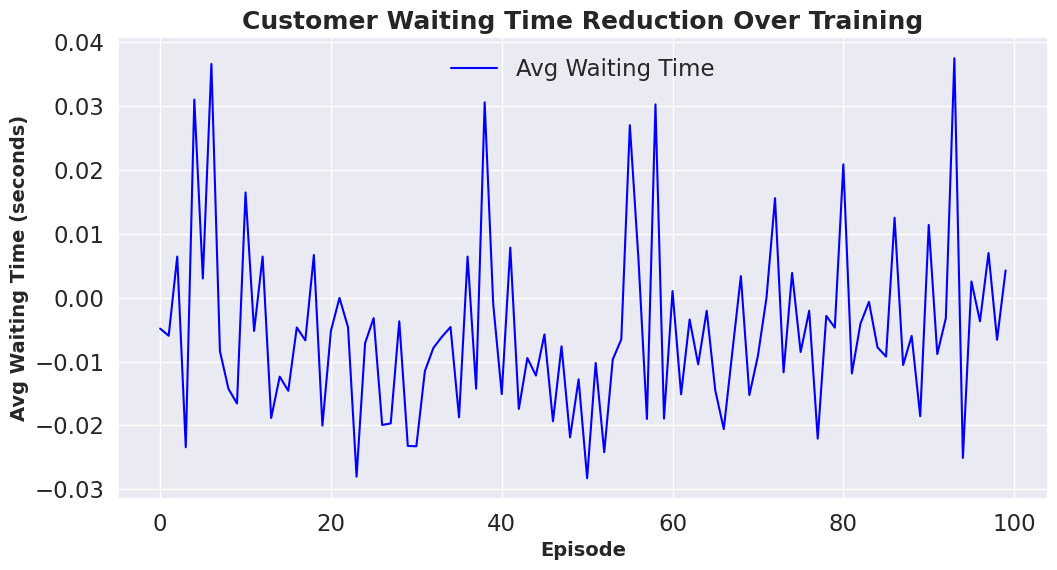


🚀 Evaluating trained agent...

🚀 Evaluating trained agent...
✅ Eval Ep 0: Score 36319.1 | Satisfaction 0.59 | Resolution 0.73
✅ Eval Ep 1: Score 27081.4 | Satisfaction 0.58 | Resolution 0.72
✅ Eval Ep 2: Score 39291.0 | Satisfaction 0.59 | Resolution 0.73
✅ Eval Ep 3: Score 35007.8 | Satisfaction 0.58 | Resolution 0.73
✅ Eval Ep 4: Score 36509.4 | Satisfaction 0.59 | Resolution 0.73
✅ Eval Ep 5: Score 40002.1 | Satisfaction 0.59 | Resolution 0.73
✅ Eval Ep 6: Score 30280.0 | Satisfaction 0.58 | Resolution 0.72
✅ Eval Ep 7: Score 25781.4 | Satisfaction 0.58 | Resolution 0.72
✅ Eval Ep 8: Score 36736.0 | Satisfaction 0.59 | Resolution 0.73
✅ Eval Ep 9: Score 42765.5 | Satisfaction 0.59 | Resolution 0.73

=== Evaluation Summary (Real Wait Times) ===
✅ Overall Avg Score: 34977.36
✅ Overall Avg Wait Time: 54.49 sec
✅ Min Wait Time: 0.00 sec
✅ 90th Percentile Wait Time: 111.00 sec
✅ Overall Satisfaction: 0.58
✅ Resolution Rate: 0.73


In [35]:
# ===========================================================
# 🔥 PPO TRAINING + EVALUATION FOR CALL CENTER OPTIMIZATION
# Focus: Minimizing Customer Waiting Time
# ===========================================================

import numpy as np
import torch as T
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

def train_ppo_agent(env, agent, n_episodes=200, max_steps_per_episode=1000,
                    print_interval=10, save_interval=20, plot_interval=20):
    """
    Train PPO agent to minimize customer waiting time
    """
    log_columns = ['Episode', 'Total_Reward', 'Avg_Reward', 'Steps',
                   'Avg_Satisfaction', 'Resolution_Rate', 'Avg_Wait_Time']
    training_log = pd.DataFrame(columns=log_columns)

    ep_rewards, avg_rewards, episodes = [], [], []
    avg_waiting_times = []
    best_score = -np.inf
    score_history = []

    progress_bar = tqdm(range(n_episodes), desc="Training Progress")

    for episode in progress_bar:
        obs = env.reset()
        done = False
        score = 0
        step_count = 0
        waiting_times_episode = []
        satisfaction_episode = []
        resolution_episode = []

        while not done and step_count < max_steps_per_episode:
            action, prob, val = agent.choose_action(obs)
            next_obs, reward, done, info = env.step(action)

            agent.remember(obs, action, prob, val, reward, done)
            score += reward
            step_count += 1
            obs = next_obs

            if hasattr(env, 'df') and env.current_step < len(env.df):
                call = env.df.iloc[env.current_step-1]
                waiting_times_episode.append(call['Speed of answer in seconds'])
                satisfaction_episode.append(call['Satisfaction rating'])
                resolution_episode.append(call['Resolved_Binary'])

            if step_count % agent.batch_size == 0:
                agent.learn()

        if len(agent.memory.states) > 0:
            agent.learn()

        score_history.append(score)
        avg_score = np.mean(score_history[-50:])

        avg_wait_time = np.mean(waiting_times_episode) if waiting_times_episode else 0
        avg_satisfaction = np.mean(satisfaction_episode) if satisfaction_episode else 0
        avg_resolution = np.mean(resolution_episode) if resolution_episode else 0

        ep_rewards.append(score)
        avg_rewards.append(avg_score)
        avg_waiting_times.append(avg_wait_time)
        episodes.append(episode)

        progress_bar.set_postfix({
            'Score': f"{score:.1f}",
            'AvgScore': f"{avg_score:.1f}",
            'AvgWait': f"{avg_wait_time:.1f}s",
            'Satisfaction': f"{avg_satisfaction:.2f}",
            'Resolution': f"{avg_resolution:.2f}"
        })

        log_entry = {
            'Episode': episode,
            'Total_Reward': score,
            'Avg_Reward': avg_score,
            'Steps': step_count,
            'Avg_Satisfaction': avg_satisfaction,
            'Resolution_Rate': avg_resolution,
            'Avg_Wait_Time': avg_wait_time
        }
        training_log = pd.concat([training_log, pd.DataFrame([log_entry])], ignore_index=True)

        if avg_score > best_score:
            best_score = avg_score
            agent.actor.save_checkpoint()
            agent.critic.save_checkpoint()
            print(f"\n✅ Best model saved at Episode {episode} | Avg Score: {avg_score:.2f}")

        if episode % save_interval == 0 and episode > 0:
            agent.actor.save_checkpoint()
            agent.critic.save_checkpoint()
            training_log.to_csv(f'training_log_ep{episode}.csv', index=False)

        if episode % print_interval == 0 and episode > 0:
            print(f"\nEpisode {episode}: Avg Score: {avg_score:.2f}, Avg Wait: {avg_wait_time:.2f}s")

    agent.actor.save_checkpoint()
    agent.critic.save_checkpoint()
    training_log.to_csv('training_log_final.csv', index=False)

    plot_waiting_time(episodes, avg_waiting_times)

    return training_log, agent, episodes, ep_rewards, avg_rewards, agent.actor_losses, agent.critic_losses


def plot_waiting_time(episodes, avg_waiting_times):
    """Plot waiting time over episodes"""
    plt.figure(figsize=(12,6))
    plt.plot(episodes, avg_waiting_times, color='blue', label='Avg Waiting Time')
    plt.xlabel('Episode')
    plt.ylabel('Avg Waiting Time (seconds)')
    plt.title('Customer Waiting Time Reduction Over Training')
    plt.grid(True)
    plt.legend()
    plt.savefig('waiting_time_trend.png')
    plt.show()
def evaluate_agent(env, agent, n_episodes=10):
    """Evaluate a trained agent and log REAL wait times."""
    score_history = []
    satisfaction_history = []
    resolution_history = []
    response_eff_history = []
    raw_wait_times = []

    print("\n🚀 Evaluating trained agent...")

    for episode in range(n_episodes):
        observation = env.reset()
        done = False
        score = 0
        step_count = 0

        episode_satisfaction = []
        episode_resolution = []
        episode_response_efficiency = []

        while not done:
            action, _, _ = agent.choose_action(observation)
            observation_, reward, done, info = env.step(action)
            score += reward
            step_count += 1

            episode_satisfaction.append(info.get('satisfaction', 0))
            episode_resolution.append(info.get('resolved', 0))
            episode_response_efficiency.append(info.get('response_efficiency', 0))

            if hasattr(env, 'df_original') and env.current_step < len(env.df_original):
                raw_call = env.df_original.iloc[env.current_step - 1]
                raw_wait = raw_call['Speed of answer in seconds']
                raw_wait_times.append(raw_wait)
            else:
                raw_wait_times.append(info.get('raw_wait_time', 0))

            observation = observation_

        avg_satisfaction = np.mean(episode_satisfaction) if episode_satisfaction else 0
        avg_resolution = np.mean(episode_resolution) if episode_resolution else 0
        avg_response_eff = np.mean(episode_response_efficiency) if episode_response_efficiency else 0

        score_history.append(score)
        satisfaction_history.append(avg_satisfaction)
        resolution_history.append(avg_resolution)
        response_eff_history.append(avg_response_eff)

        print(f"✅ Eval Ep {episode}: Score {score:.1f} | Satisfaction {avg_satisfaction:.2f} | Resolution {avg_resolution:.2f}")

    avg_score = np.mean(score_history)
    avg_satisfaction = np.mean(satisfaction_history)
    avg_resolution = np.mean(resolution_history)
    avg_response_eff = np.mean(response_eff_history)

    try:
        wait_time_scaled = np.array(raw_wait_times).reshape(-1, 1)
        n_features = env.scaler.mean_.shape[0]

        fake_input = np.zeros((len(wait_time_scaled), n_features))
        fake_input[:, 0] = wait_time_scaled.flatten()

        inverse_transformed = env.scaler.inverse_transform(fake_input)
        wait_time_original = inverse_transformed[:, 0]

        overall_avg_wait = np.mean(wait_time_original)
        min_wait = np.min(wait_time_original)
        percentile_90_wait = np.percentile(wait_time_original, 90)
    except AttributeError:
        print("⚠️ No scaler found in env → using raw values without inverse transform.")
        wait_time_original = np.array(raw_wait_times)
        overall_avg_wait = np.mean(wait_time_original)
        min_wait = np.min(wait_time_original)
        percentile_90_wait = np.percentile(wait_time_original, 90)

    print("\n=== Evaluation Summary (Real Wait Times) ===")
    print(f"✅ Overall Avg Score: {avg_score:.2f}")
    print(f"✅ Overall Avg Wait Time: {overall_avg_wait:.2f} sec")
    print(f"✅ Min Wait Time: {min_wait:.2f} sec")
    print(f"✅ 90th Percentile Wait Time: {percentile_90_wait:.2f} sec")
    print(f"✅ Overall Satisfaction: {avg_satisfaction:.2f}")
    print(f"✅ Resolution Rate: {avg_resolution:.2f}")

    return {
        'avg_score': avg_score,
        'avg_satisfaction': avg_satisfaction,
        'avg_resolution': avg_resolution,
        'avg_response_efficiency': avg_response_eff,
        'overall_avg_wait': overall_avg_wait,
        'min_wait': min_wait,
        'percentile_90_wait': percentile_90_wait
    }


# === Main execution ===
env = CallCenterEnv(processed_df)
env.df_original = df
env.scaler = scaler

print(f"[Scaler] mean: {scaler.mean_}, var: {scaler.var_}")

input_dims = [env.observation_space.shape[0]]
n_actions = env.action_space.n

agent = Agent(
    n_actions=n_actions,
    input_dims=input_dims,
    gamma=0.99,
    alpha=0.0003,
    gae_lambda=0.95,
    policy_clip=0.2,
    batch_size=32,
    n_epochs=3
)

print("🚀 Starting PPO training to minimize customer waiting time...")
training_log, trained_agent, episodes, ep_rewards, avg_rewards, actor_losses, critic_losses = train_ppo_agent(
    env=env,
    agent=agent,
    n_episodes=100,
    max_steps_per_episode=1000,
    print_interval=20,
    save_interval=50,
    plot_interval=50
)
avg_waiting_times = training_log['Avg_Wait_Time'].tolist()
avg_satisfactions = training_log['Avg_Satisfaction'].tolist()
avg_resolutions = training_log['Resolution_Rate'].tolist()


print("\n🚀 Evaluating trained agent...")

eval_metrics = evaluate_agent(env, trained_agent, n_episodes=10)

Visualisation

In [36]:
def plot_training_metrics(episodes, avg_waiting_times, avg_satisfactions, avg_resolutions):
    plt.figure(figsize=(14,8))

    plt.subplot(3,1,1)
    plt.plot(episodes, avg_waiting_times, label='Avg Waiting Time (sec)', color='blue')
    plt.ylabel('Avg Wait Time')
    plt.grid(True)
    plt.legend()

    plt.subplot(3,1,2)
    plt.plot(episodes, avg_satisfactions, label='Avg Satisfaction (0-5)', color='green')
    plt.ylabel('Avg Satisfaction')
    plt.grid(True)
    plt.legend()

    plt.subplot(3,1,3)
    plt.plot(episodes, avg_resolutions, label='Resolution Rate', color='orange')
    plt.xlabel('Episode')
    plt.ylabel('Resolution Rate')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.savefig('model_training_metrics.png')
    plt.show()


In [37]:
def plot_training_metrics(episodes, avg_waiting_times, avg_satisfactions, avg_resolutions):
    fig, axs = plt.subplots(3, 1, figsize=(12, 18))

    axs[0].plot(episodes, avg_waiting_times, label='Avg Wait Time (s)')
    axs[0].set_title('Average Waiting Time over Episodes')
    axs[0].set_xlabel('Episode')
    axs[0].set_ylabel('Seconds')
    axs[0].grid(True)
    axs[0].legend()
    axs[1].legend()
    axs[2].legend()


    axs[1].plot(episodes, avg_satisfactions, label='Avg Satisfaction')
    axs[1].set_title('Average Satisfaction over Episodes')
    axs[1].set_xlabel('Episode')
    axs[1].set_ylabel('Satisfaction (0-5)')
    axs[1].grid(True)

    axs[2].plot(episodes, avg_resolutions, label='Avg Resolution Rate')
    axs[2].set_title('Average Resolution Rate over Episodes')
    axs[2].set_xlabel('Episode')
    axs[2].set_ylabel('Resolution Rate')
    axs[2].grid(True)

    plt.tight_layout()
    plt.show()


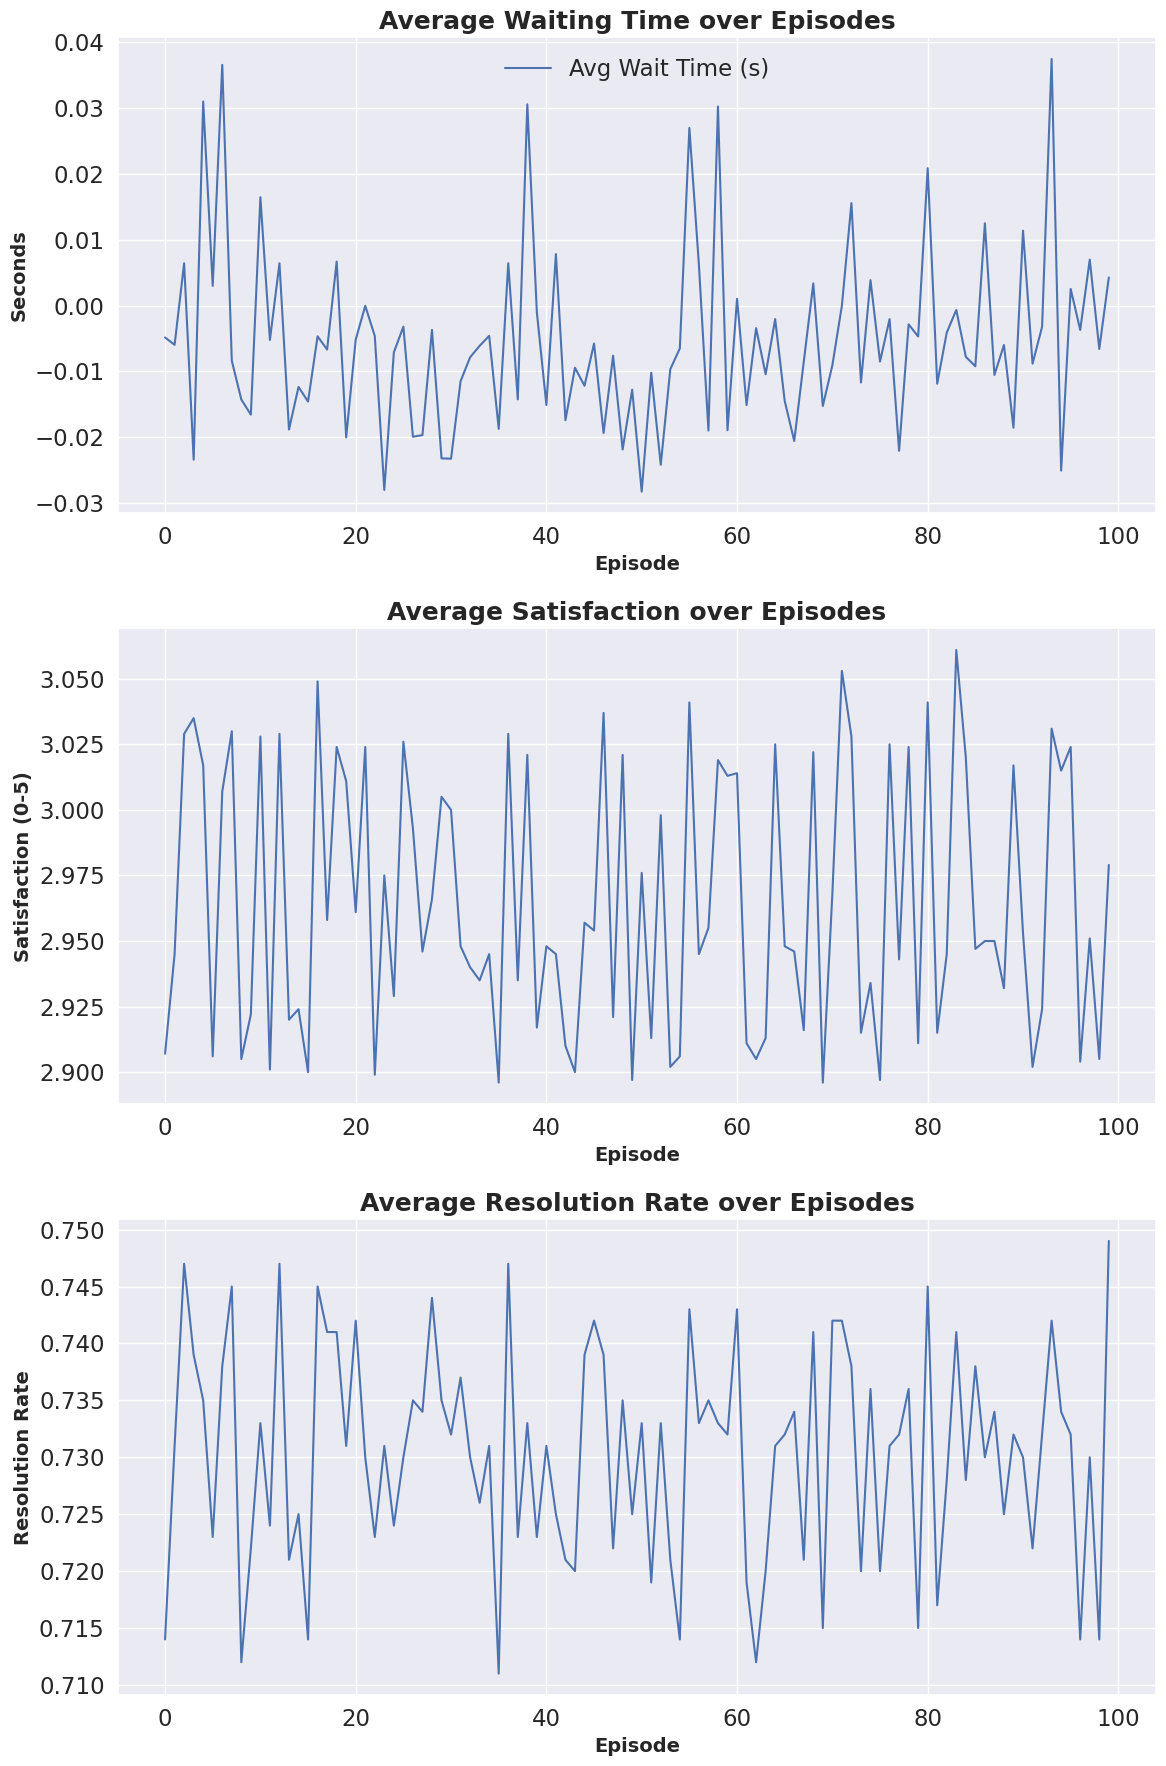

In [38]:
plot_training_metrics(episodes, avg_waiting_times, avg_satisfactions, avg_resolutions)


In [39]:
def plot_ppo_performance(episodes, ep_rewards, avg_rewards):
    plt.figure(figsize=(12,6))
    plt.plot(episodes, ep_rewards, color='lightblue', label='Episode Reward')
    plt.plot(episodes, avg_rewards, color='red', label='Avg Reward (window=50)')
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.title('PPO Training Rewards Over Episodes')
    plt.legend()
    plt.grid(True)
    plt.show()


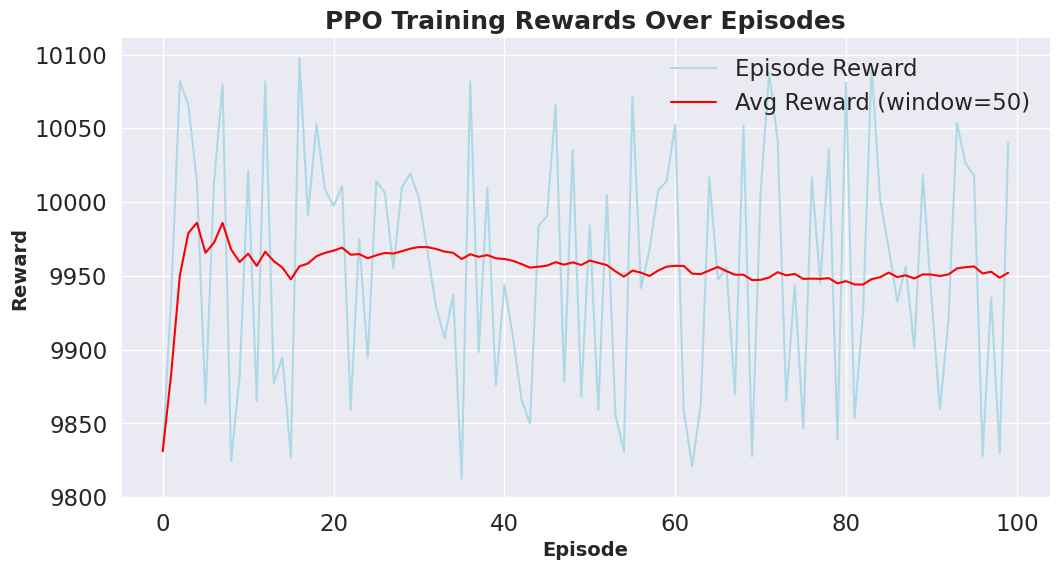

In [40]:
plot_ppo_performance(episodes, ep_rewards, avg_rewards)


In [41]:
import numpy as np
import matplotlib.pyplot as plt

def moving_average(data, window_size=10):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

def plot_rewards(episodes, ep_rewards, avg_rewards):
    plt.figure(figsize=(14,6))
    plt.plot(episodes, ep_rewards, alpha=0.4, label='Raw Episode Reward', color='#1f77b4')
    plt.plot(episodes[-len(avg_rewards):], avg_rewards, color='#ff7f0e', linewidth=2, label='Smoothed Reward (Moving Avg)')
    plt.xlabel('Episode', fontsize=12)
    plt.ylabel('Reward', fontsize=12)
    plt.title('🏆 PPO Rewards Over Episodes', fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

def plot_training_metrics(episodes, avg_waiting_times, avg_satisfactions, avg_resolutions):
    fig, axs = plt.subplots(3, 1, figsize=(14, 18))

    axs[0].plot(episodes, moving_average(avg_waiting_times), color='#1f77b4', linewidth=2)
    axs[0].set_title('⏱️ Avg Waiting Time (smoothed)', fontsize=14, fontweight='bold')
    axs[0].set_xlabel('Episode', fontsize=12)
    axs[0].set_ylabel('Seconds', fontsize=12)
    axs[0].grid(alpha=0.3)

    axs[1].plot(episodes, moving_average(avg_satisfactions), color='#2ca02c', linewidth=2)
    axs[1].set_title('😊 Avg Customer Satisfaction (smoothed)', fontsize=14, fontweight='bold')
    axs[1].set_xlabel('Episode', fontsize=12)
    axs[1].set_ylabel('Satisfaction (0-5)', fontsize=12)
    axs[1].grid(alpha=0.3)

    axs[2].plot(episodes, moving_average(avg_resolutions), color='#d62728', linewidth=2)
    axs[2].set_title('✅ Avg Resolution Rate (smoothed)', fontsize=14, fontweight='bold')
    axs[2].set_xlabel('Episode', fontsize=12)
    axs[2].set_ylabel('Resolution Rate', fontsize=12)
    axs[2].grid(alpha=0.3)

    plt.tight_layout()
    plt.show()





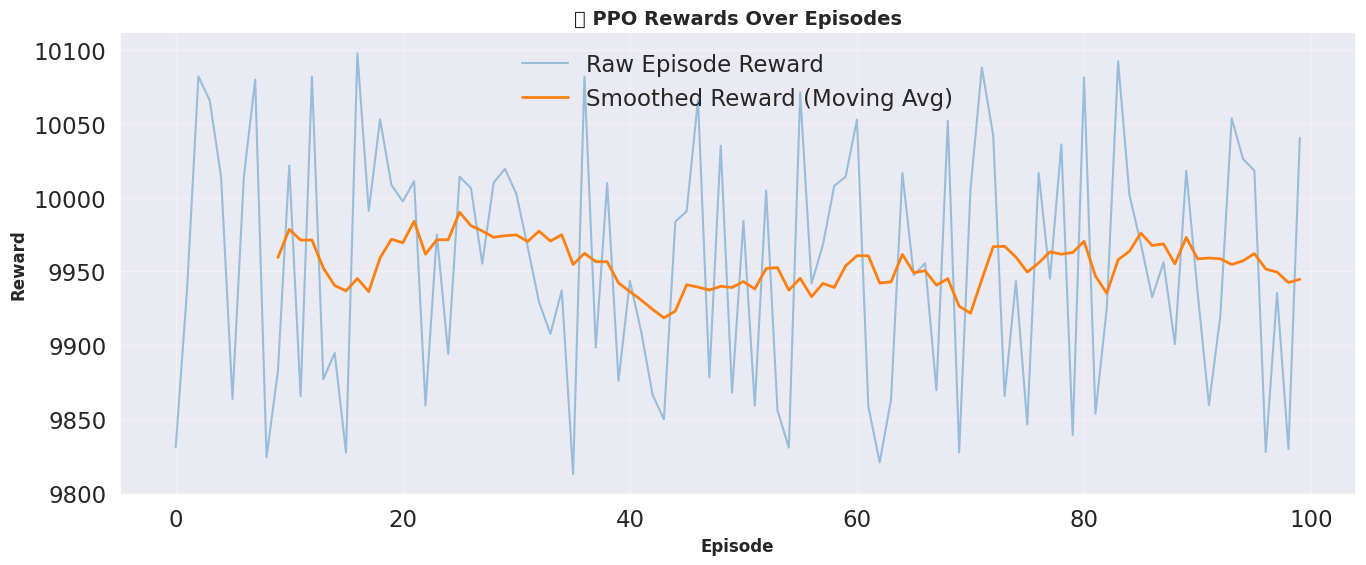

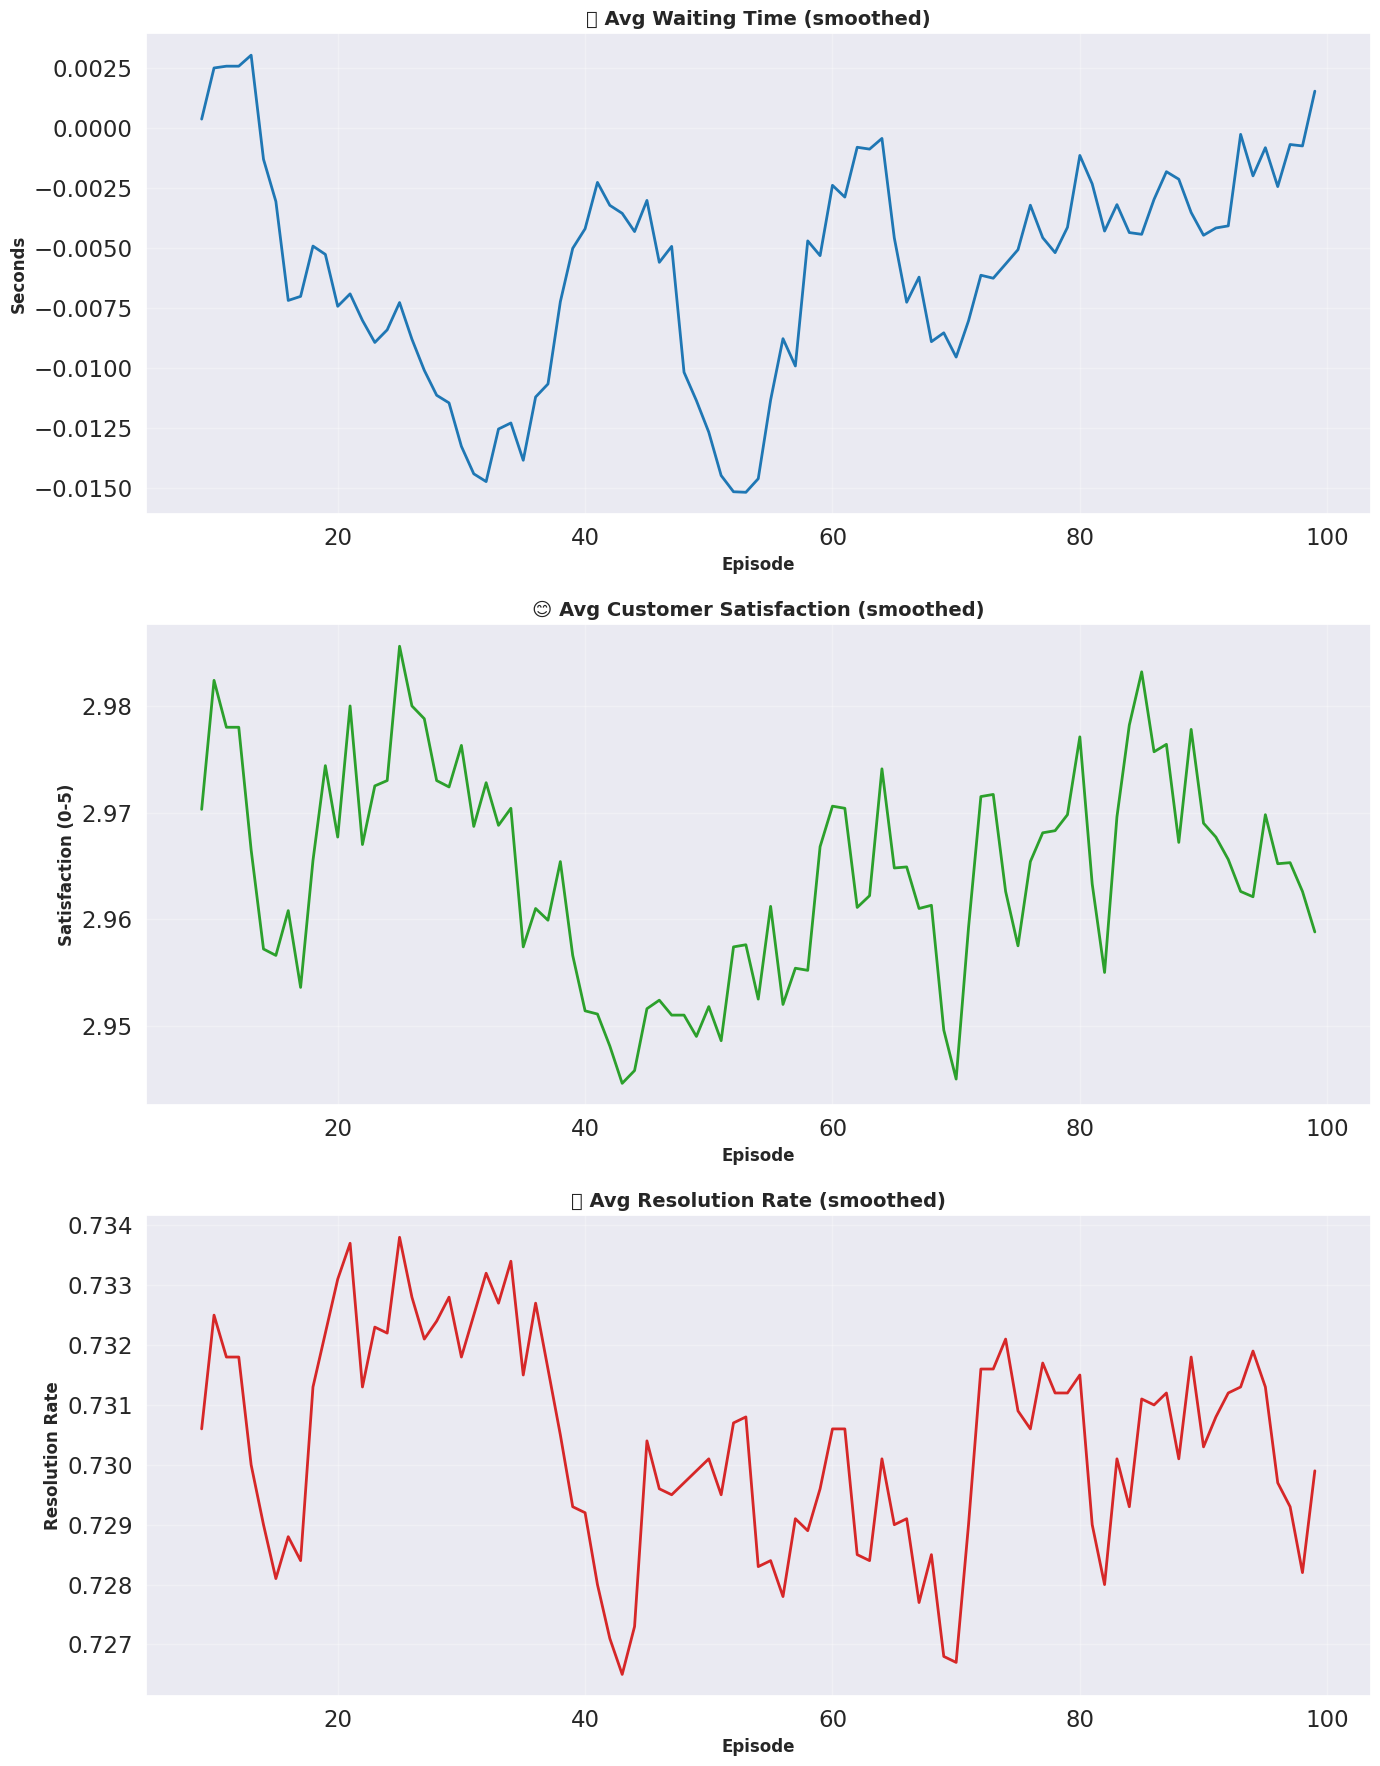

In [42]:
plot_rewards(episodes, ep_rewards, moving_average(ep_rewards))
plot_training_metrics(episodes[-len(moving_average(avg_waiting_times)):], avg_waiting_times, avg_satisfactions, avg_resolutions)



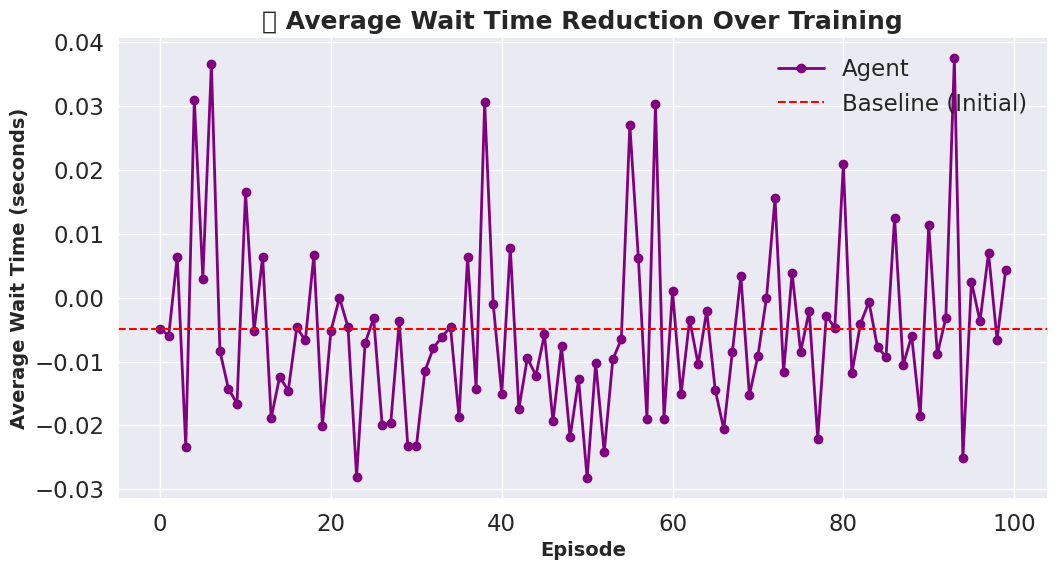

In [43]:
def plot_wait_time_line_with_baseline(avg_waiting_times, baseline_wait):
    plt.figure(figsize=(12,6))
    plt.plot(avg_waiting_times, marker='o', color='purple', linewidth=2, label='Agent')
    plt.axhline(y=baseline_wait, color='red', linestyle='--', label='Baseline (Initial)')
    plt.xlabel('Episode')
    plt.ylabel('Average Wait Time (seconds)')
    plt.title('📉 Average Wait Time Reduction Over Training')
    plt.legend()
    plt.grid(True)
    plt.show()

baseline_wait = avg_waiting_times[0]
plot_wait_time_line_with_baseline(avg_waiting_times, baseline_wait)
